In [1]:
%run imports_N_loadData.ipynb

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load&process Synthetic data===========================
len(ground_truth_synthetic): 45
---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_df_synthetic) 3519
len(rate_df_synthetic) 95
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_measure_denoised) 29813
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


In [2]:
pressure_measure=pressure_measure_denoised
pressure_time=pressure_time_denoised
ground_truth=ground_truth_denoised
pressure_df=pressure_df_denoised
rate_df=rate_df_denoised
colum_names=colum_names_denoised
data_inOneRow=data_inOneRow_denoised

In [17]:
from base_classes import CurveParametersCalc
cPC=CurveParametersCalc()
time_halfWindow=0.1
min_pointsNumber=5
ground_truth_buildup,ground_truth_drawdown=cPC.detect_breakpoint_type(pressure_measure,
                                                                      pressure_time,
                                                                      ground_truth,
                                                                     time_halfWindow,
                                                                     min_pointsNumber)

detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting


<Figure size 1440x720 with 0 Axes>

In [3]:
detect_useDerivative=DerivativeMethod(pressure_df,colum_names)

In [18]:
points=ground_truth_buildup
point_halfWindow=8
fod=detect_useDerivative.first_order_derivative
avg_derivative_buildup=detect_useDerivative.avg_derivative_inPointWindow(fod,points,point_halfWindow)
avg_derivative_buildup

point_index  avg_derivative_left  avg_derivative_right
0        2884.0            -2.126369             22.288772
1        3560.0             8.129494             32.196471
2        4246.0             7.143956             73.553112
3        4899.0            24.013063             68.109373
4        5436.0            10.536975             29.194739
5        6543.0             5.651108             44.696855
6        7545.0            22.515825             22.265637
7        8361.0             9.112403             30.214464
8        9619.0            73.744975            323.352457
9       11490.0            34.776448             65.837768
10      13040.0            65.062941            149.886924
11      14089.0            24.565820            119.235974
12      15348.0            28.082261            253.078536
13      16619.0            36.446984            387.051342
14      18434.0            11.338162            143.983020
15      19777.0            12.027223             71.892913
16      20358.0           175.157412            569.822325
17      22183.0            13.160514             40.806202
18      23219.0             9.326829             27.941646
19      24683.0          -108.459011            194.584660
20      26011.0           201.758482            520.481797
21      27315.0             0.849026             25.479737
22      27969.0            27.062586             87.310282
23      28494.0            11.174353             69.974397
24      29115.0            82.496284            254.440041

In [5]:
points=[index for index in range(len(pressure_measure))]
point_halfWindow=8
fod=detect_useDerivative.first_order_derivative
avg_derivative=detect_useDerivative.avg_derivative_inPointWindow(fod,points,point_halfWindow)
avg_derivative

point_index  avg_derivative_left  avg_derivative_right
0              8.0            89.804449             15.173318
1              9.0            74.788141              9.642441
2             10.0            64.105549              8.882211
3             11.0            49.005105              8.549504
4             12.0            40.777946              8.134152
...            ...                  ...                   ...
29792      29800.0            10.049314              0.667185
29793      29801.0             9.694444              0.644163
29794      29802.0             9.593042              0.452561
29795      29803.0             8.832114              0.406539
29796      29804.0             5.752975              0.414485

[29797 rows x 3 columns]

In [6]:
avg_derivative["abs(avg_derivative_left)"]=abs(avg_derivative["avg_derivative_left"])
avg_derivative["abs(avg_derivative_right)"]=abs(avg_derivative["avg_derivative_right"])
avg_derivative

point_index  avg_derivative_left  avg_derivative_right  \
0              8.0            89.804449             15.173318   
1              9.0            74.788141              9.642441   
2             10.0            64.105549              8.882211   
3             11.0            49.005105              8.549504   
4             12.0            40.777946              8.134152   
...            ...                  ...                   ...   
29792      29800.0            10.049314              0.667185   
29793      29801.0             9.694444              0.644163   
29794      29802.0             9.593042              0.452561   
29795      29803.0             8.832114              0.406539   
29796      29804.0             5.752975              0.414485   

       abs(avg_derivative_left)  abs(avg_derivative_right)  
0                     89.804449                  15.173318  
1                     74.788141                   9.642441  
2                     64.105549                   8.882211  
3                     49.005105                   8.549504  
4                     40.777946                   8.134152  
...                         ...                        ...  
29792                 10.049314                   0.667185  
29793                  9.694444                   0.644163  
29794                  9.593042                   0.452561  
29795                  8.832114                   0.406539  
29796                  5.752975                   0.414485  

[29797 rows x 5 columns]

In [7]:
avg_derivative.describe()

point_index  avg_derivative_left  avg_derivative_right  \
count  29797.000000         29797.000000          29797.000000   
mean   14906.000000            30.984219             30.972017   
std     8601.797322           189.951973            189.951891   
min        8.000000         -1025.552589          -1025.552589   
25%     7457.000000           -28.567199            -28.567199   
50%    14906.000000            11.287056             11.271817   
75%    22355.000000           112.941691            112.941691   
max    29804.000000          1389.212333           1389.212333   

       abs(avg_derivative_left)  abs(avg_derivative_right)  
count              29797.000000               29797.000000  
mean                 118.392464                 118.380262  
std                  151.738459                 151.745386  
min                    0.000533                   0.000533  
25%                   17.693431                  17.650877  
50%                   53.404671                  53.401150  
75%                  170.764592                 170.764592  
max                 1389.212333                1389.212333

In [19]:
close_zero_threshold=100
tuning_parameters=0.8
buildup_DRI, drawdown_DRI=detect_useDerivative.detect_breakpoints(avg_derivative,close_zero_threshold,tuning_parameters)
len(buildup_DRI),len(drawdown_DRI)

(532, 163)

In [13]:
deltaDerivative_tuning=0.7
buildup_DRI, drawdown_DRI=detect_useDerivative.detect_breakpoints_2(avg_derivative,deltaDerivative_tuning)
len(buildup_DRI),len(drawdown_DRI)

(621, 360)

In [20]:
points=[buildup_DRI,drawdown_DRI]
time_step=1
%run detect_useMaxFirstDerivative.ipynb

methods\derivative_method.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 532,len(buildUp_max_FOD): 193'
'len(drawDown_df): 163,len(drawDown_max_FOD): 88'
===============output==================
Max_FOD


'buildup:193, drawdown:88'
---initializing...
---plotting...


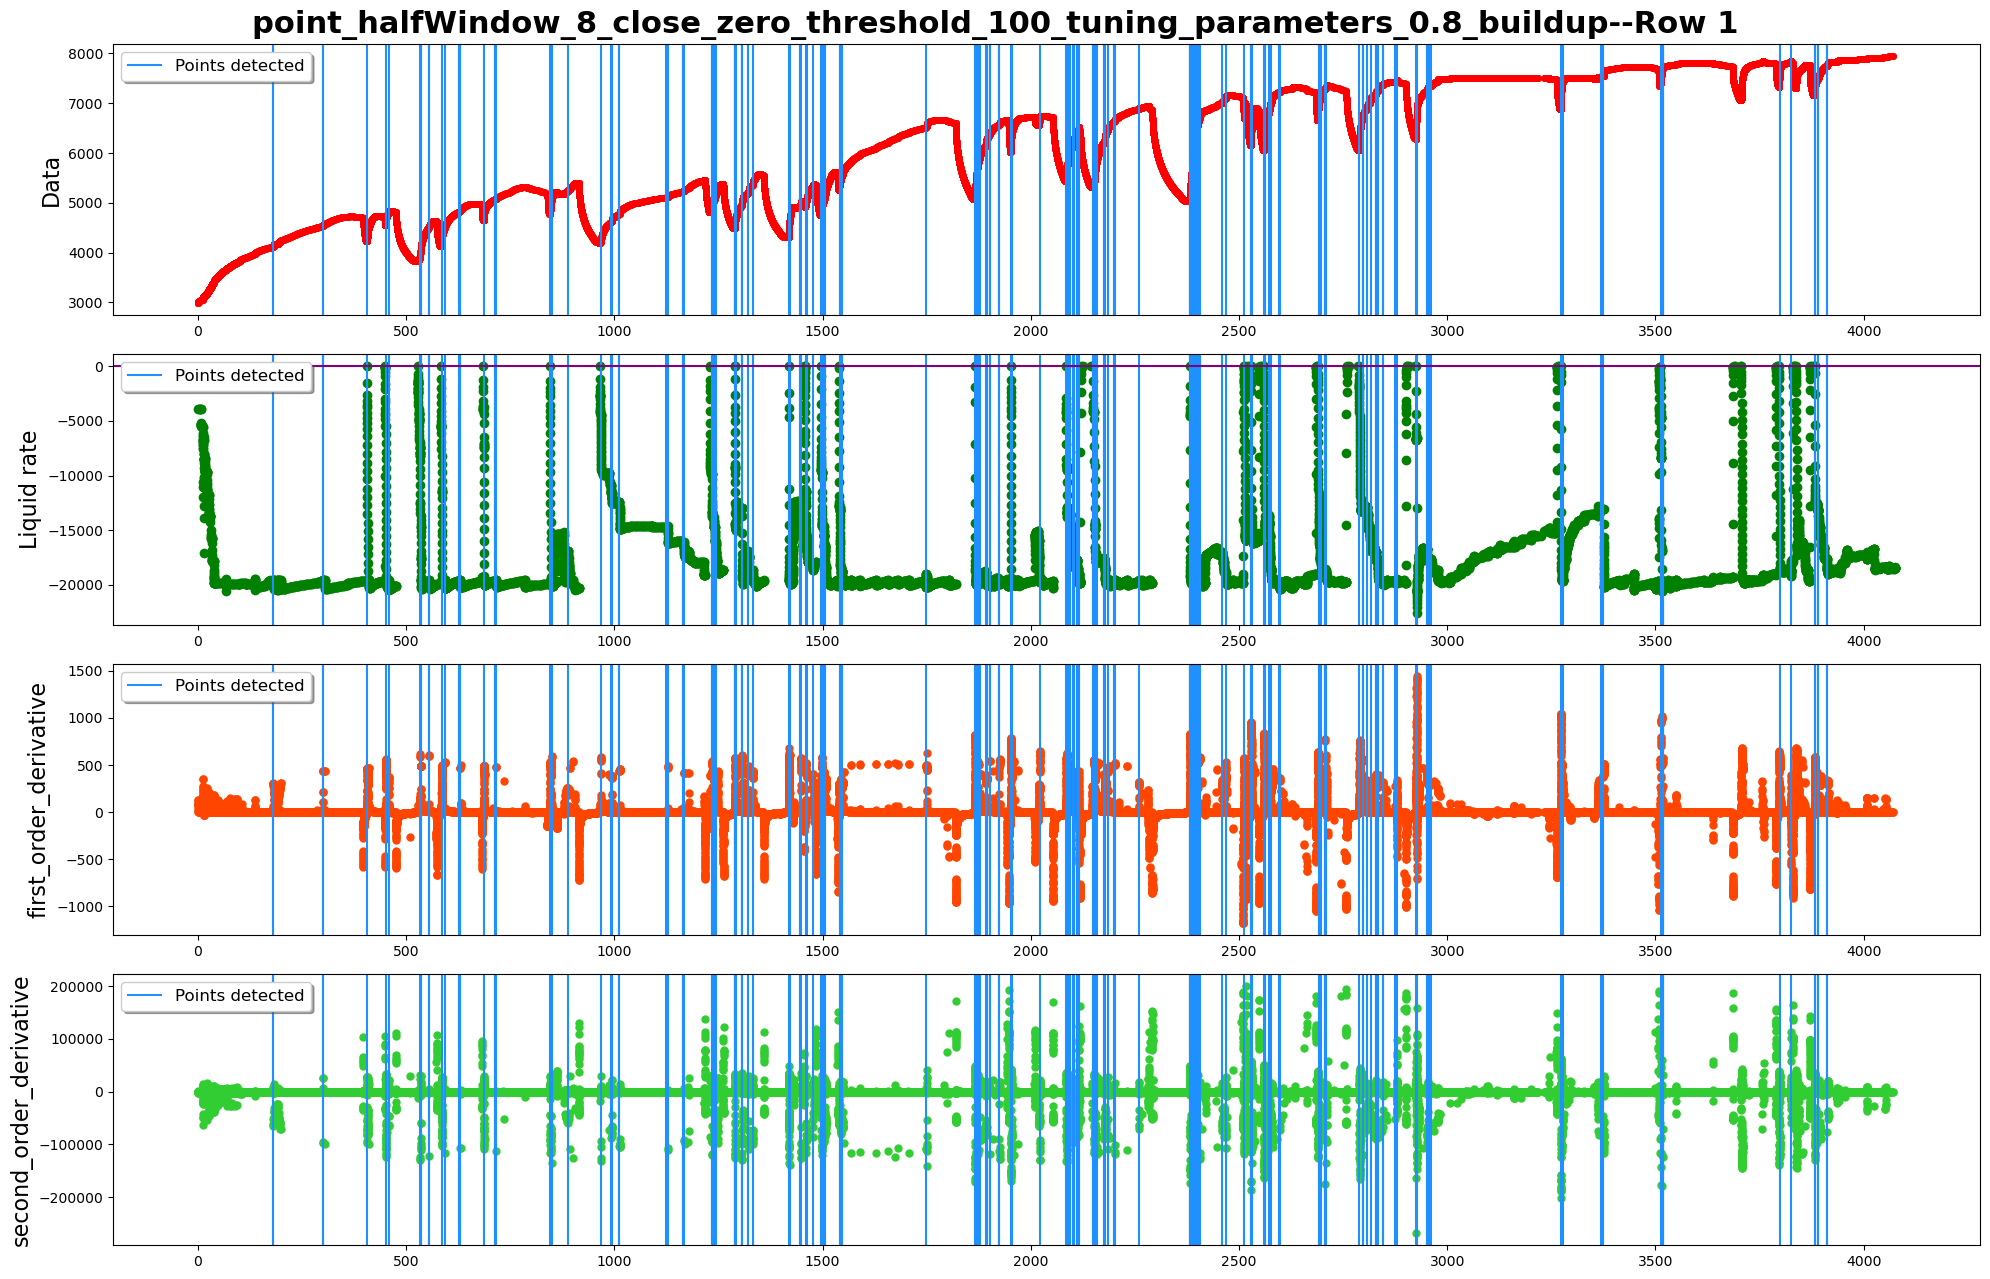

save whole....
detected 193 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


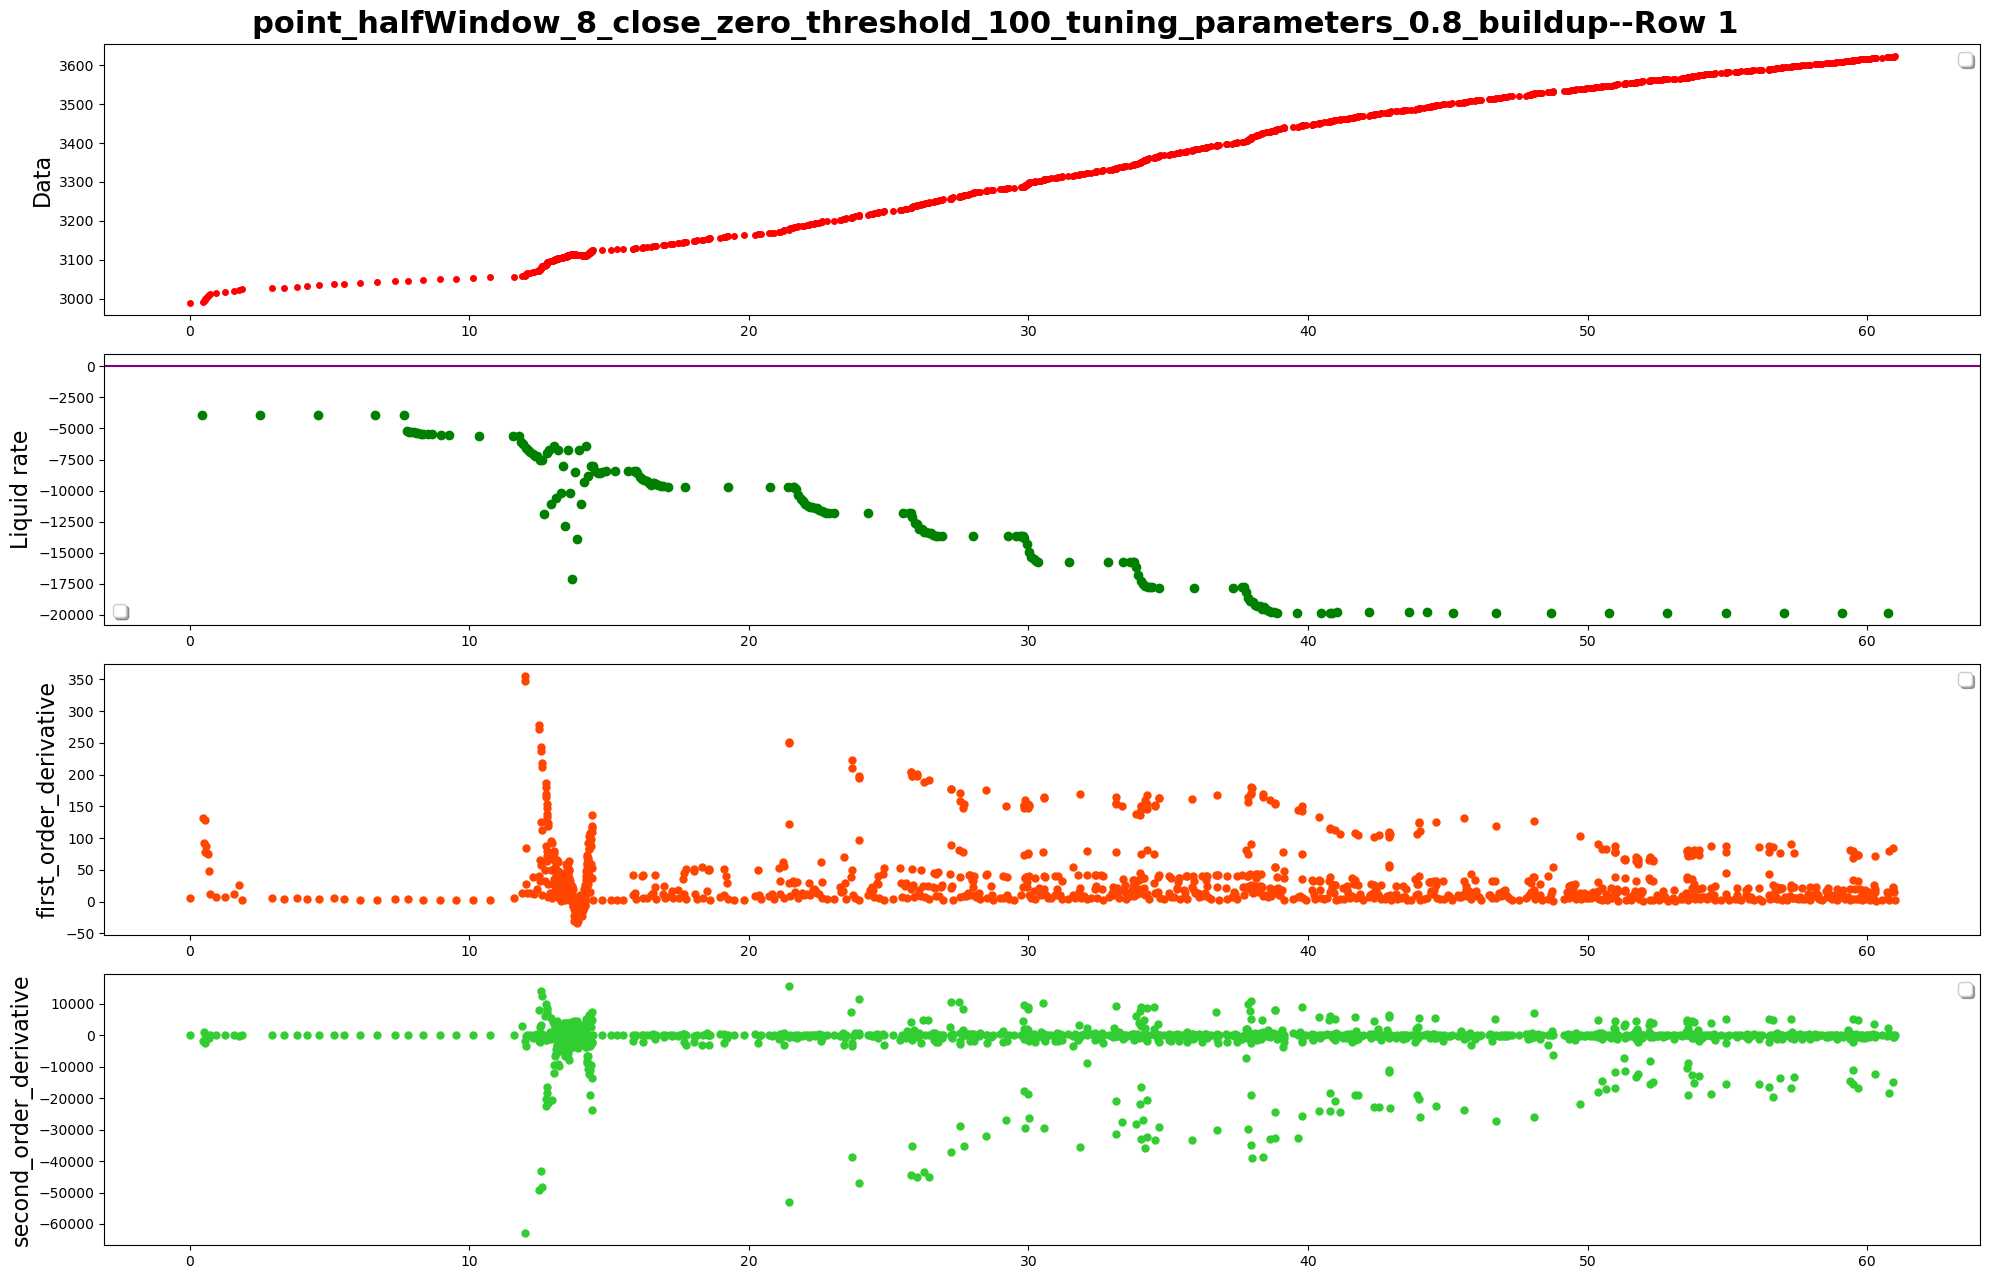

------row 2-----detected points:[1810, 1811, 2110, 2113]


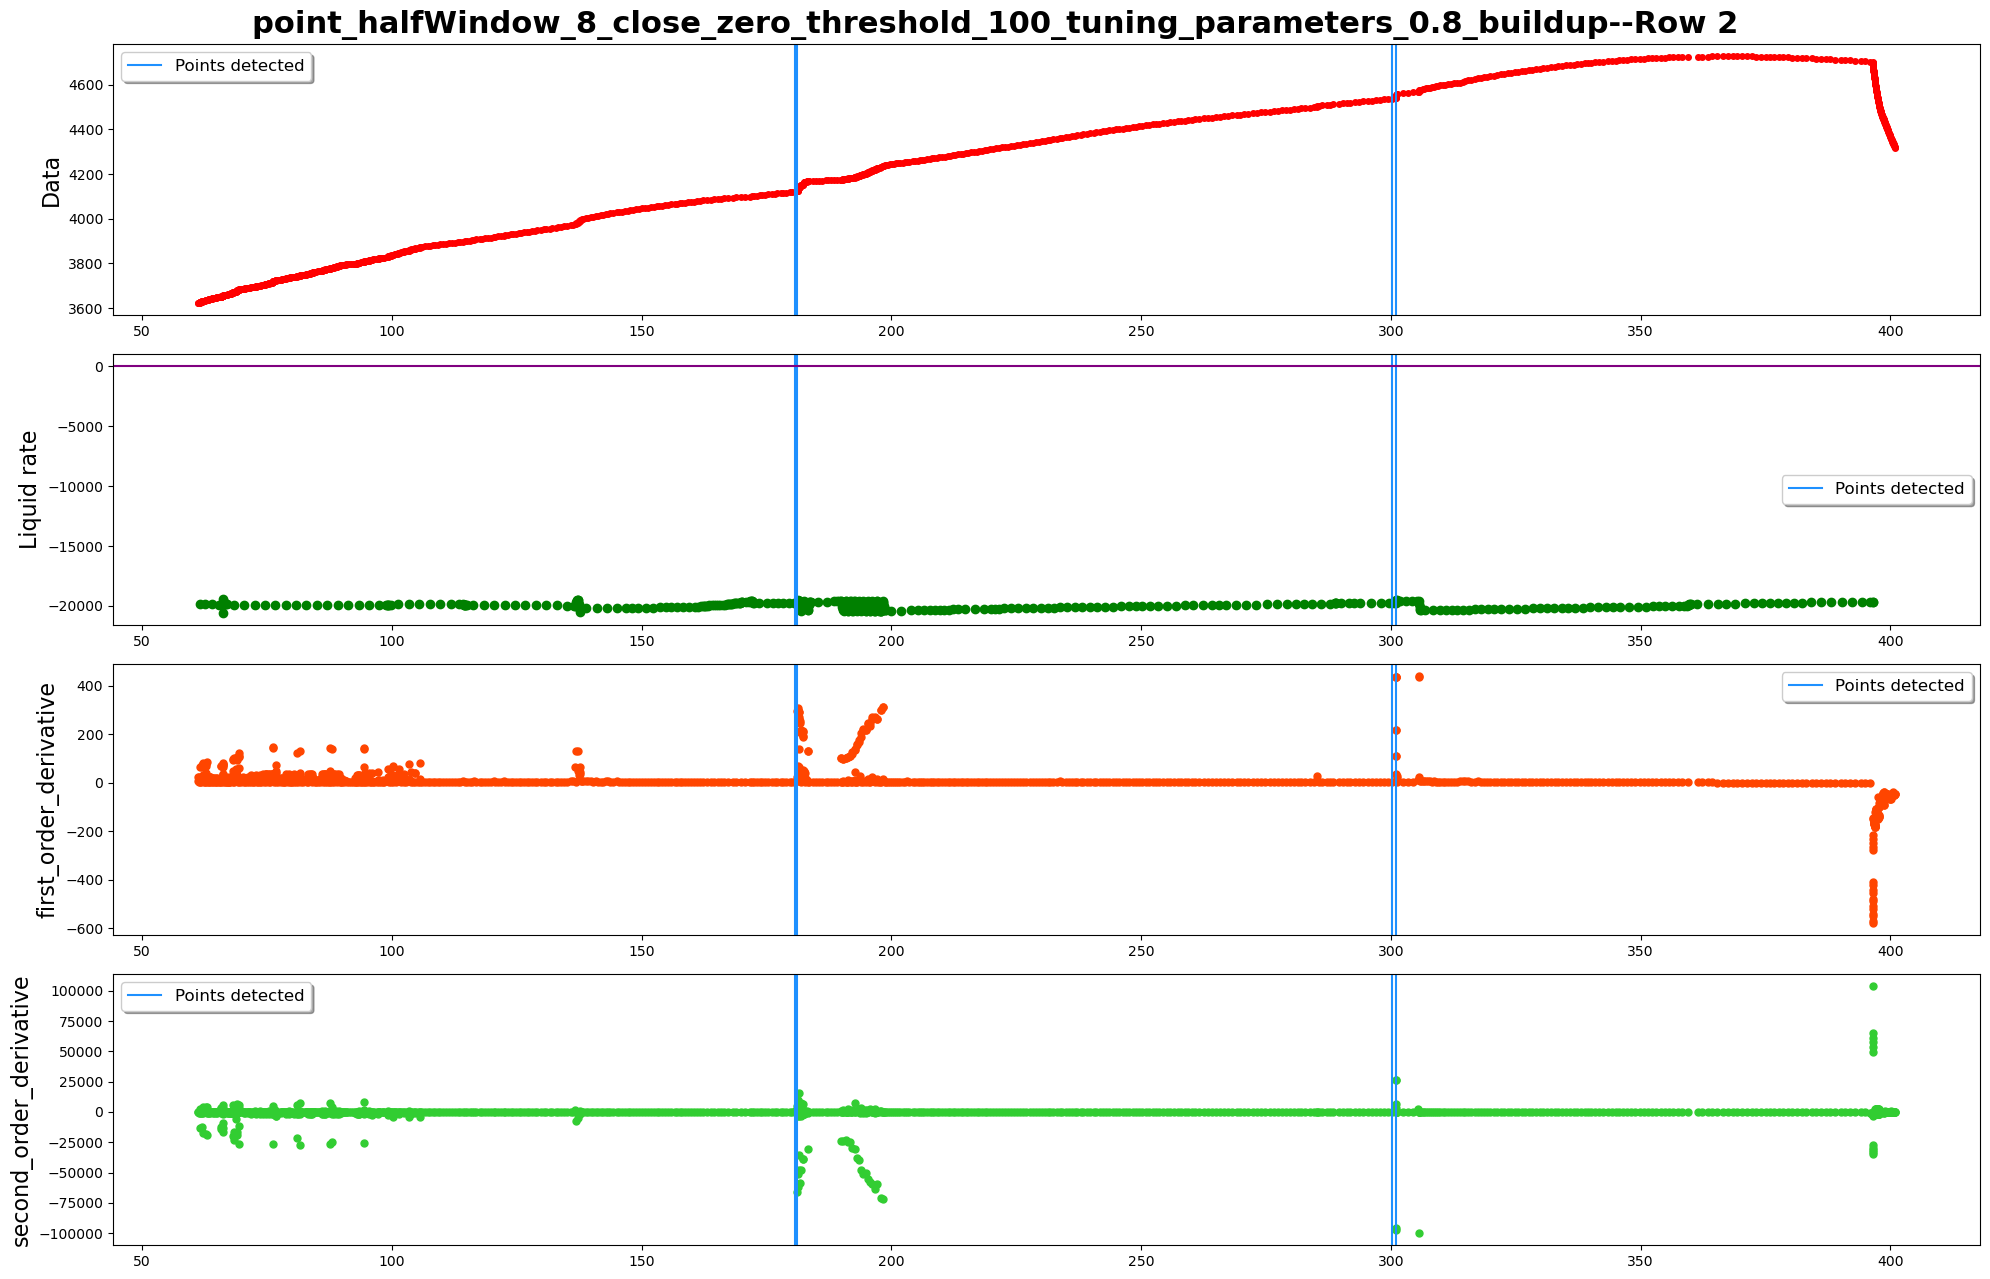

------row 3-----detected points:[2494, 2895, 3026]


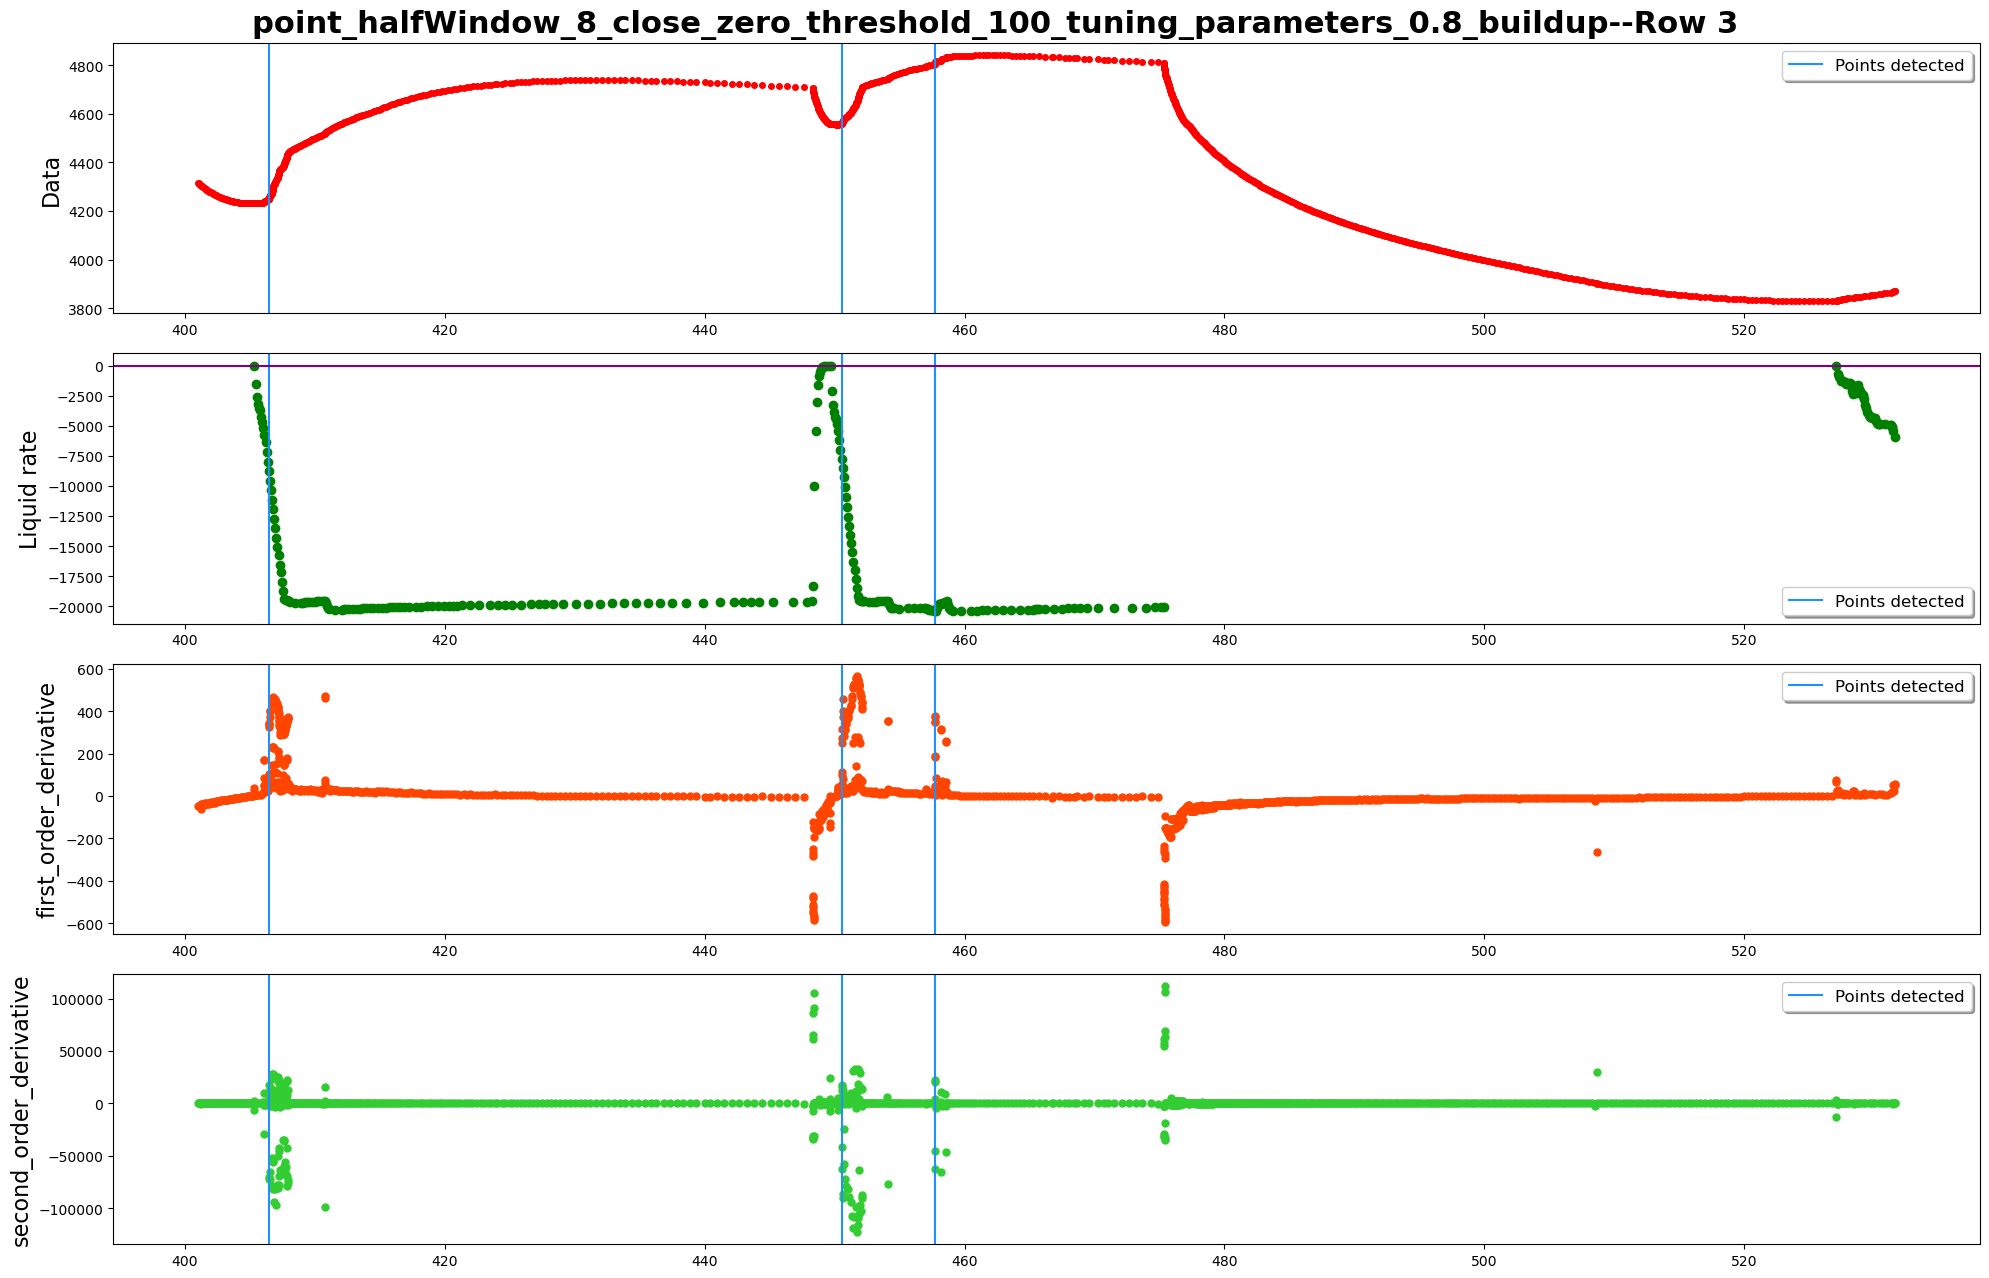

------row 4-----detected points:[3623, 3693, 3723, 3900, 3904, 4262, 4494, 4638, 4640, 4642, 4643]


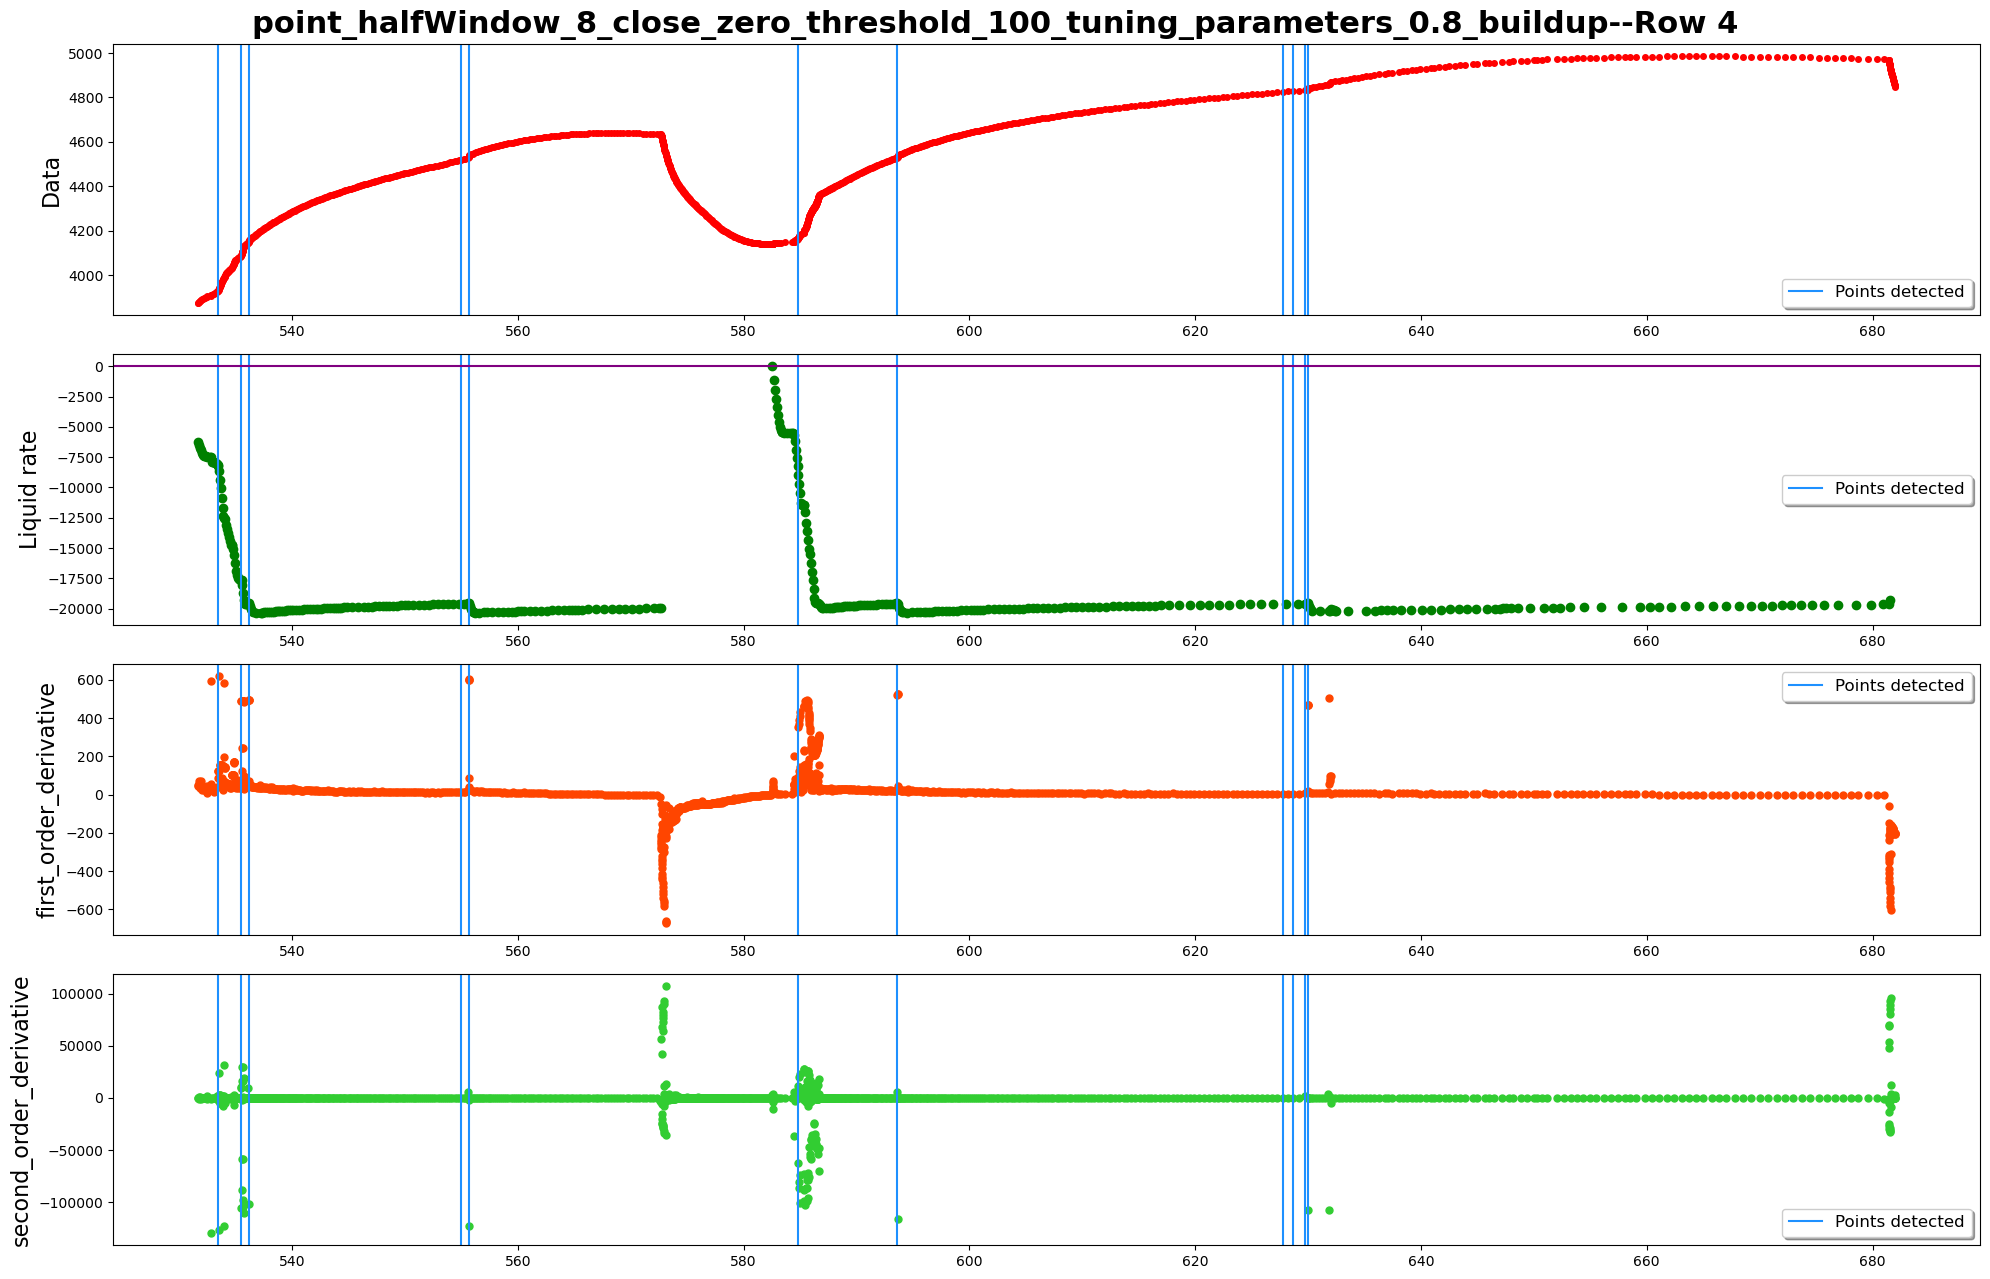

------row 5-----detected points:[4984, 5130, 5131, 5133, 5135, 5448, 5607, 5612, 5853]


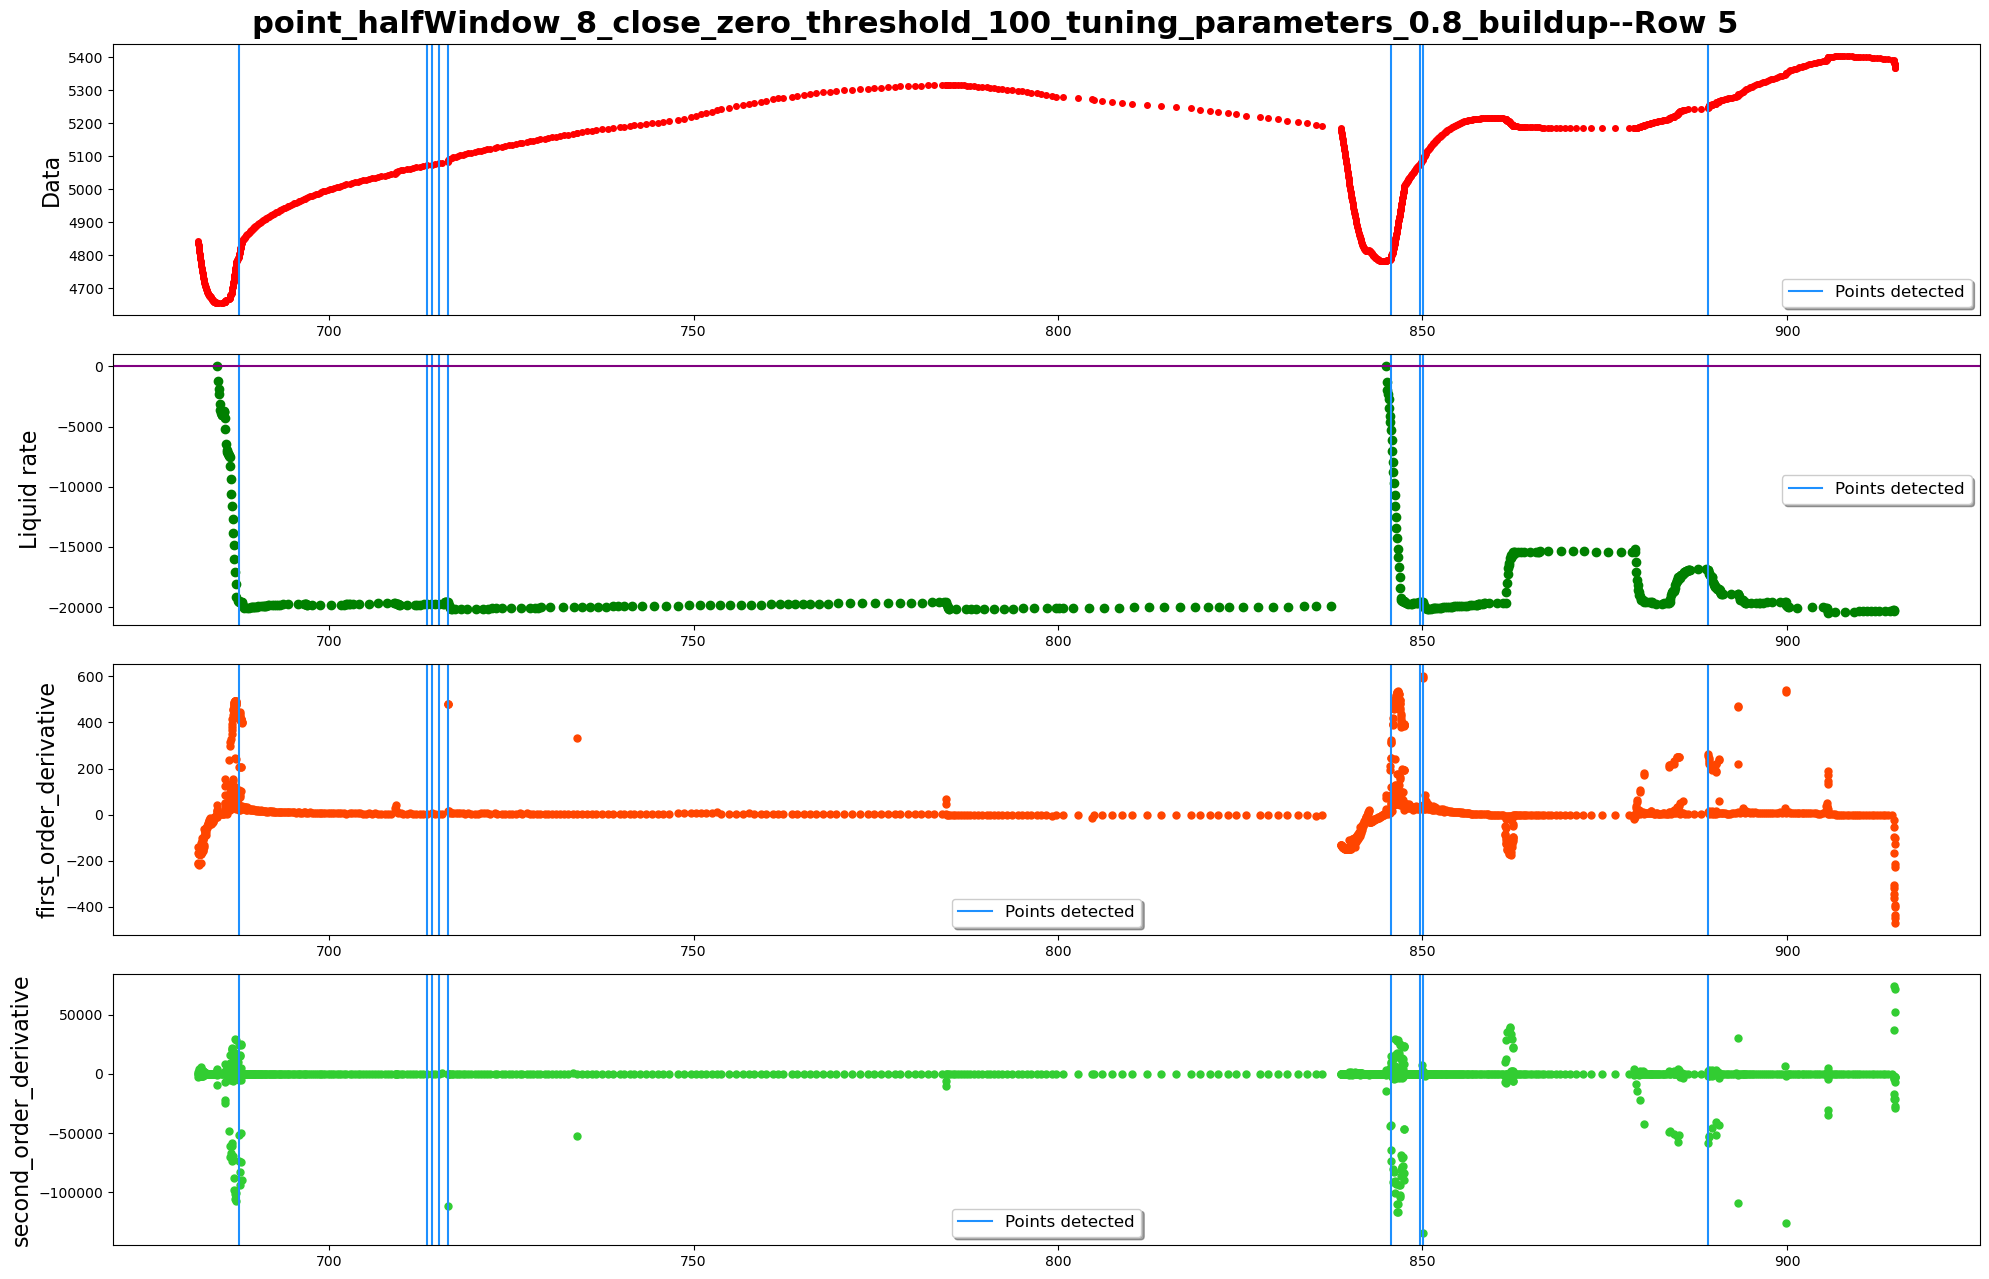

------row 6-----detected points:[6597, 6769, 6772, 6863, 6865, 7035, 7036, 7038, 7099, 7100, 7102]


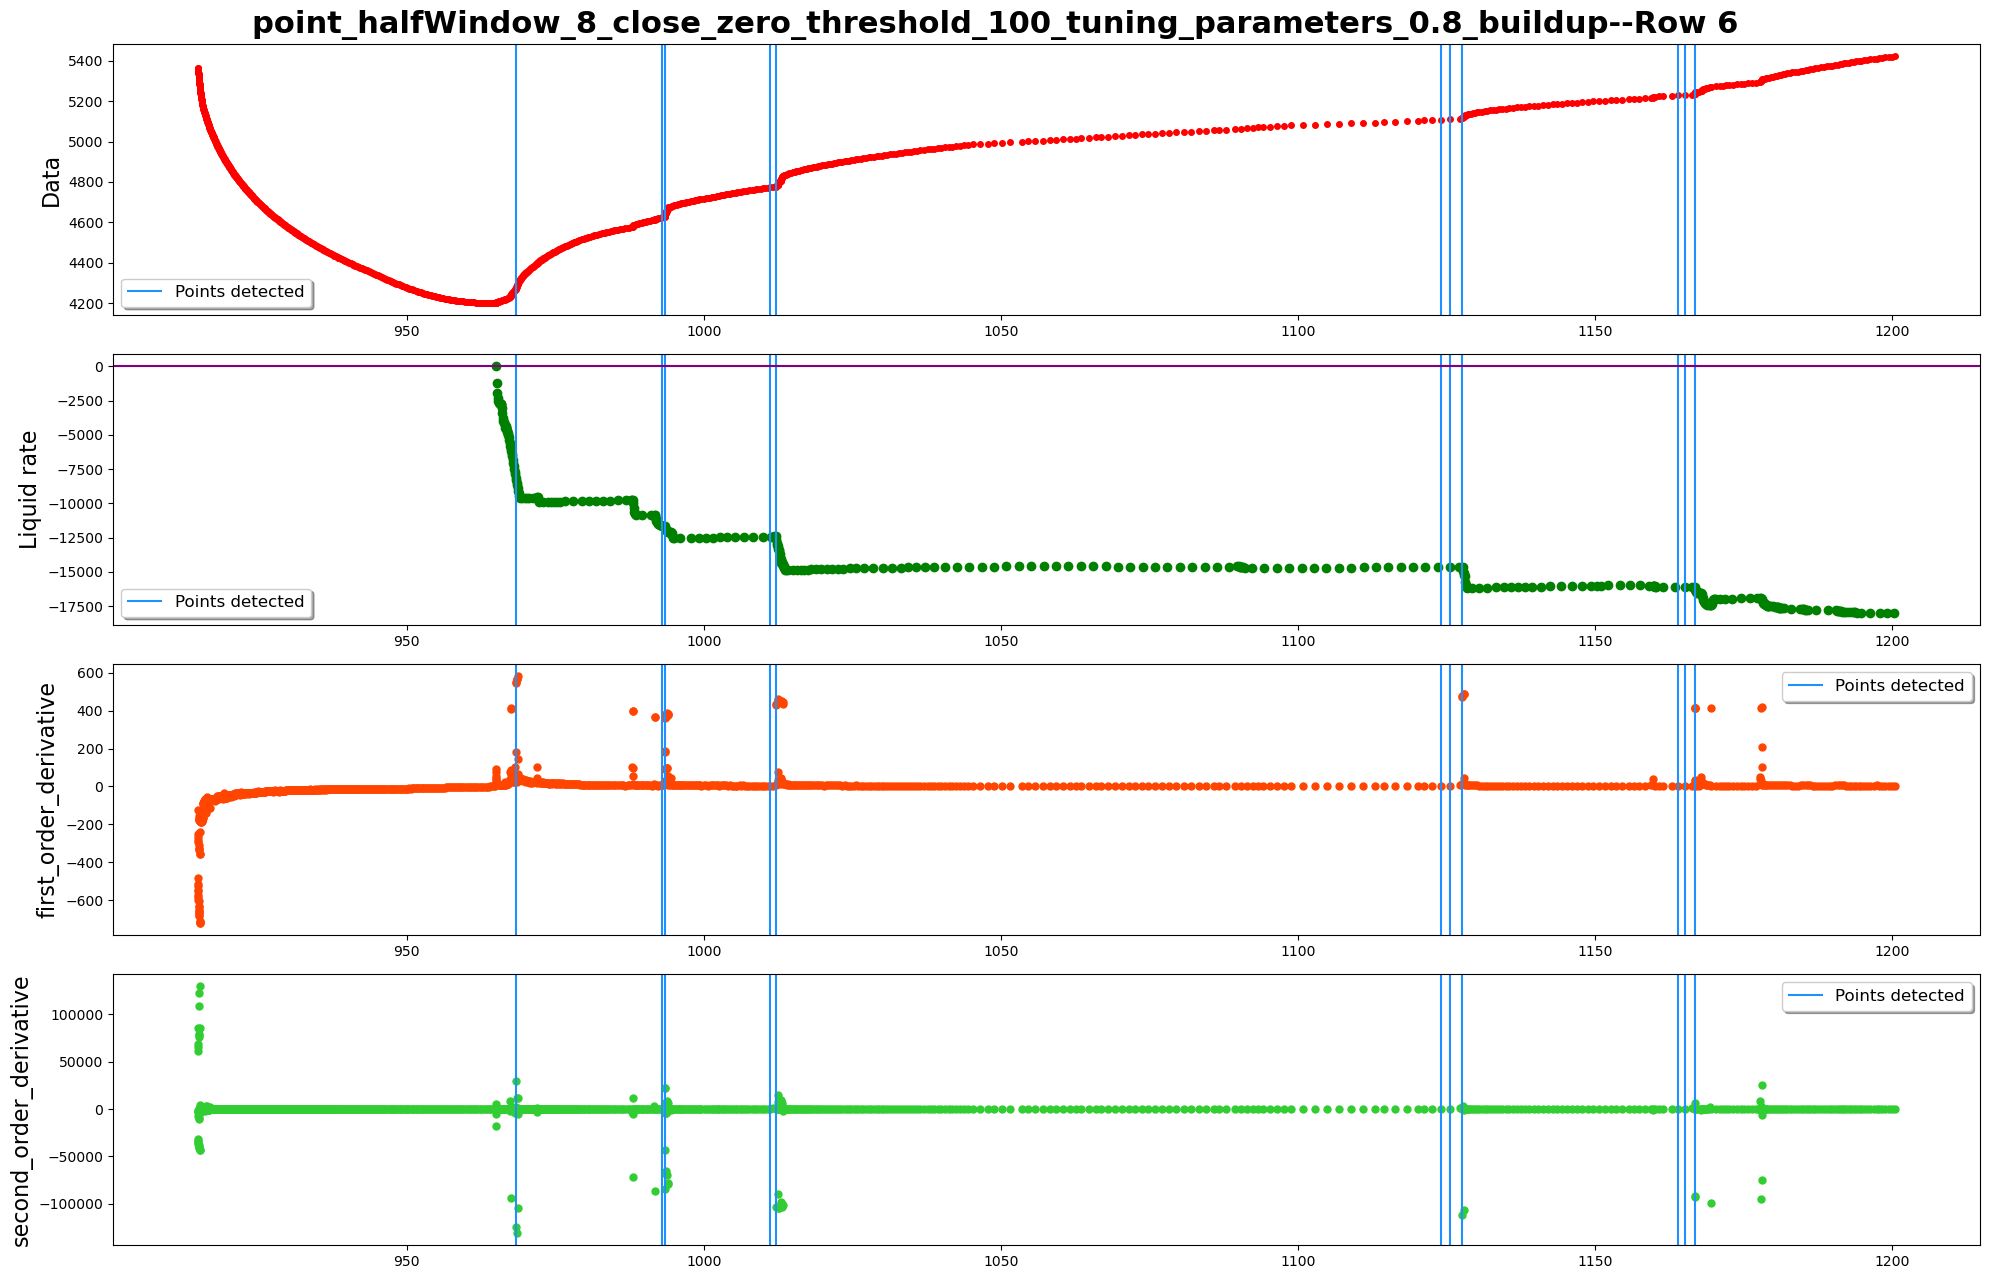

------row 7-----detected points:[7621, 7623, 7685, 7716, 7775, 8372, 8374]


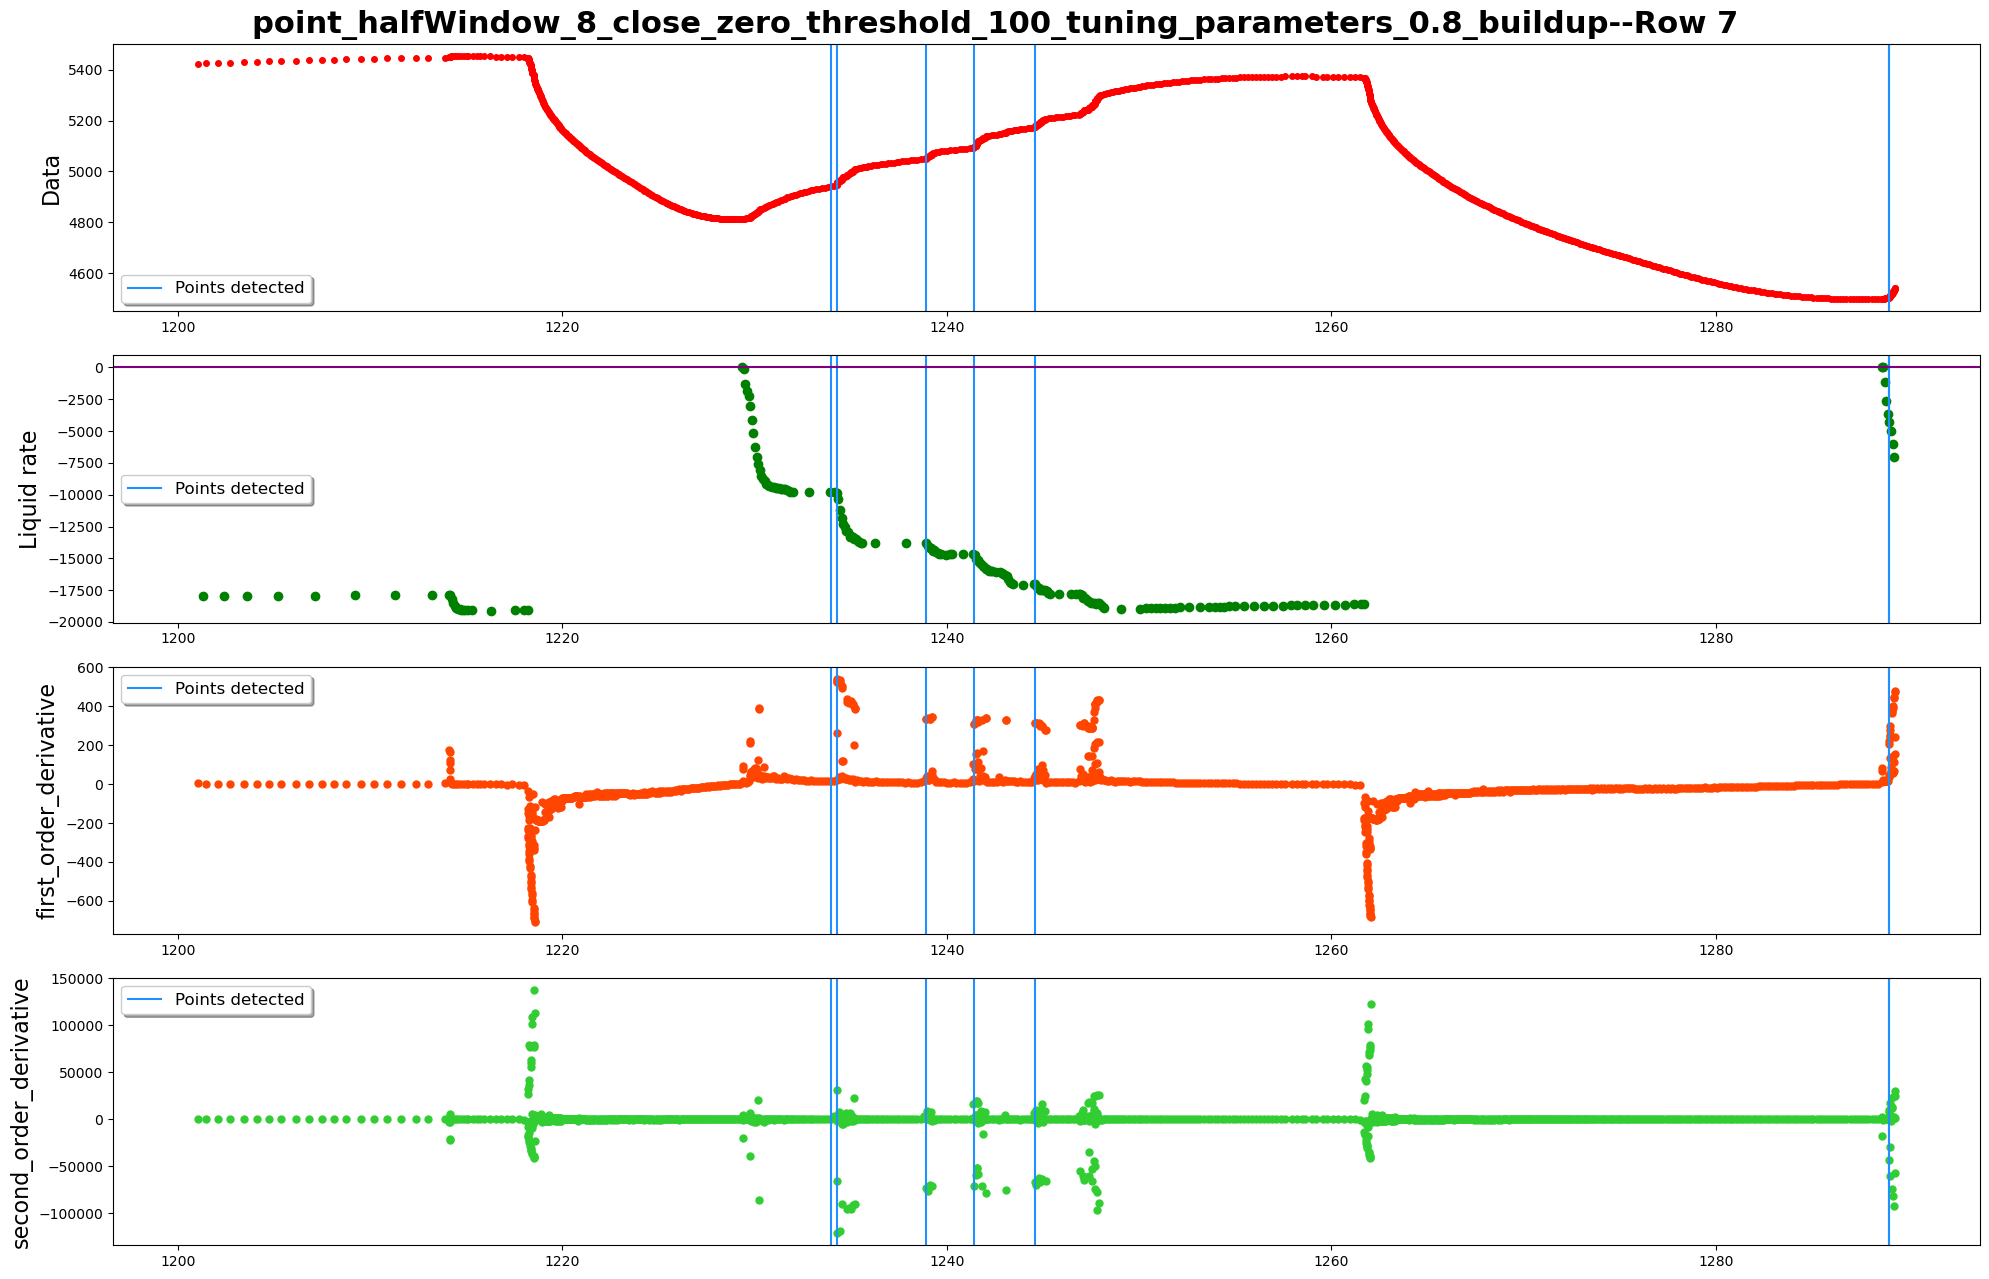

------row 8-----detected points:[8448, 8479, 8596, 8601, 8627, 8775, 8869, 8900]


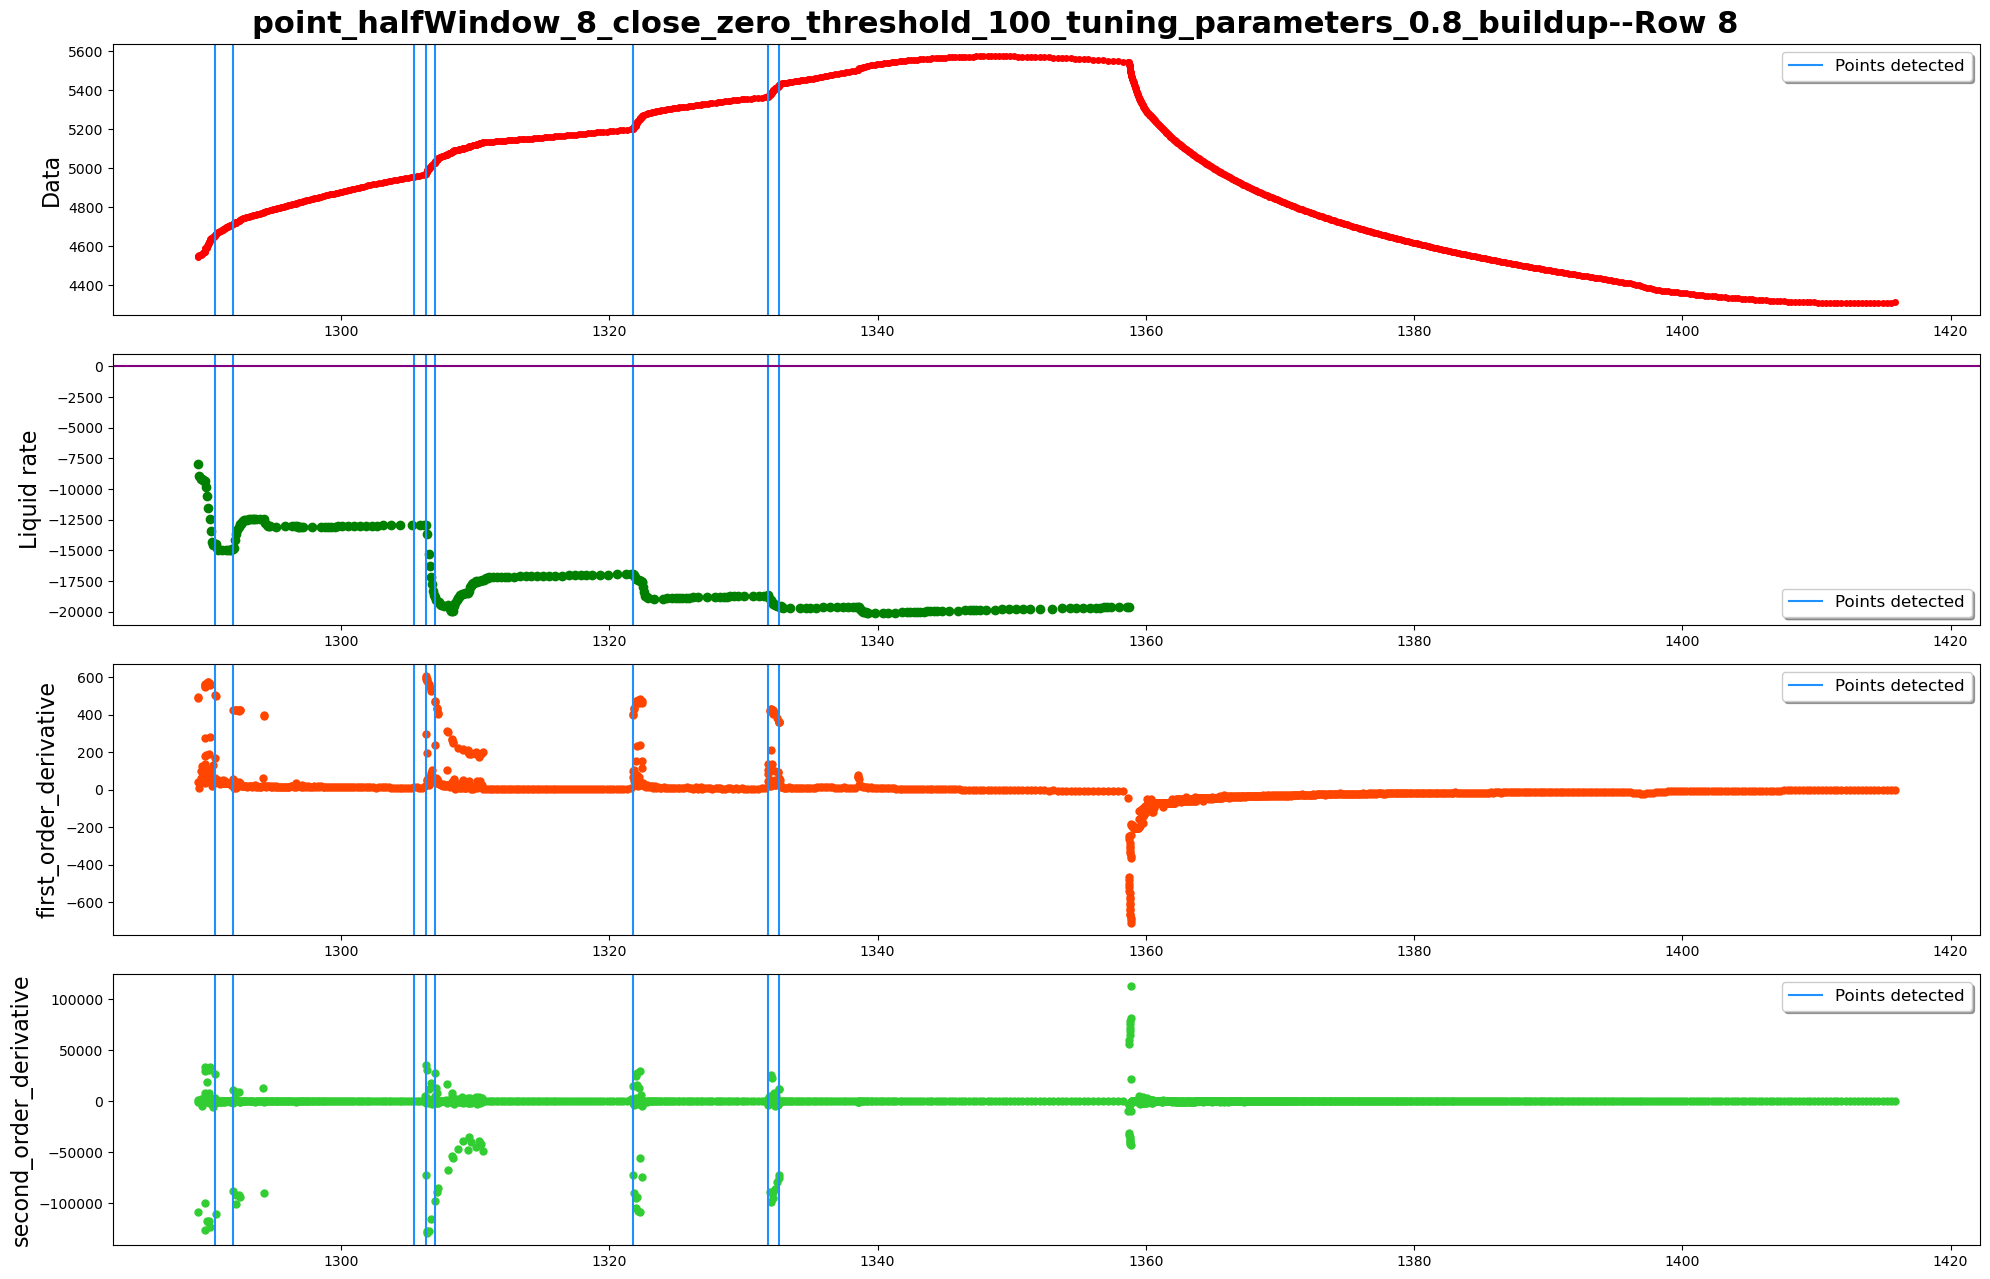

------row 9-----detected points:[9619, 9843, 10060, 10063, 10065, 10254, 10333, 10466]


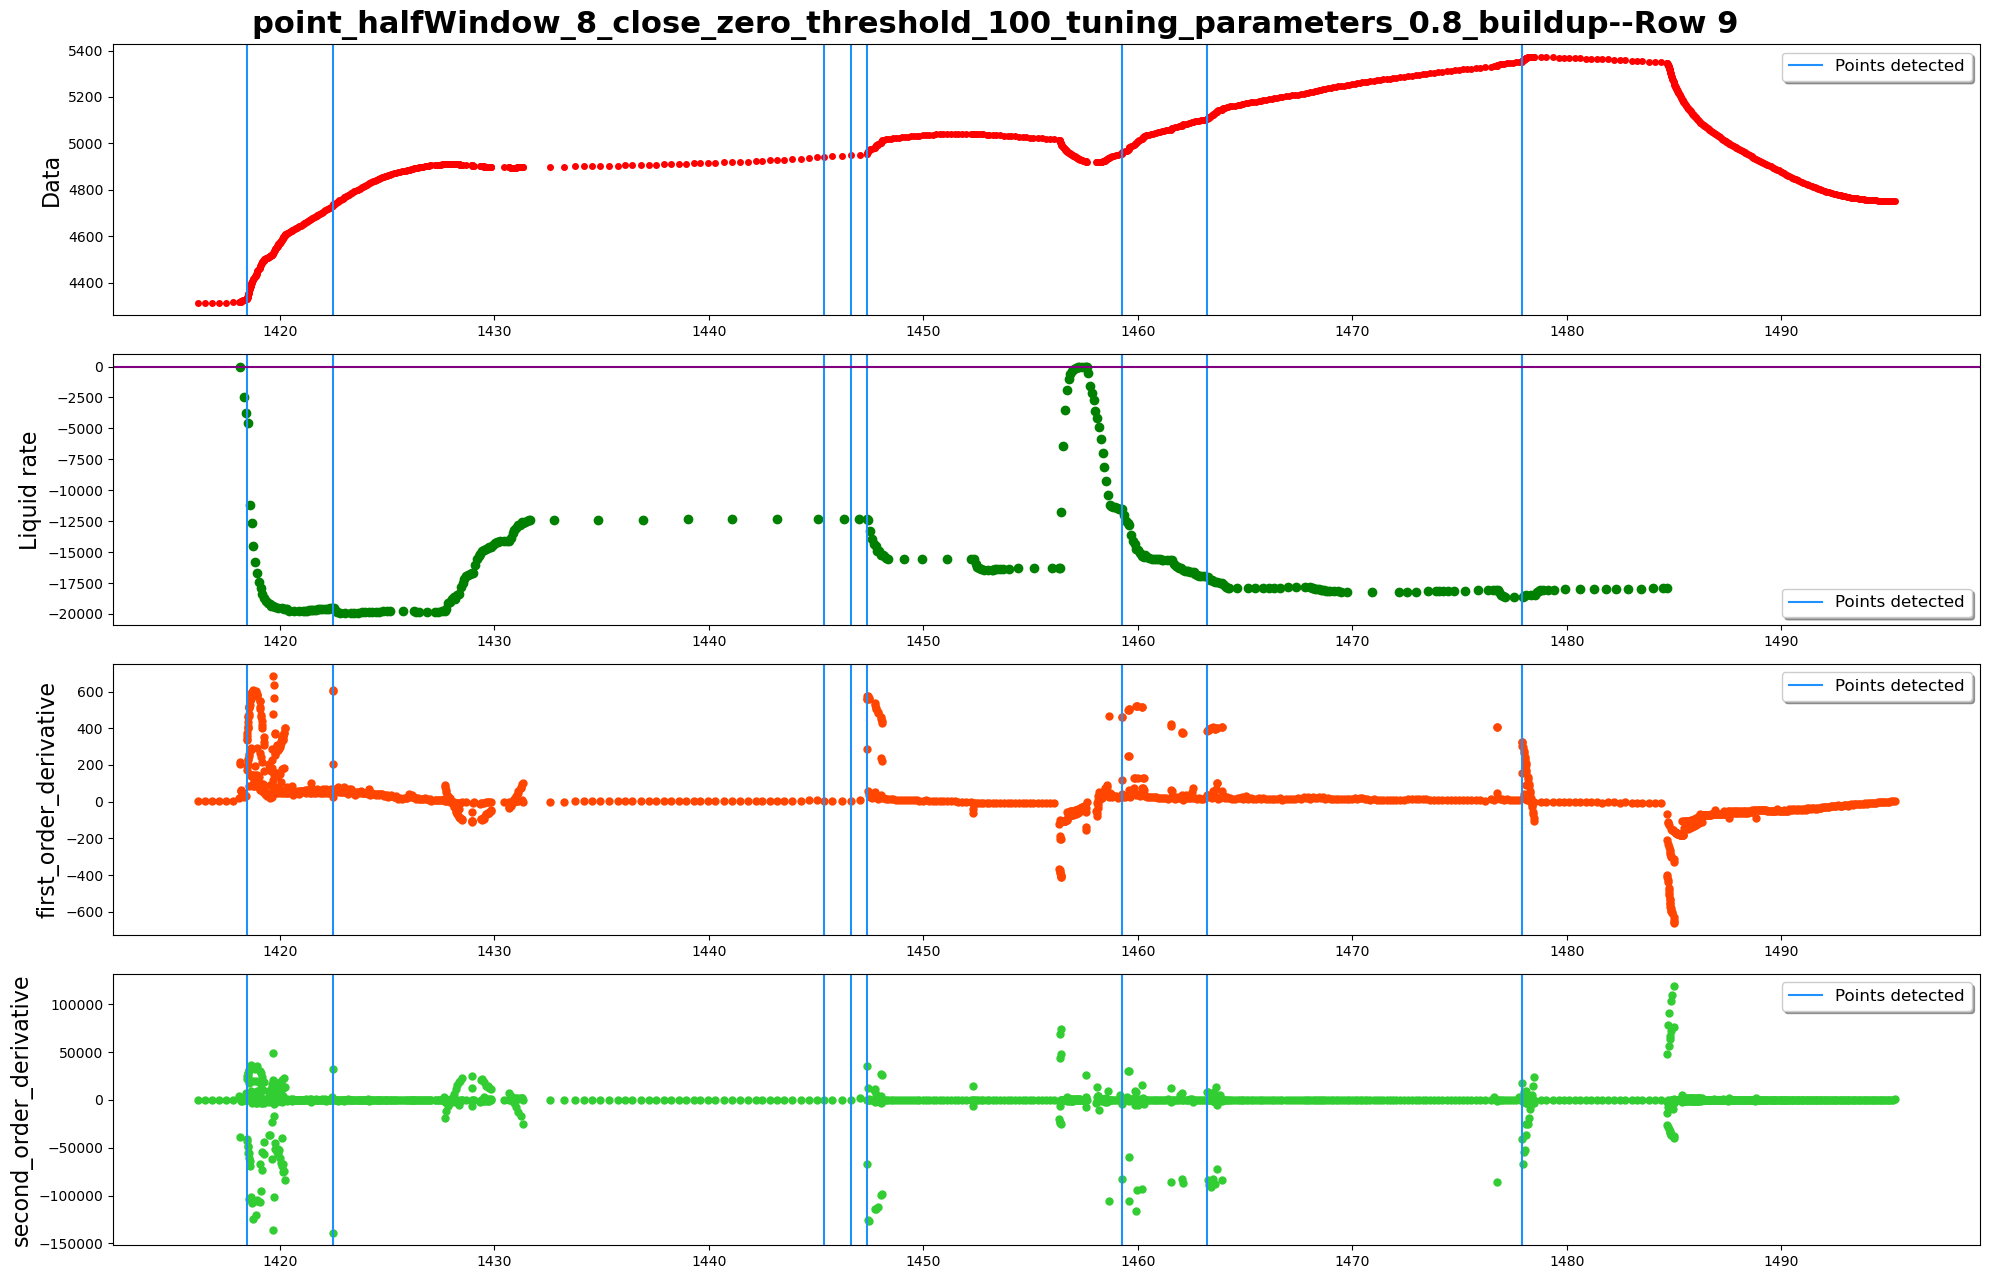

------row 10-----detected points:[10816, 10869, 10873, 10946, 10949, 10995, 11029, 11589, 11640, 11747]


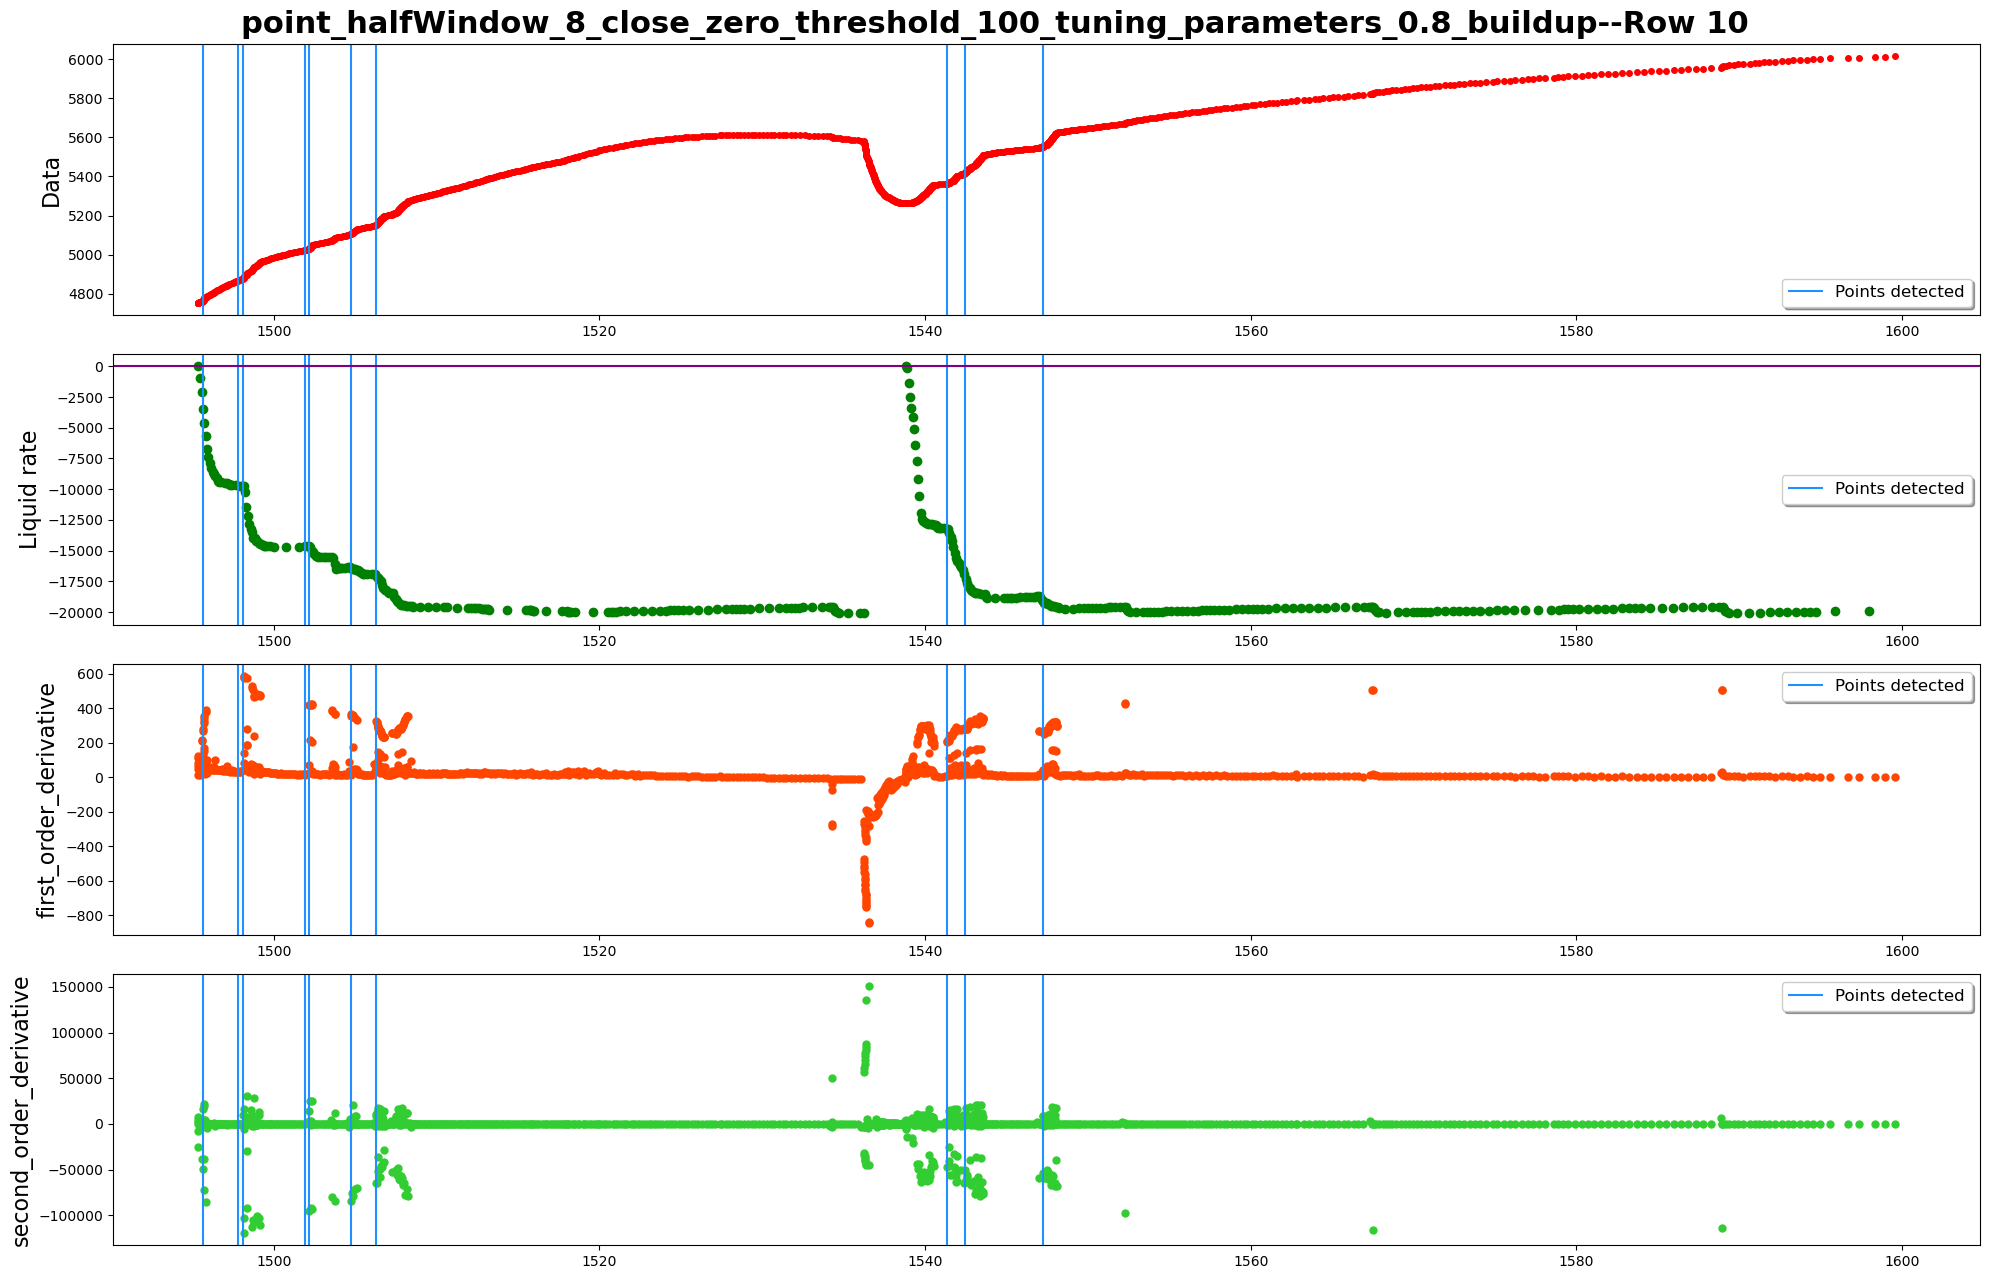

------row 11-----detected points:[12233, 13039, 13192]


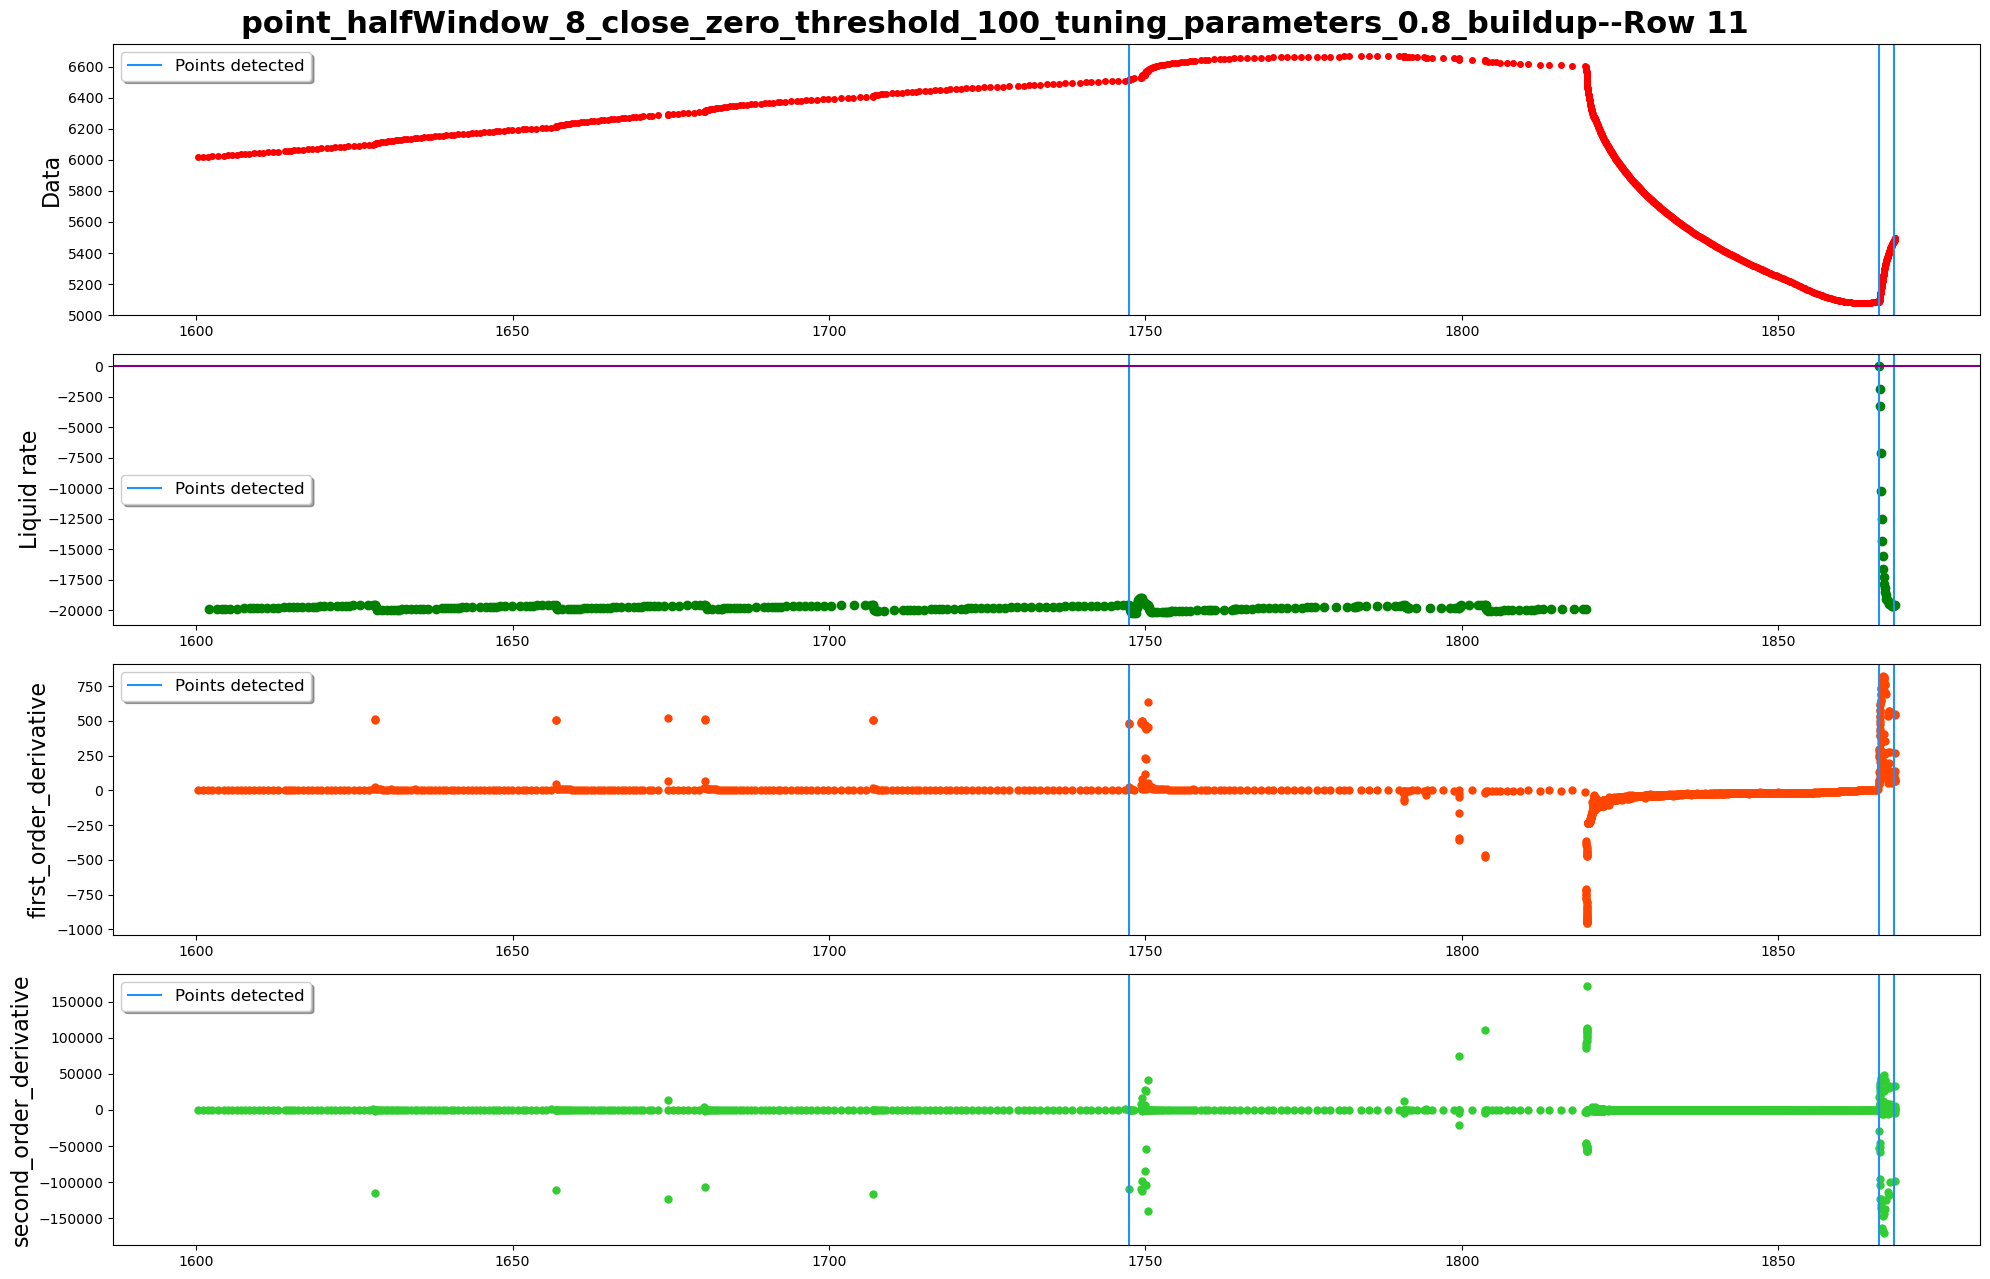

------row 12-----detected points:[13270, 13271, 13332, 13335, 13398, 13418, 13528, 13601, 13603, 13664, 13668, 13764, 13767, 14106, 14274]


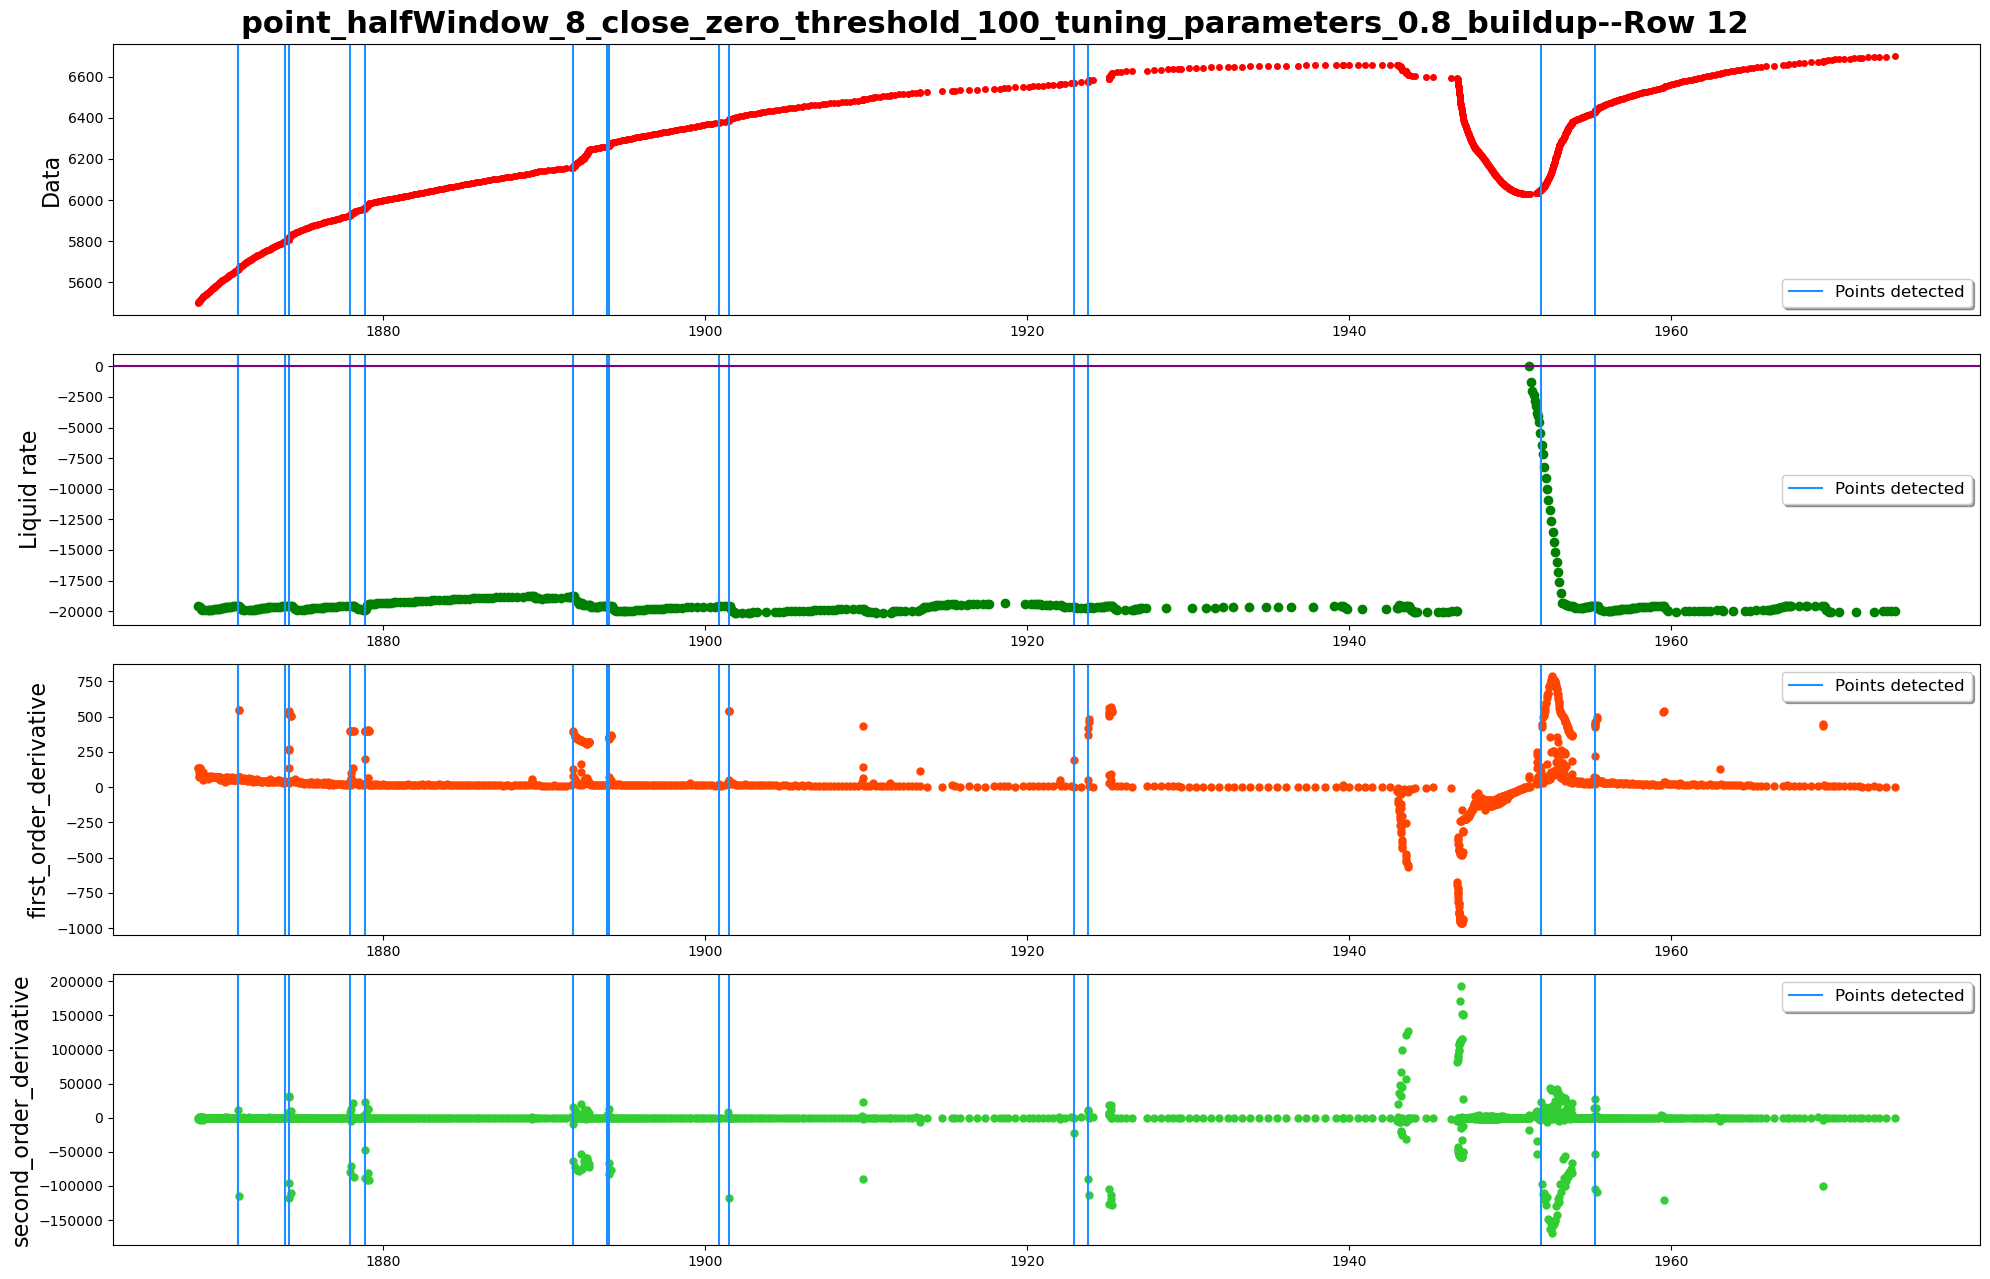

------row 13-----detected points:[14664, 15350, 15404, 15576]


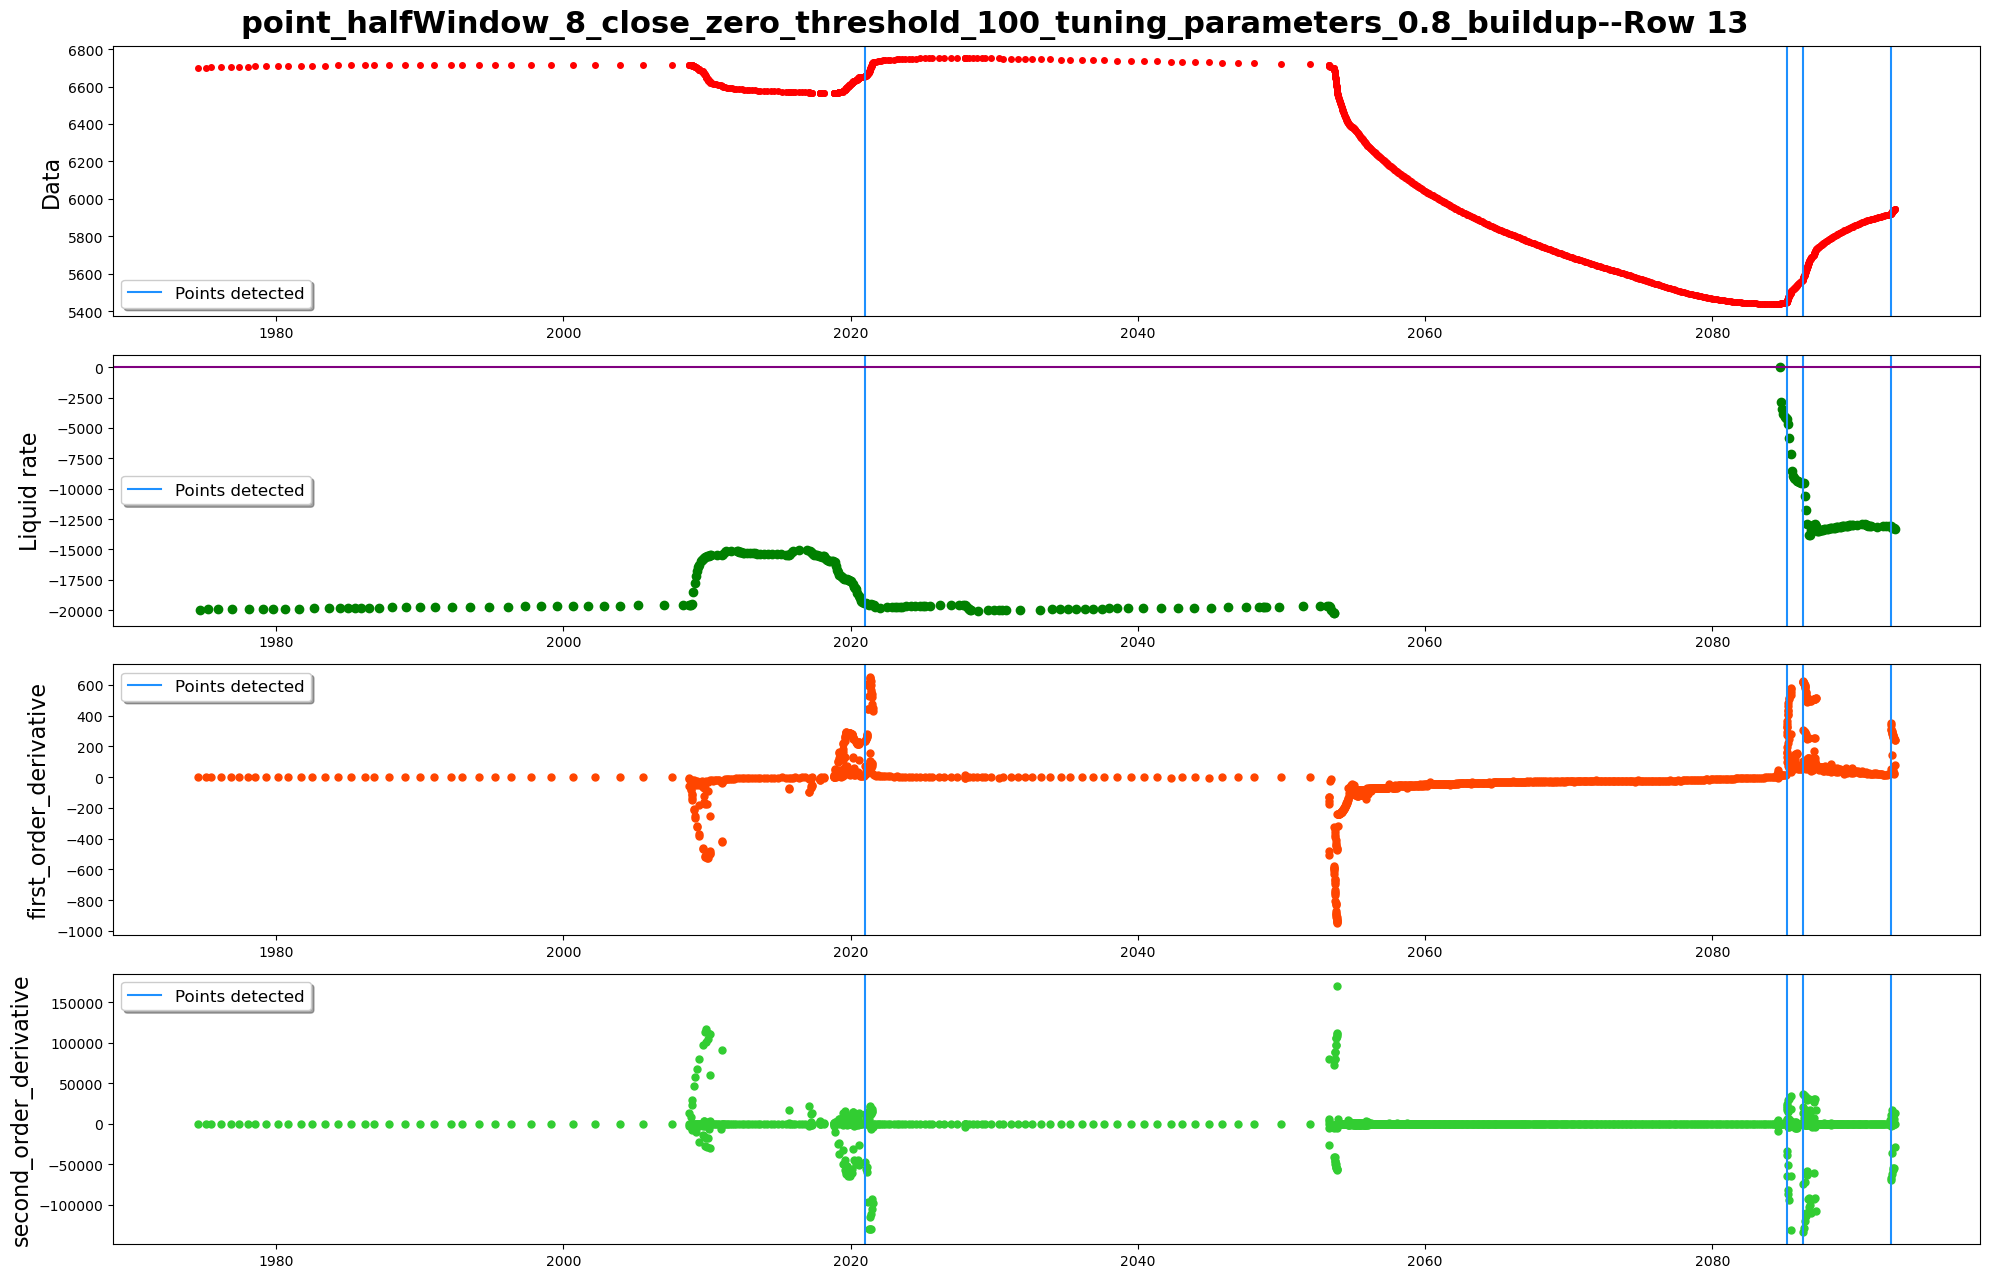

------row 14-----detected points:[15635, 15657, 15740, 15863, 15867, 15937, 15940, 16006, 16009, 16615, 16616, 16620, 16748, 16787]


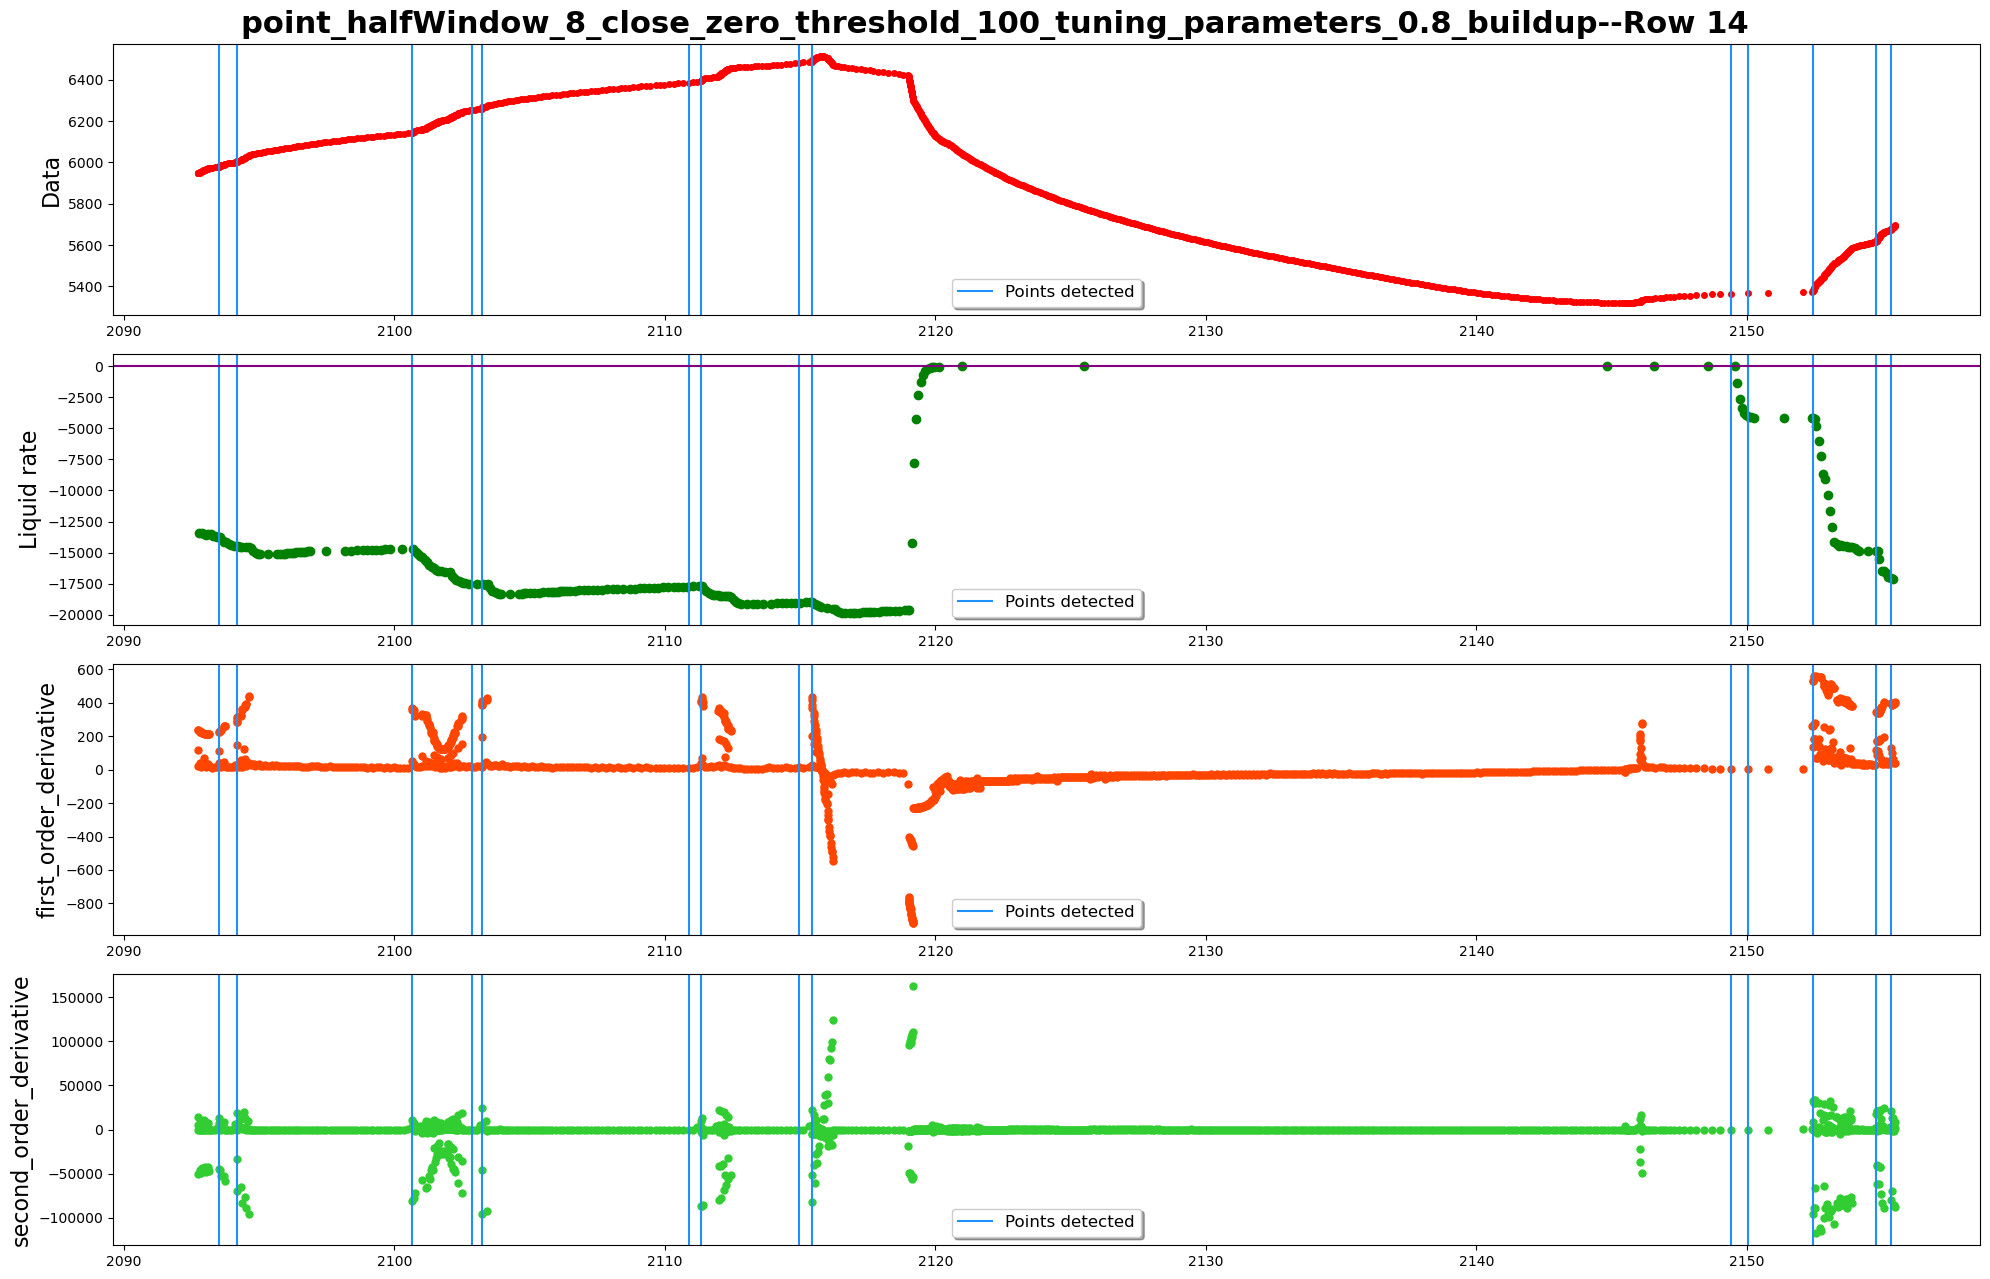

------row 15-----detected points:[16836, 16905, 17064, 17065, 17129, 17246, 17337, 17338, 17341, 17464]


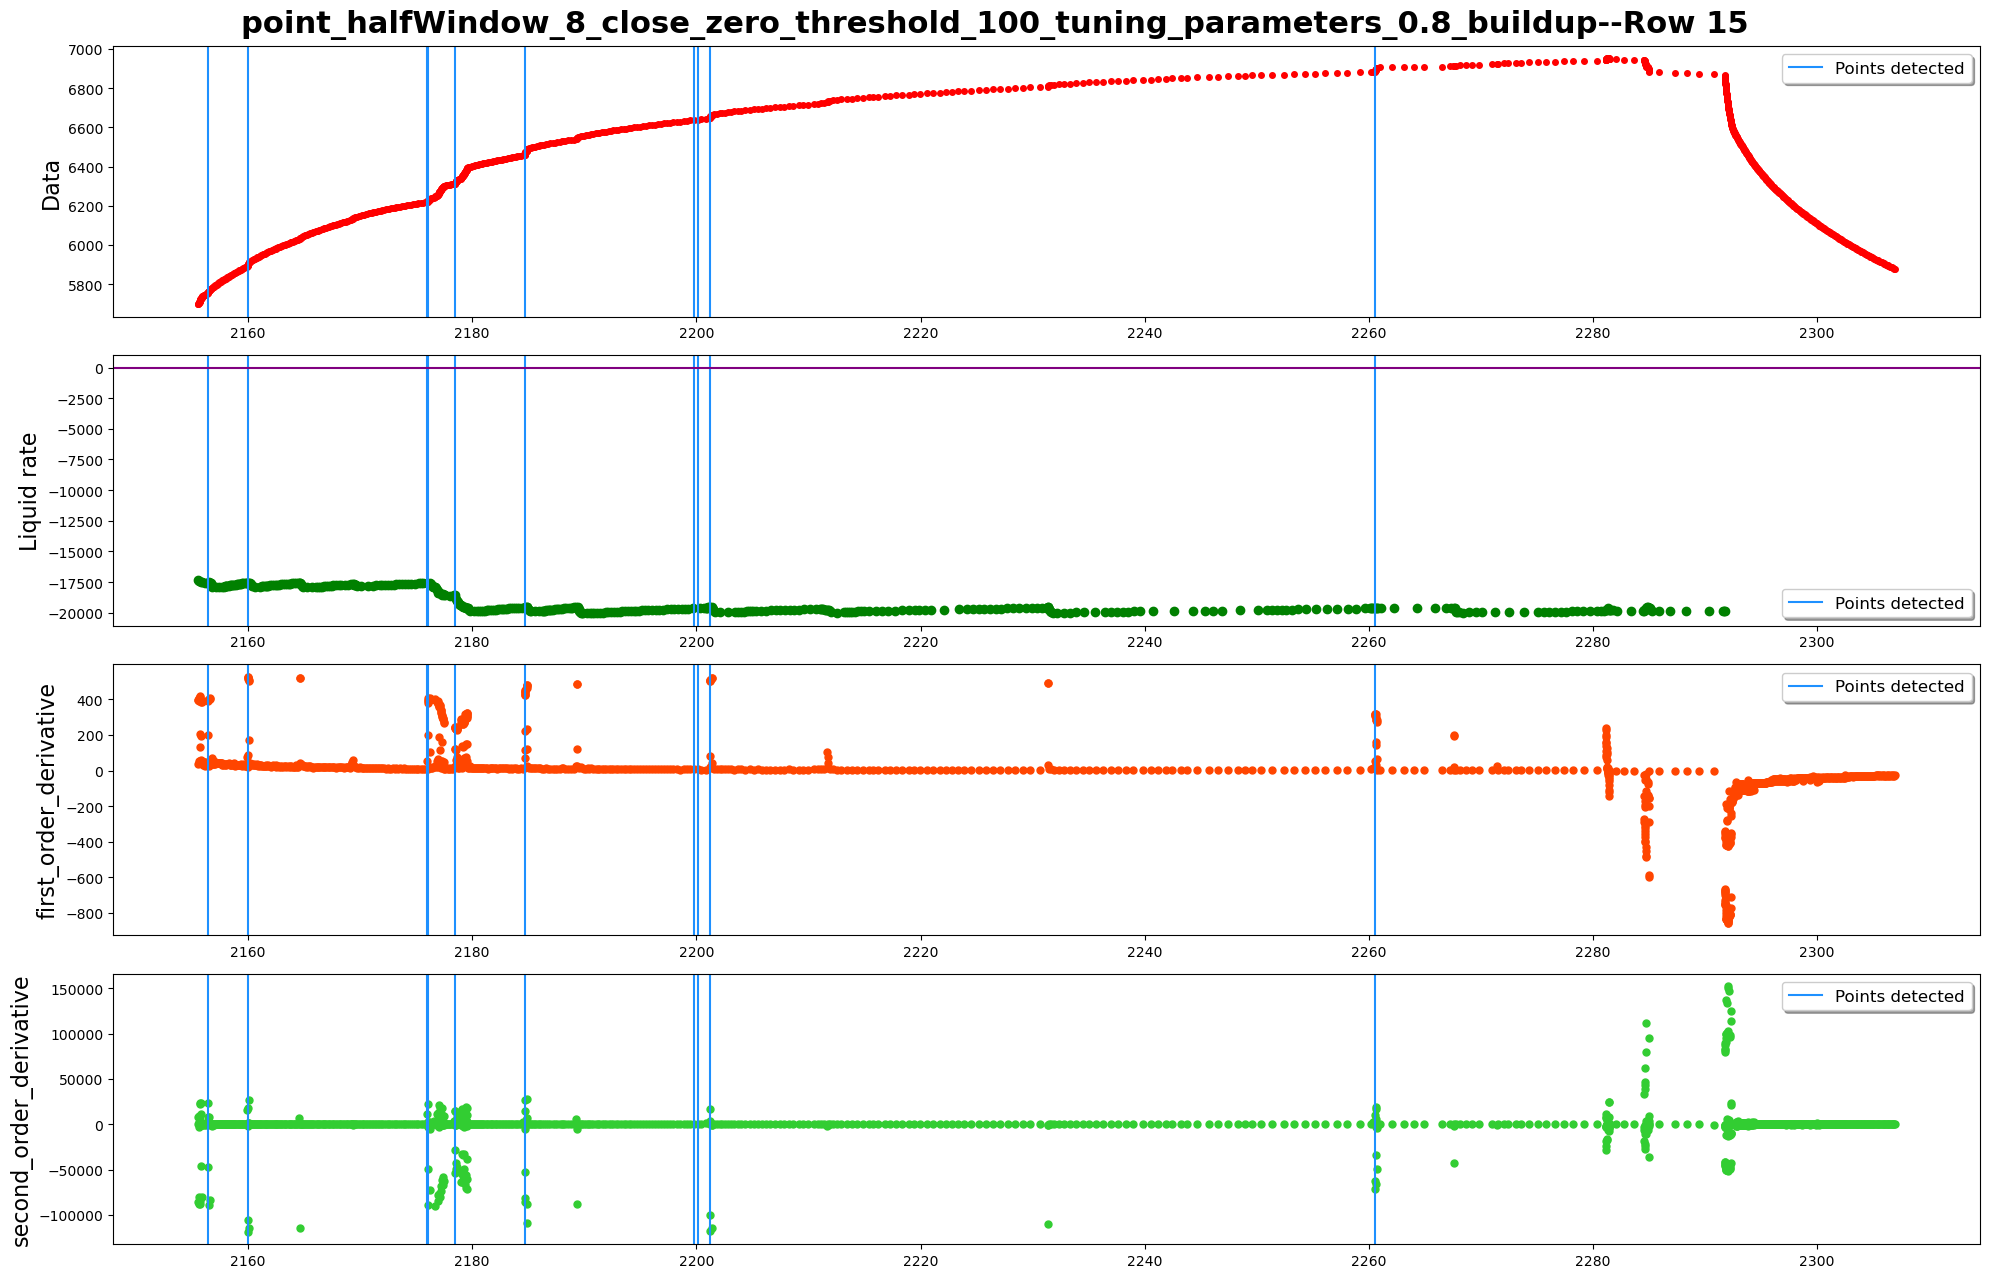

------row 16-----detected points:[18450, 18455, 18558, 18647, 18715, 18719, 18780, 18813, 18946, 19031, 19066, 19150]


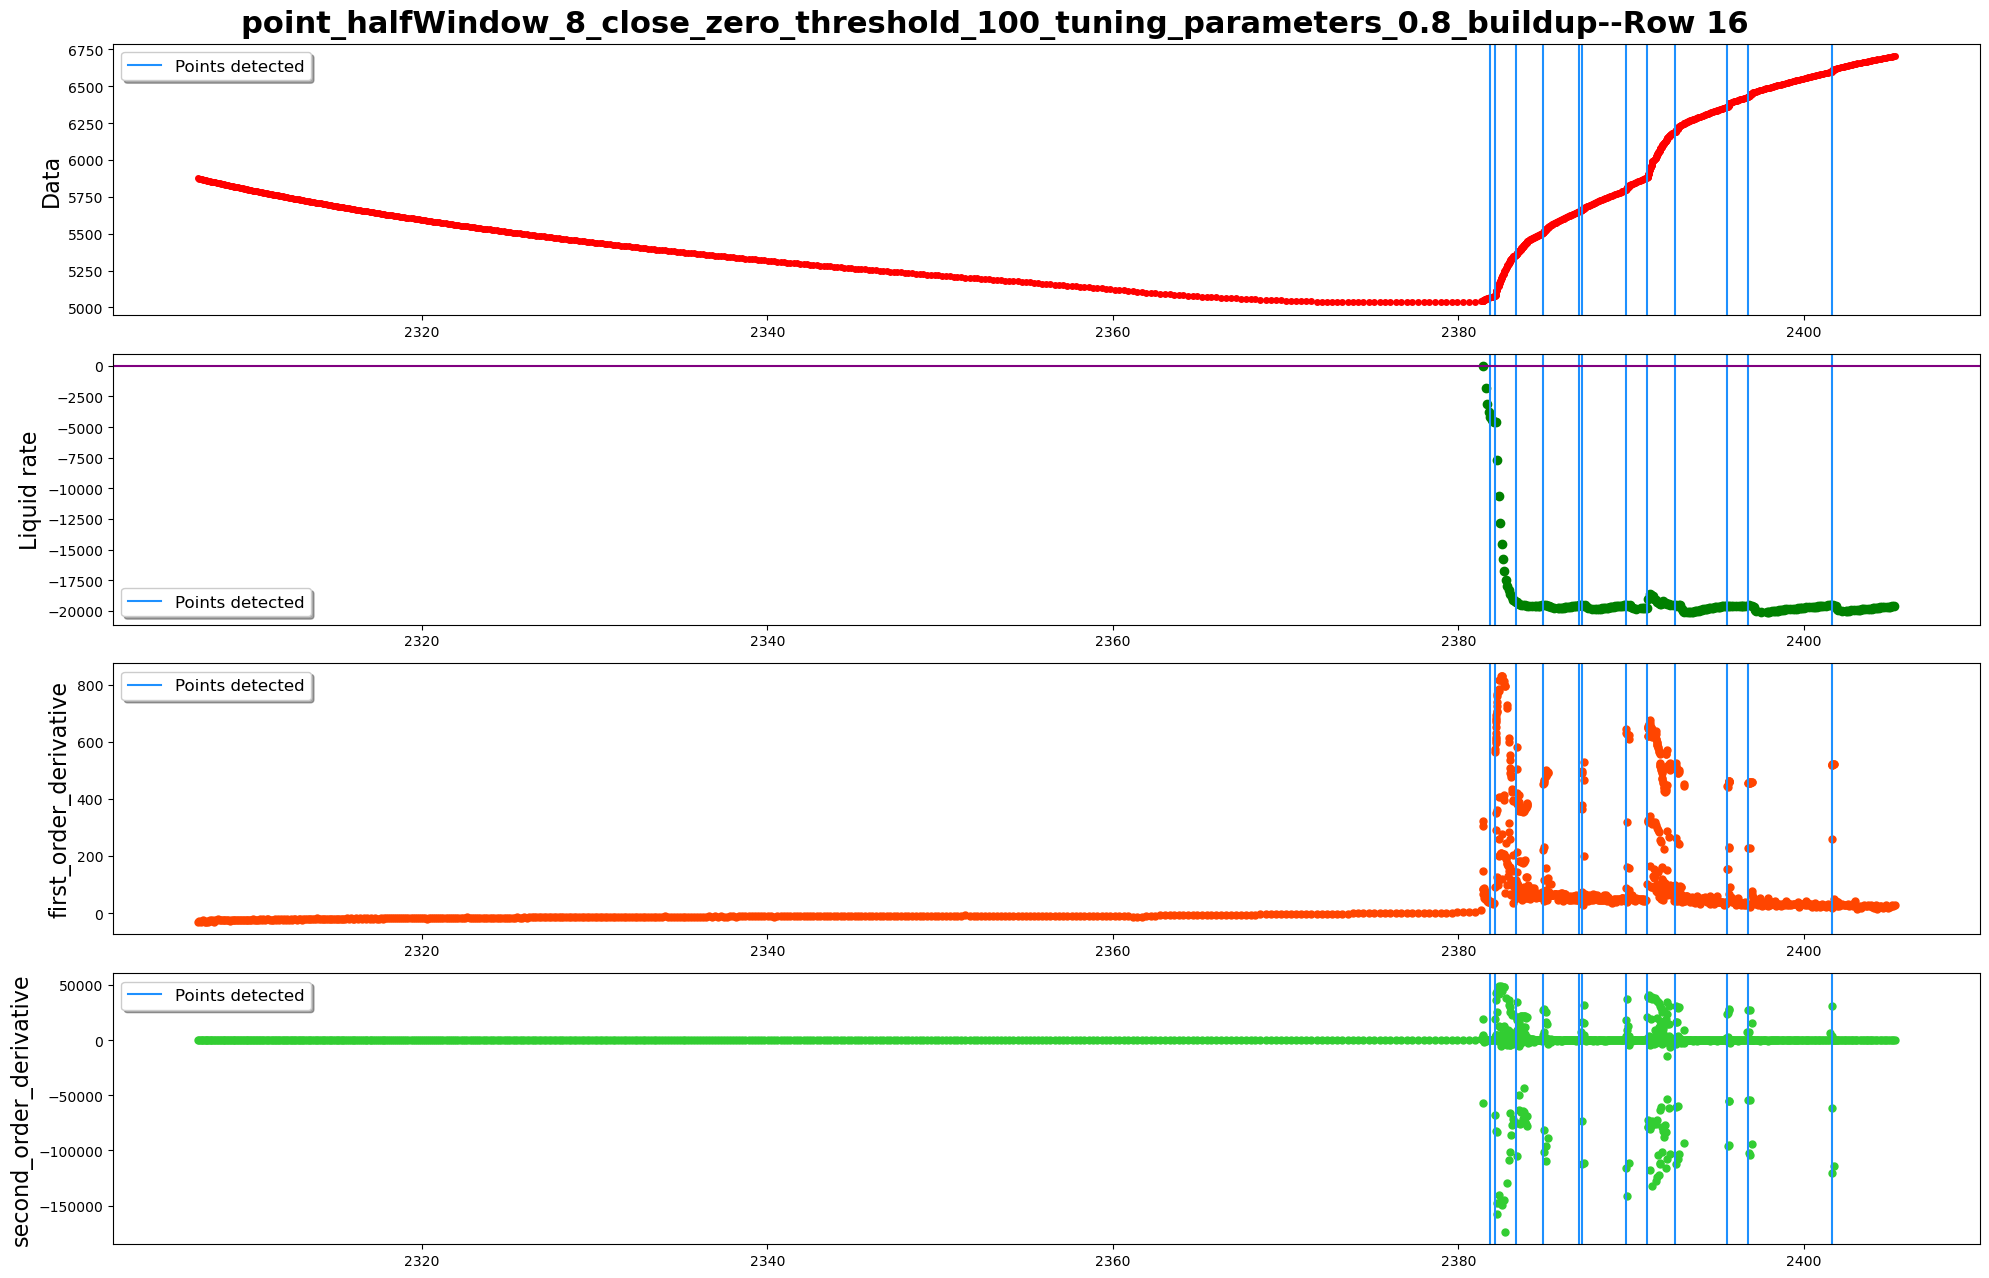

------row 17-----detected points:[19204, 19207, 19459, 19558, 19787, 20348, 20349]


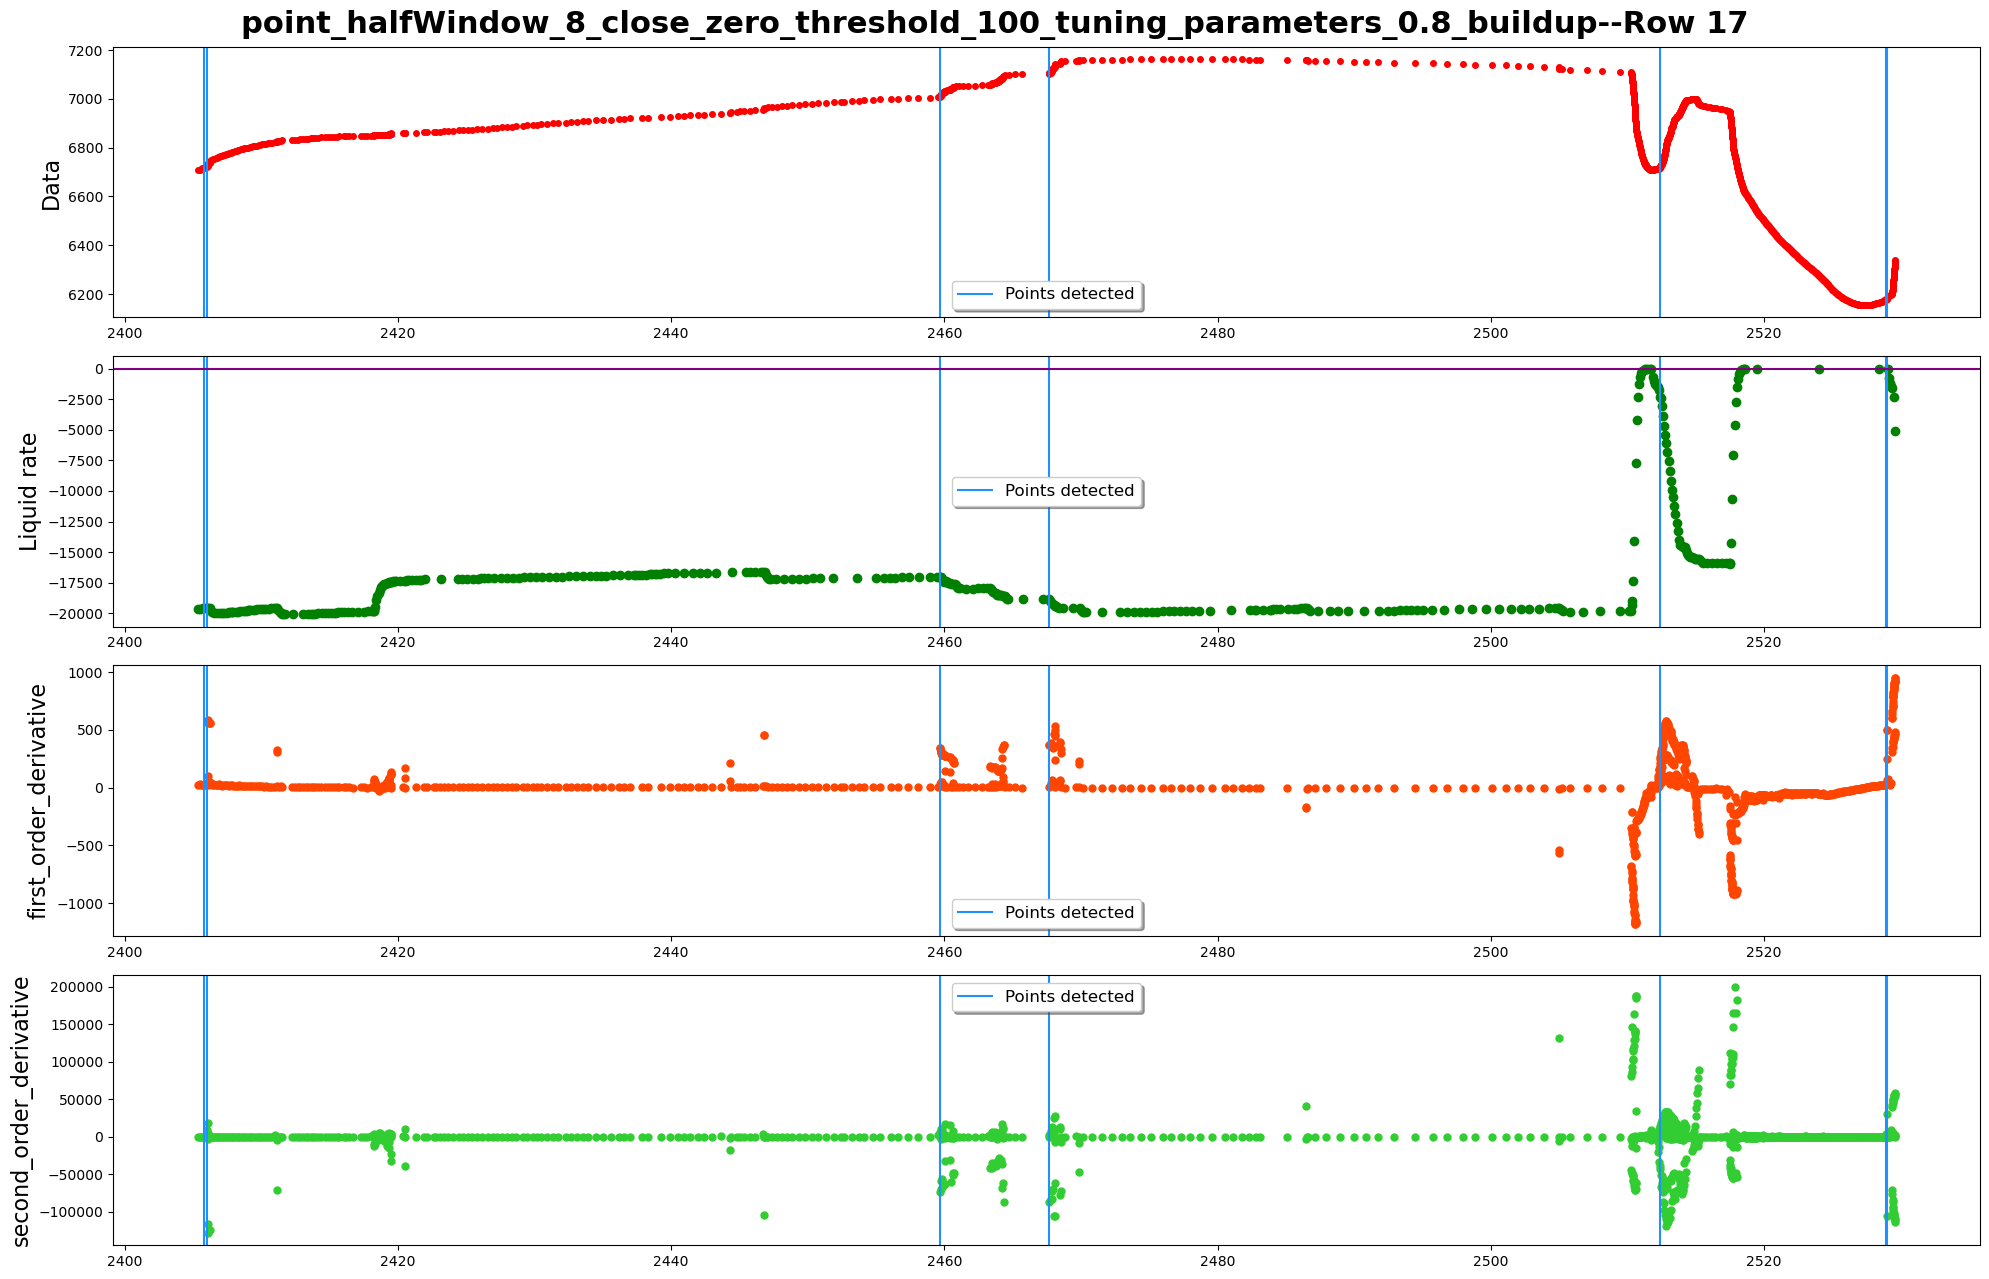

------row 18-----detected points:[20492, 21037, 21214, 21240, 21418]


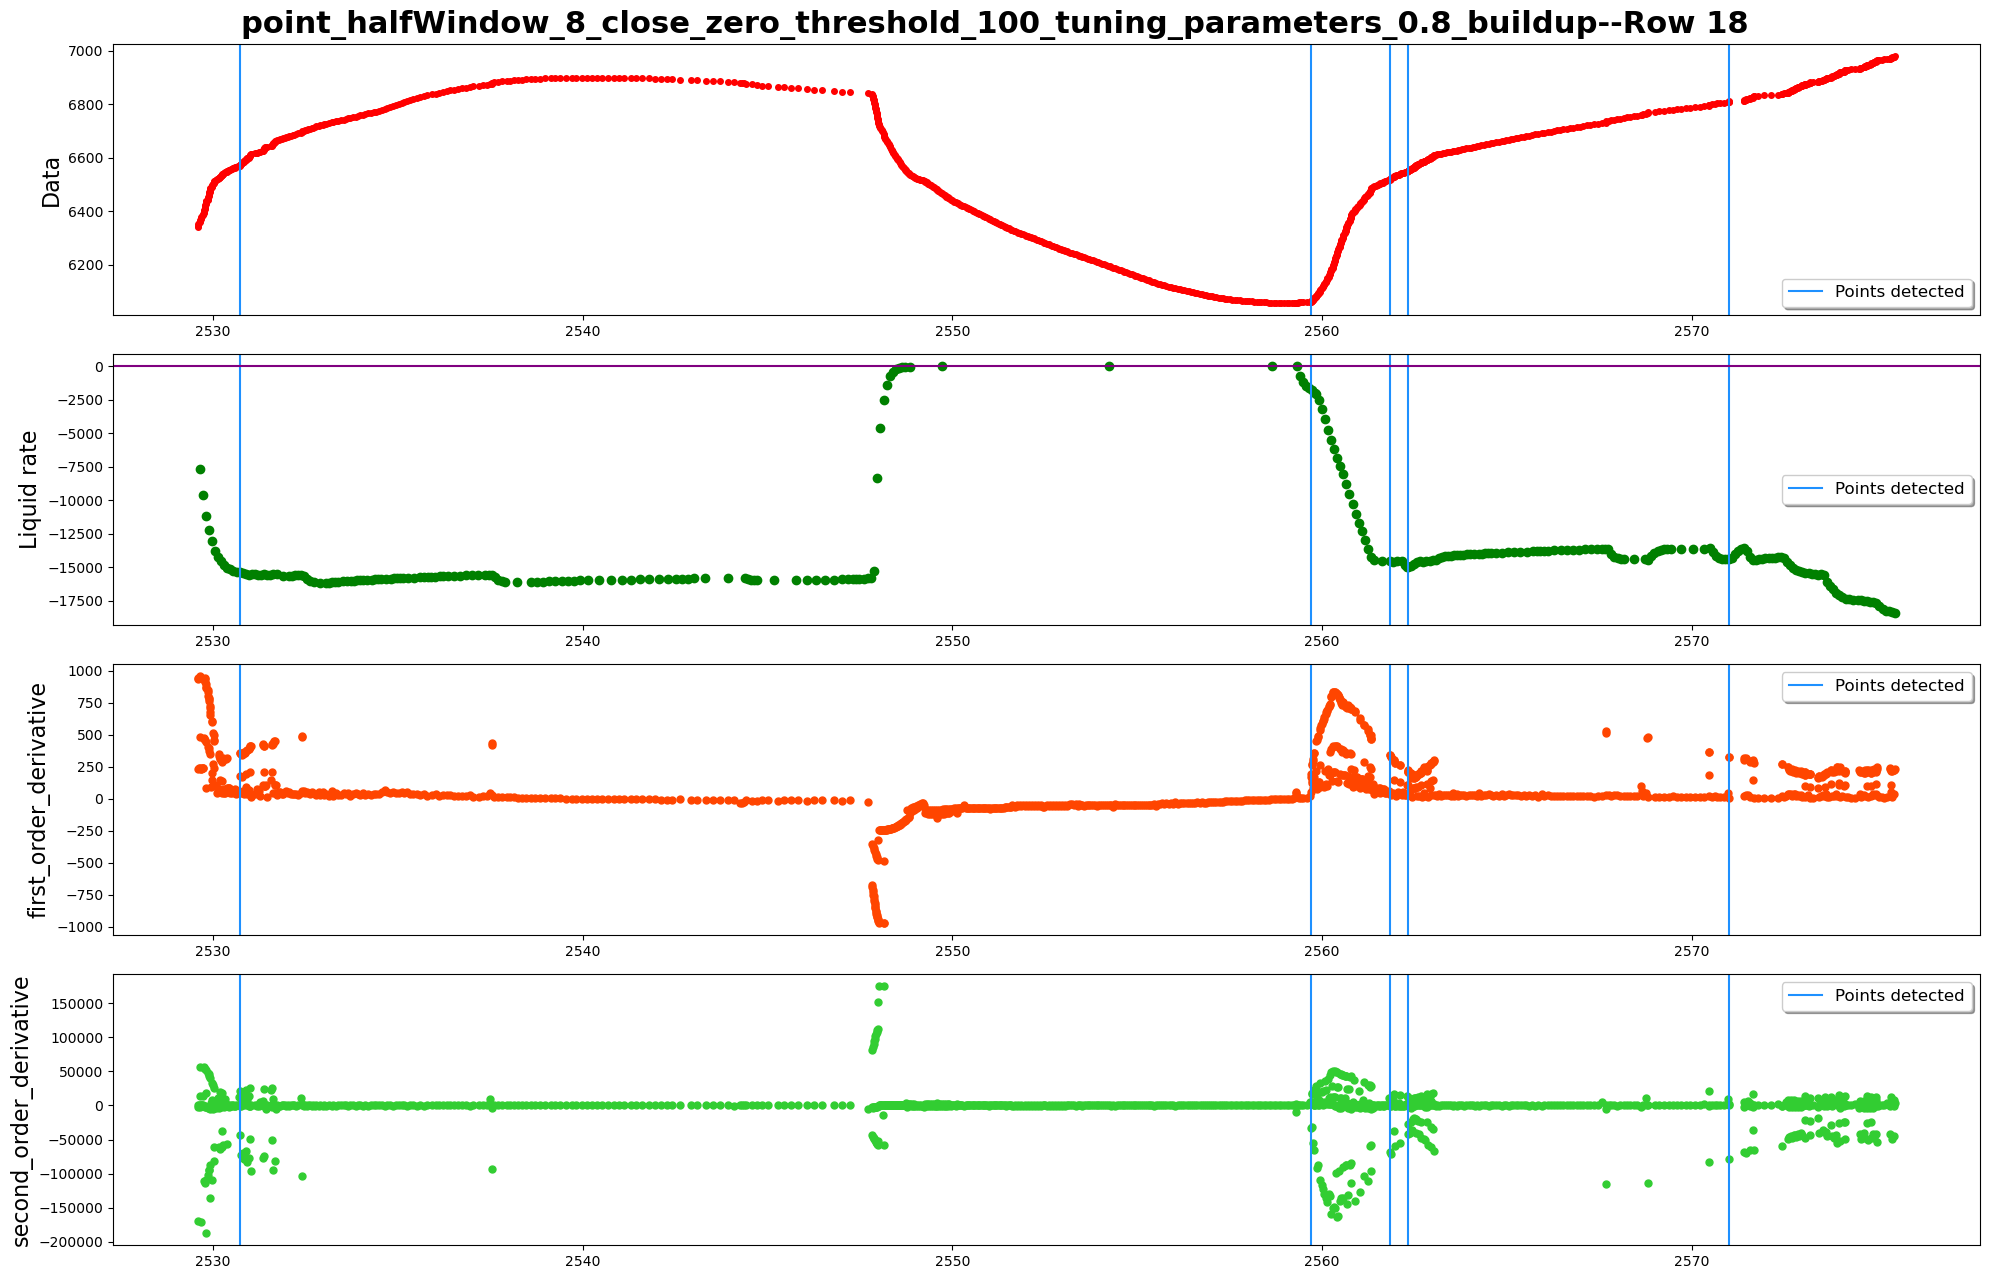

------row 19-----detected points:[21653, 21776, 21778, 22354, 22407, 22489, 22529, 22606, 22608, 22611, 22621]


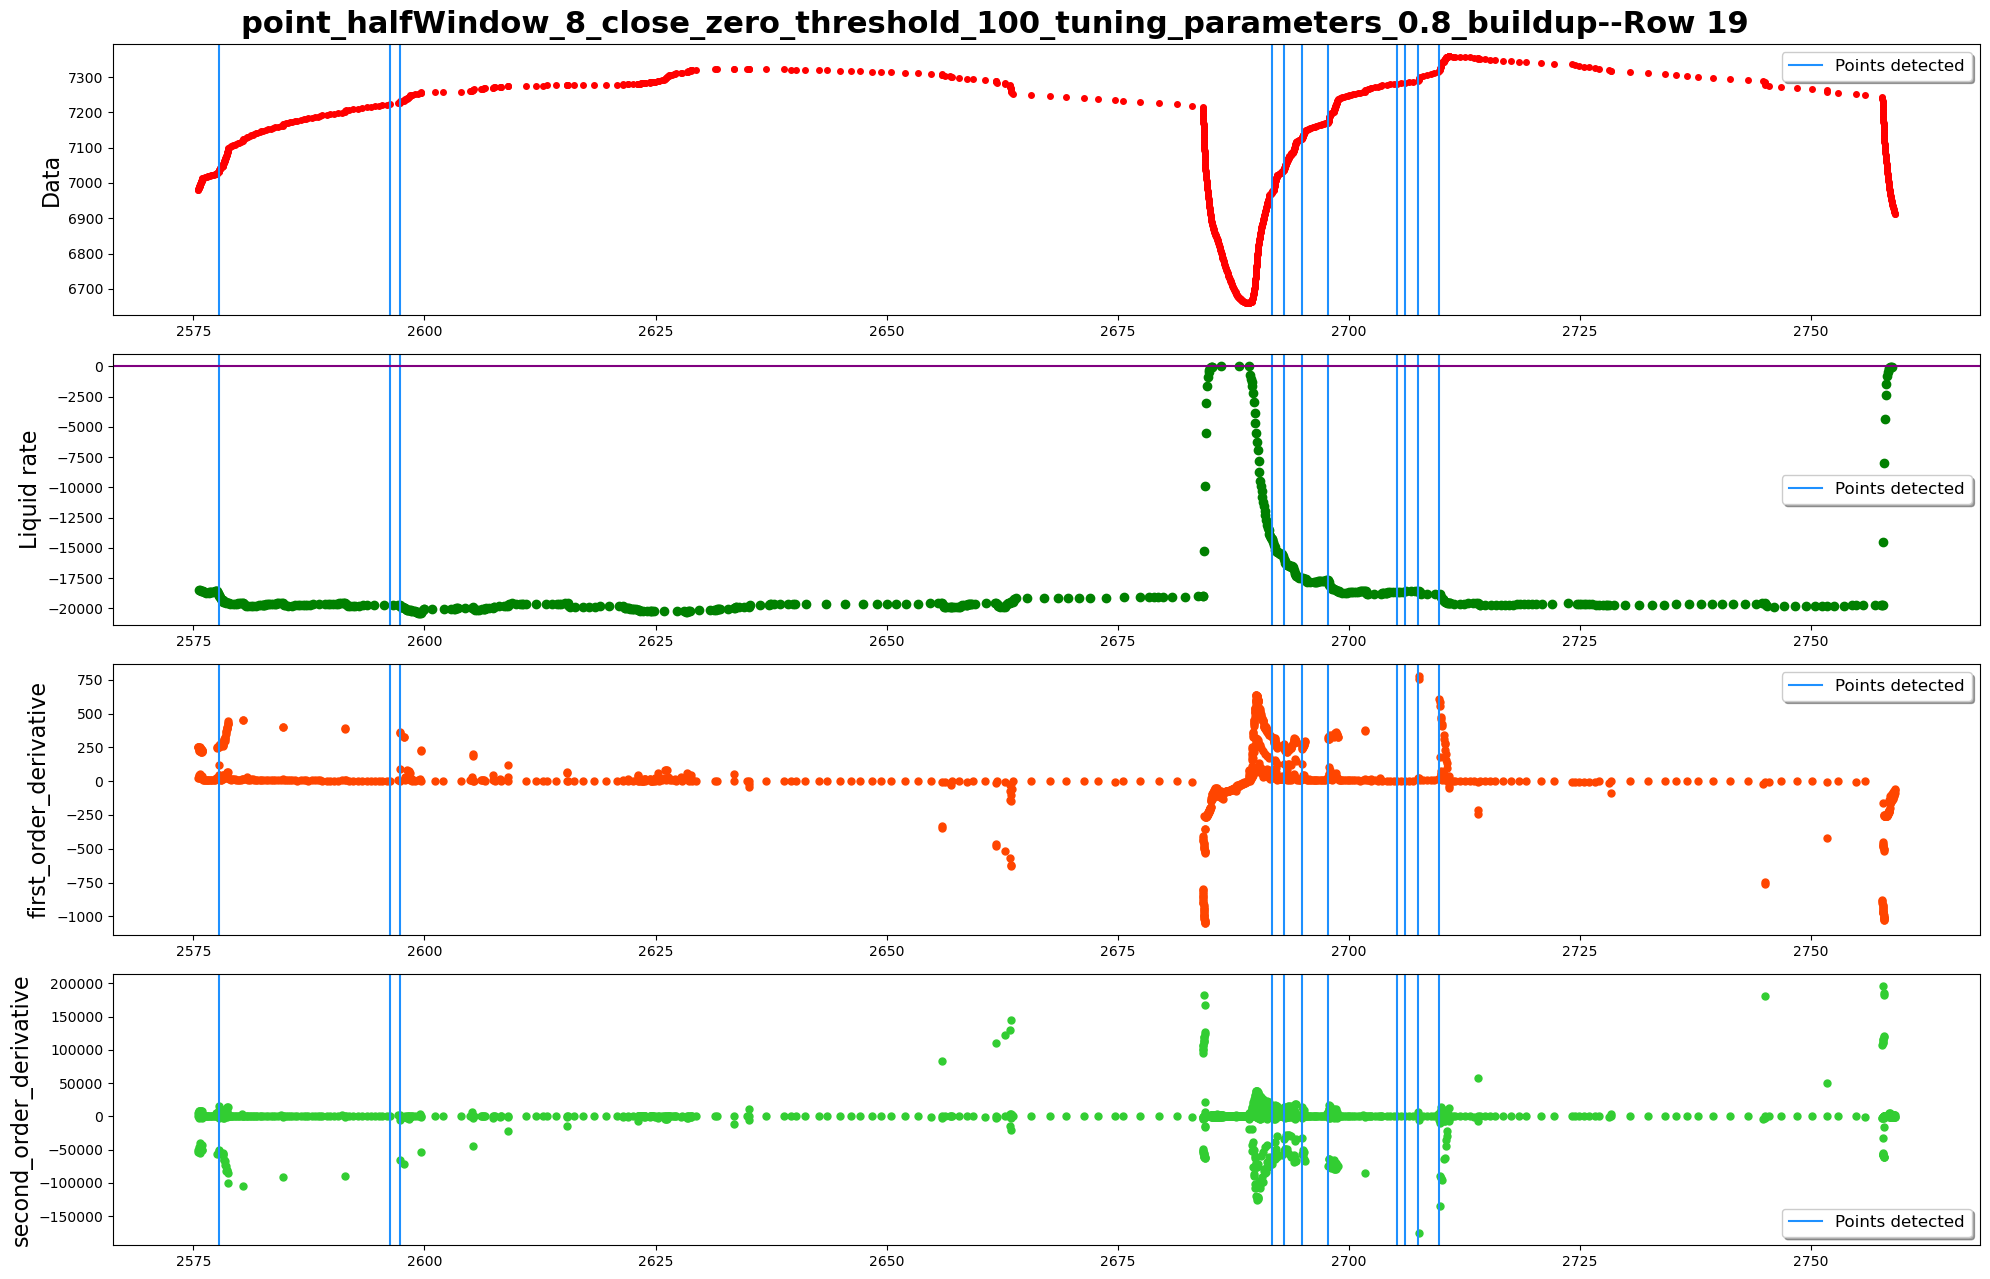

------row 20-----detected points:[23238, 23562, 23567, 23639, 23845, 23921, 23924, 23977]


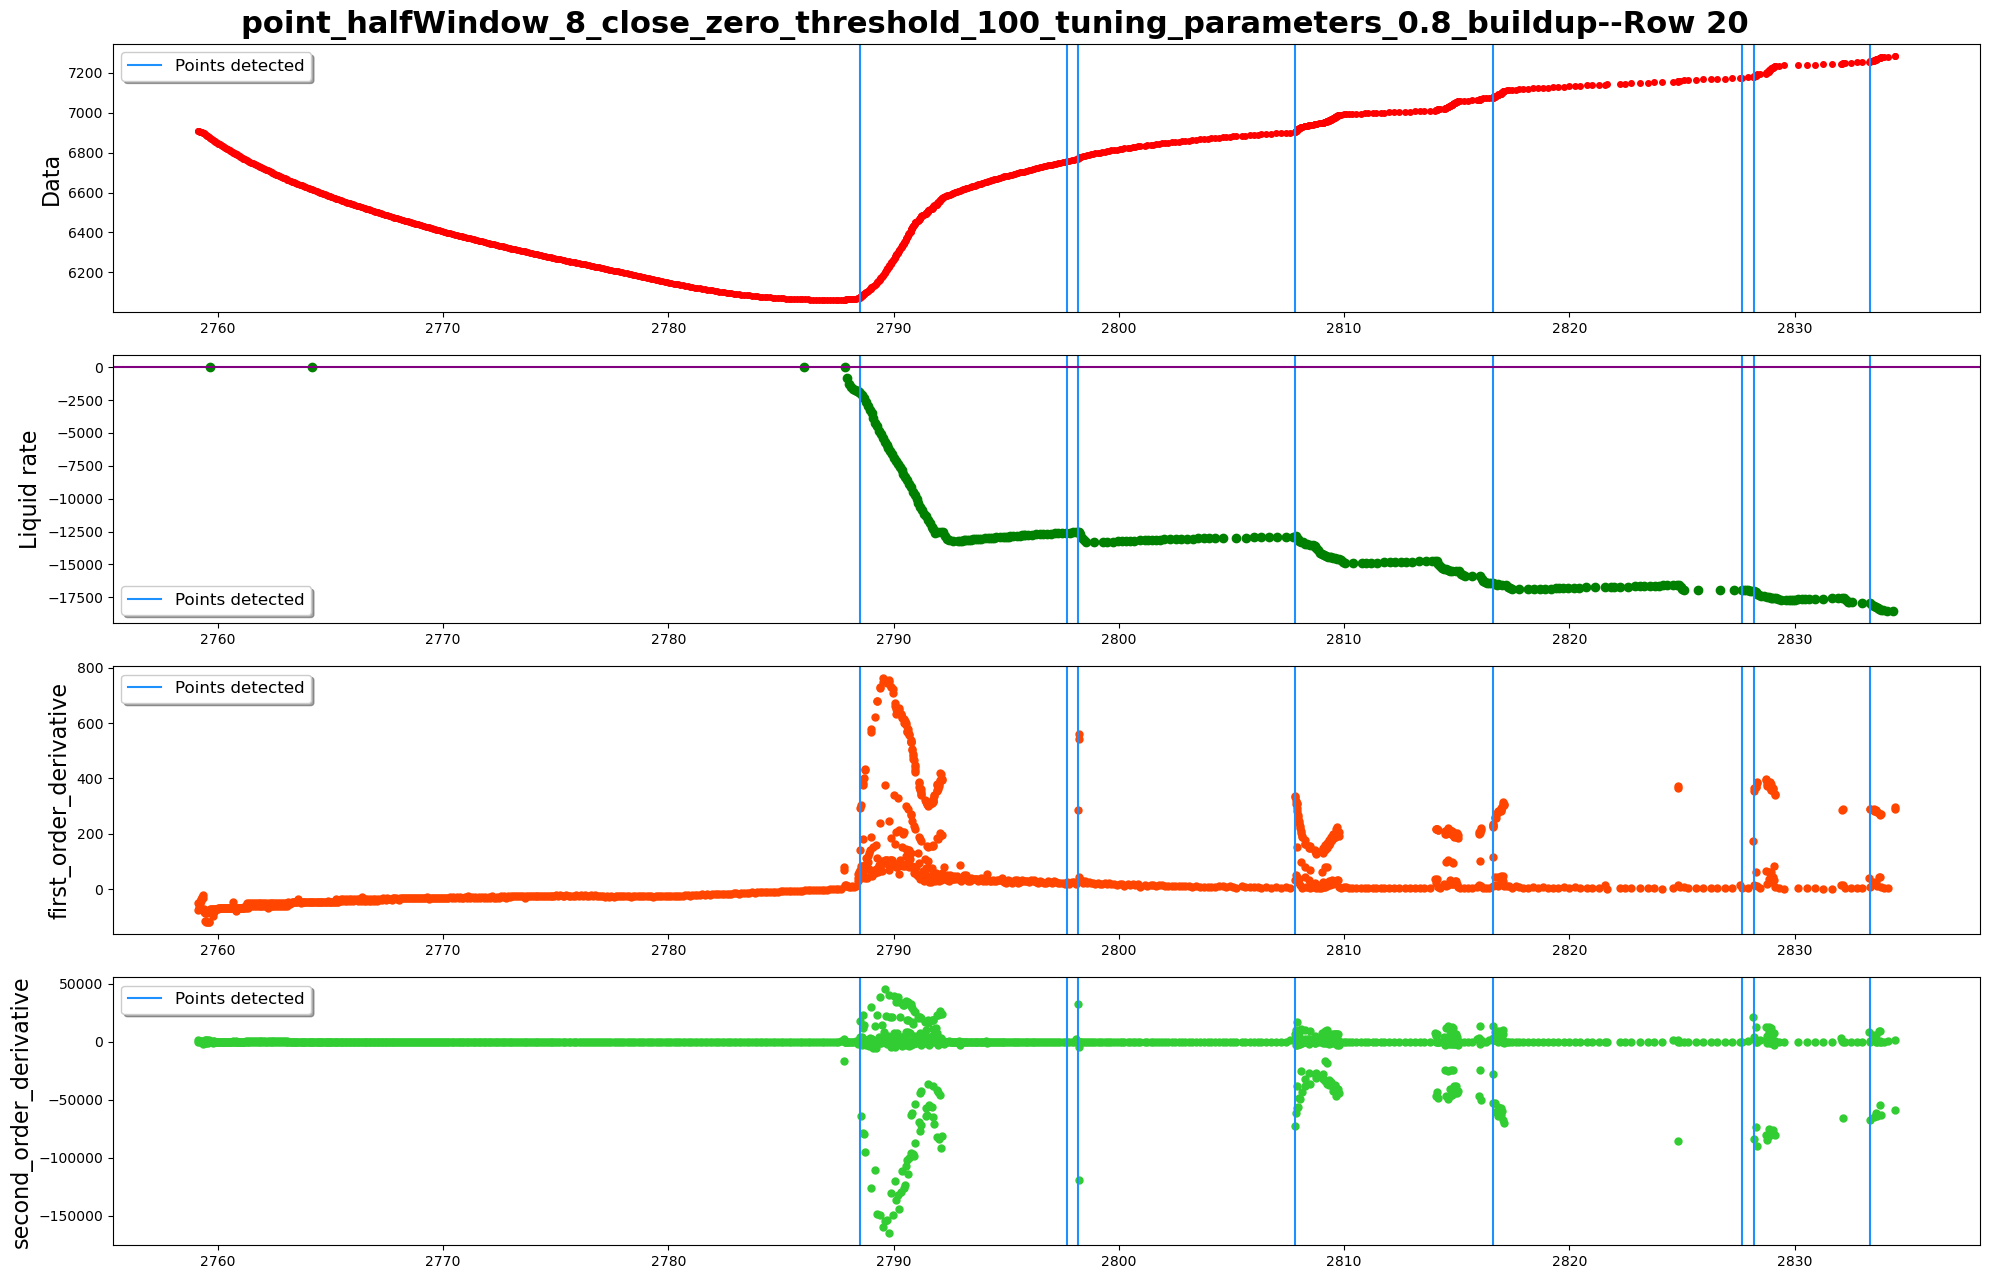

------row 21-----detected points:[24066, 24071, 24120, 24121, 24123, 24687, 24876, 25194, 25197]


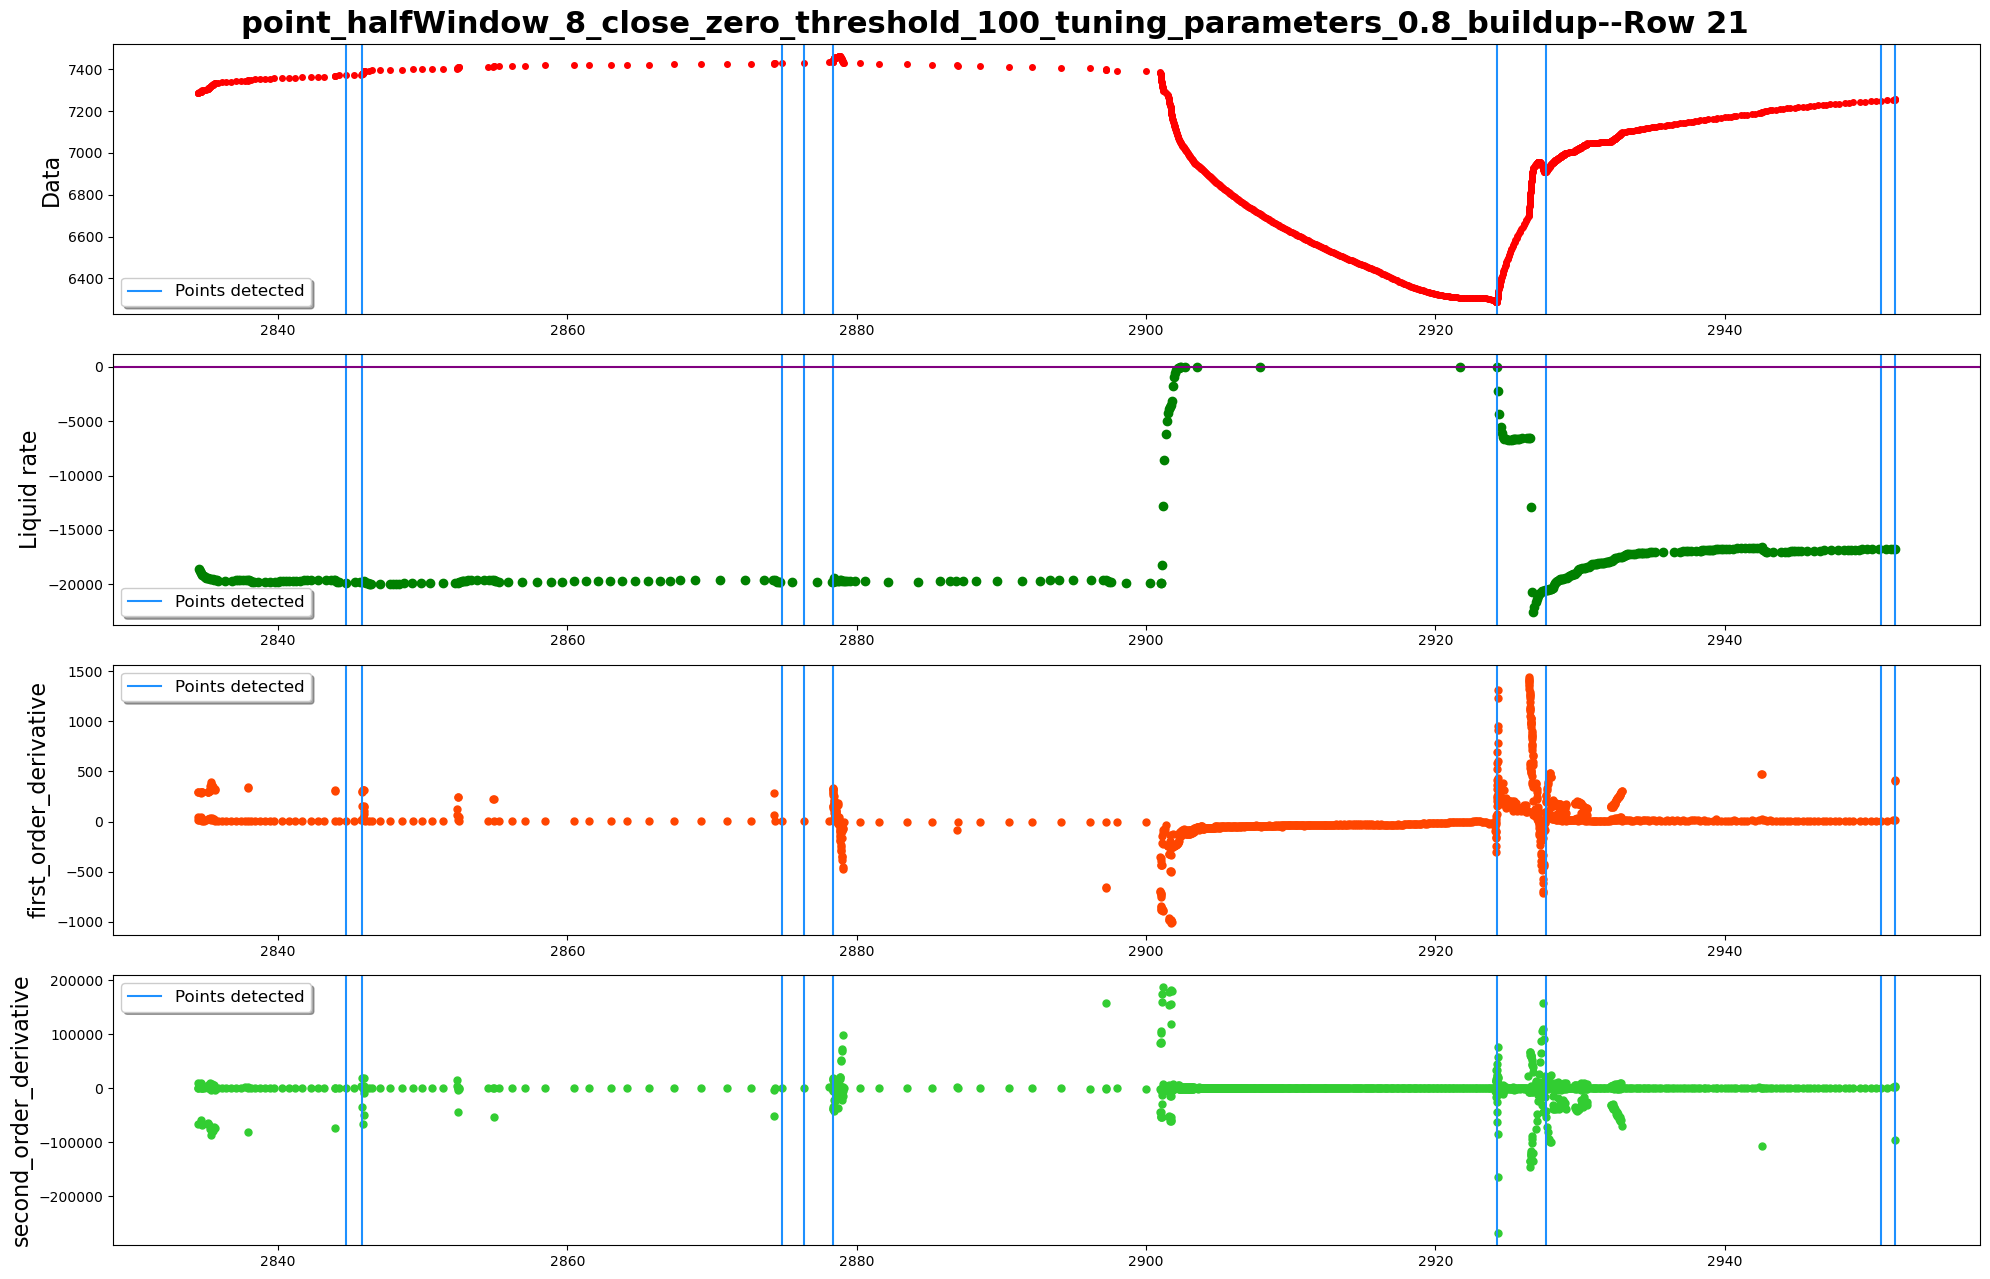

------row 22-----detected points:[25253, 25272, 26005, 26123, 26159, 26179, 26205]


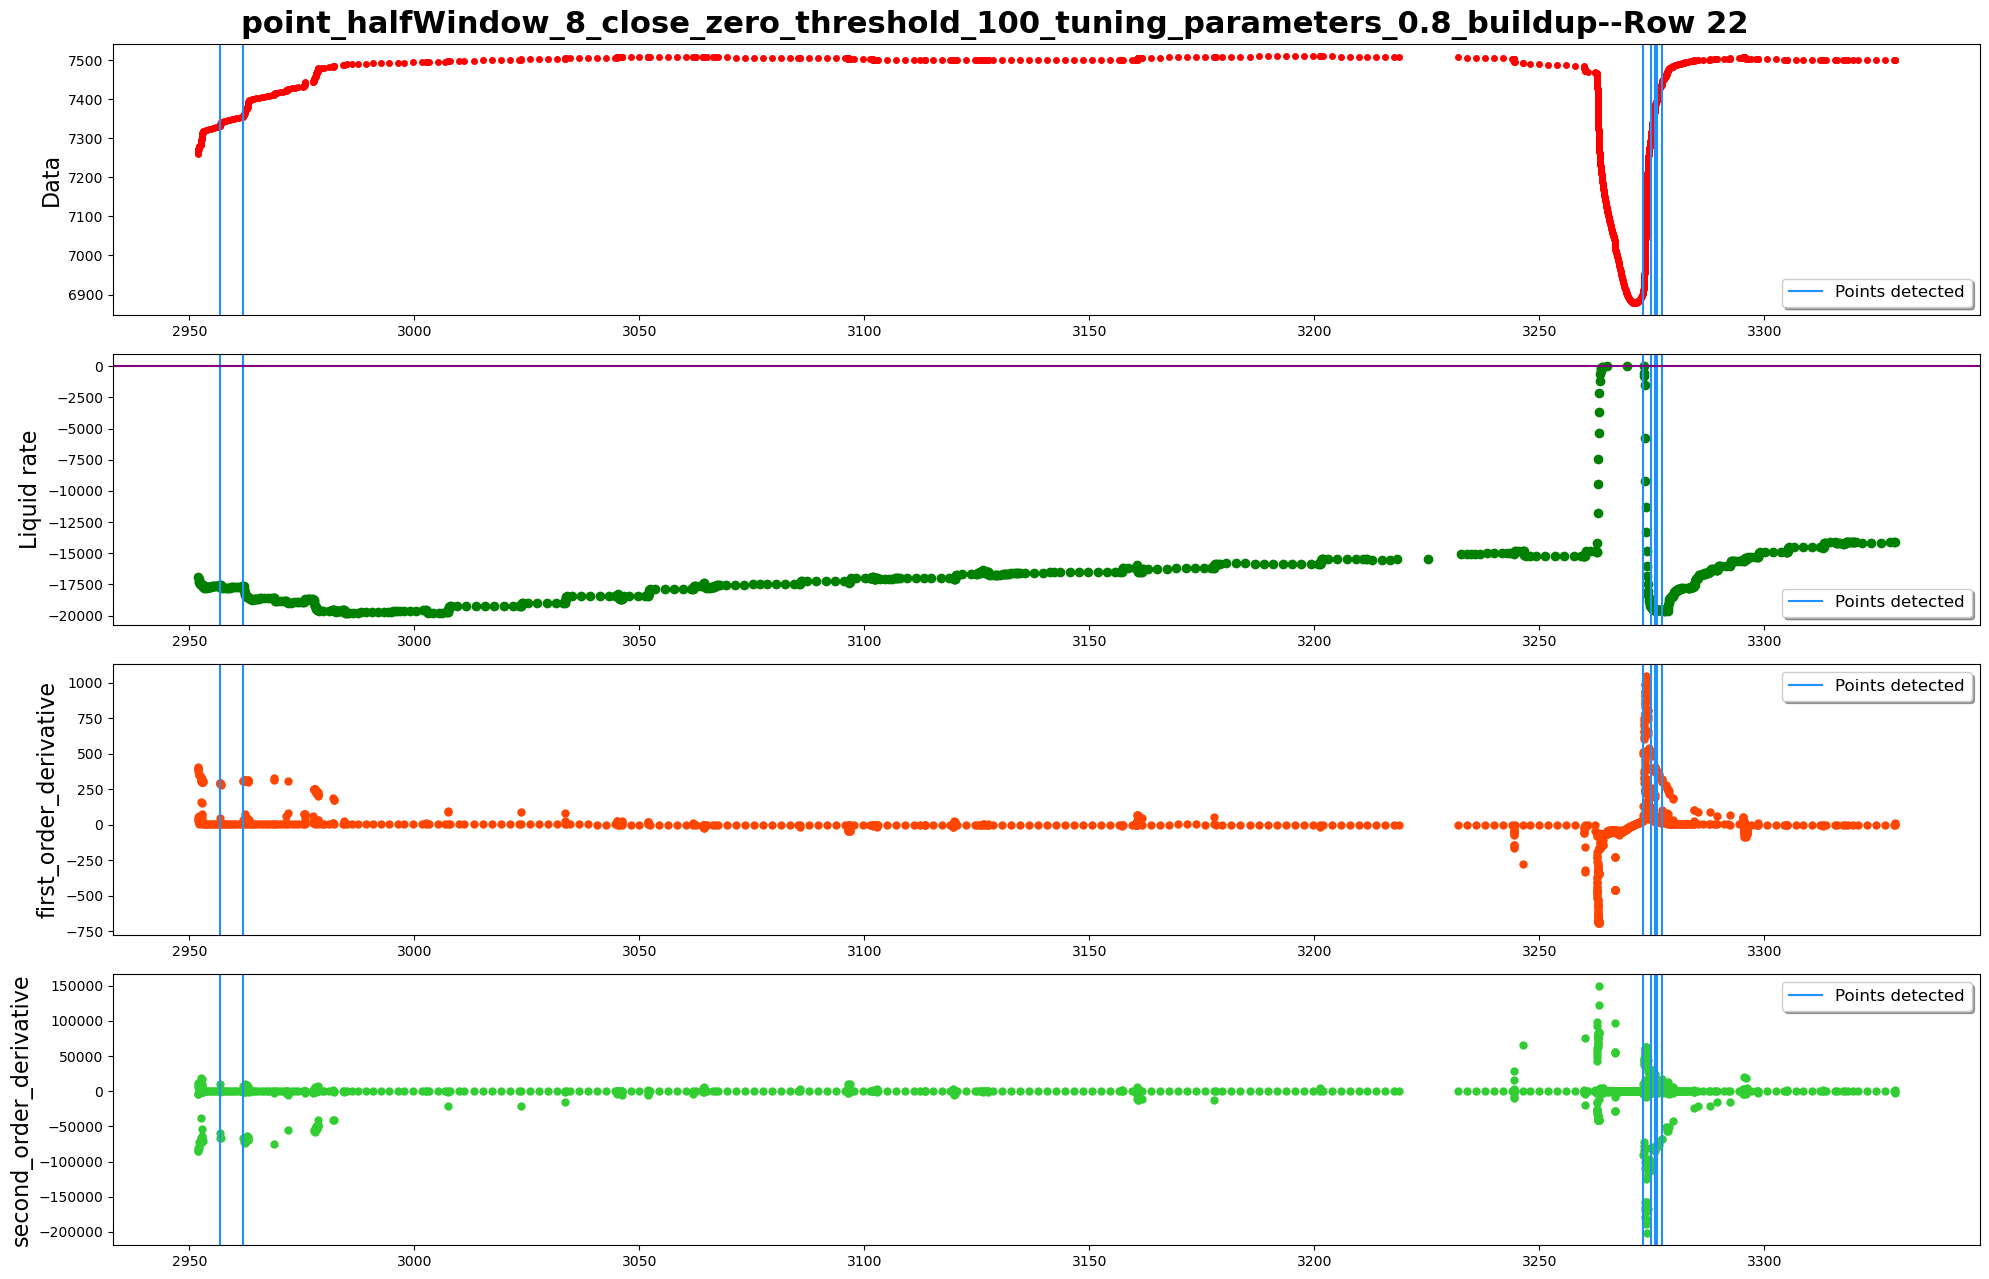

------row 23-----detected points:[26500, 26501, 26502, 26504, 26811, 26831, 26868, 26870, 26872]


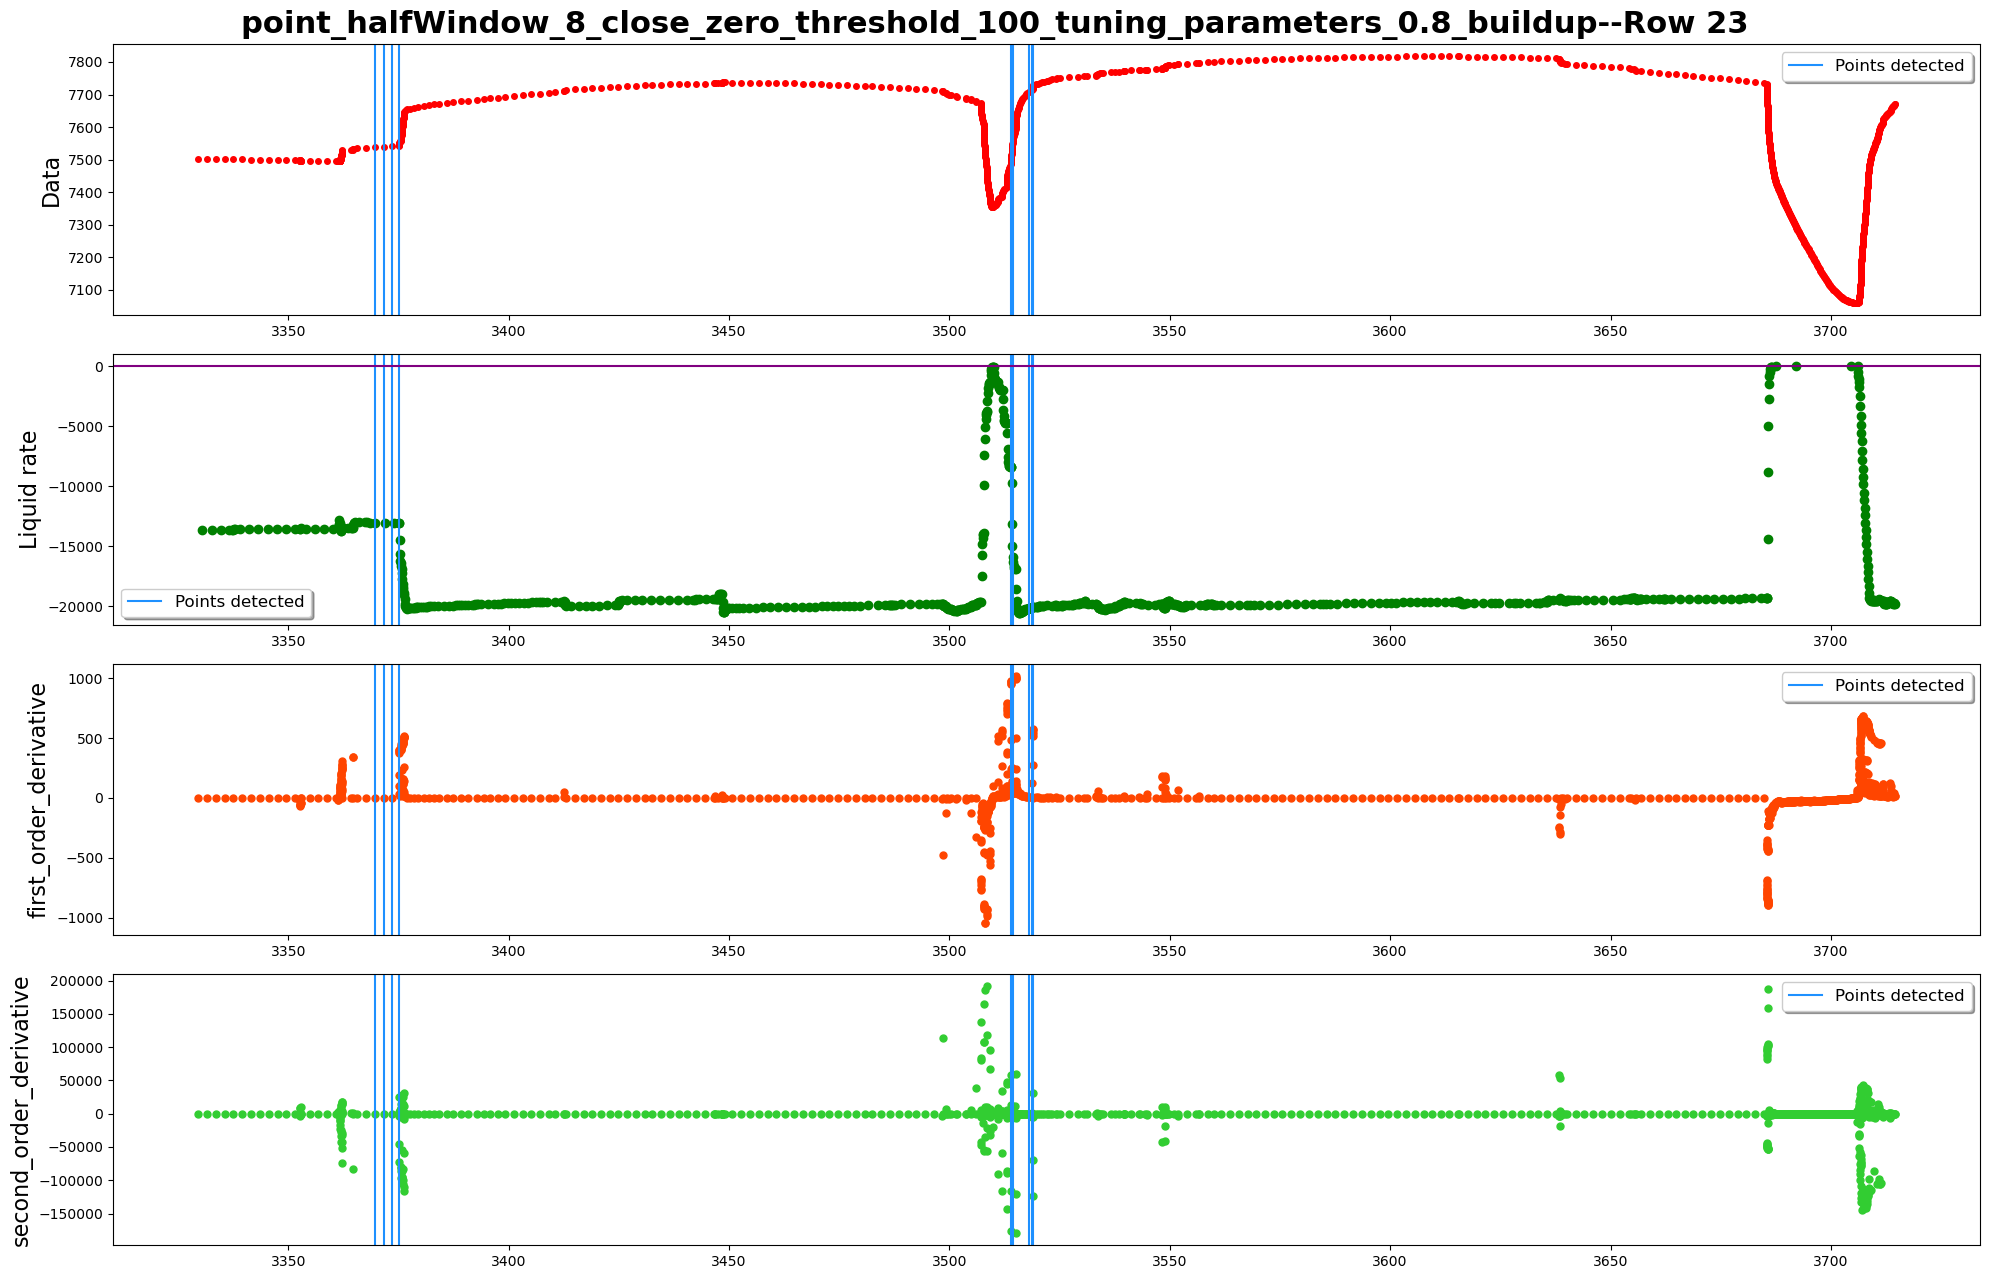

------row 24-----detected points:[28141, 28228]


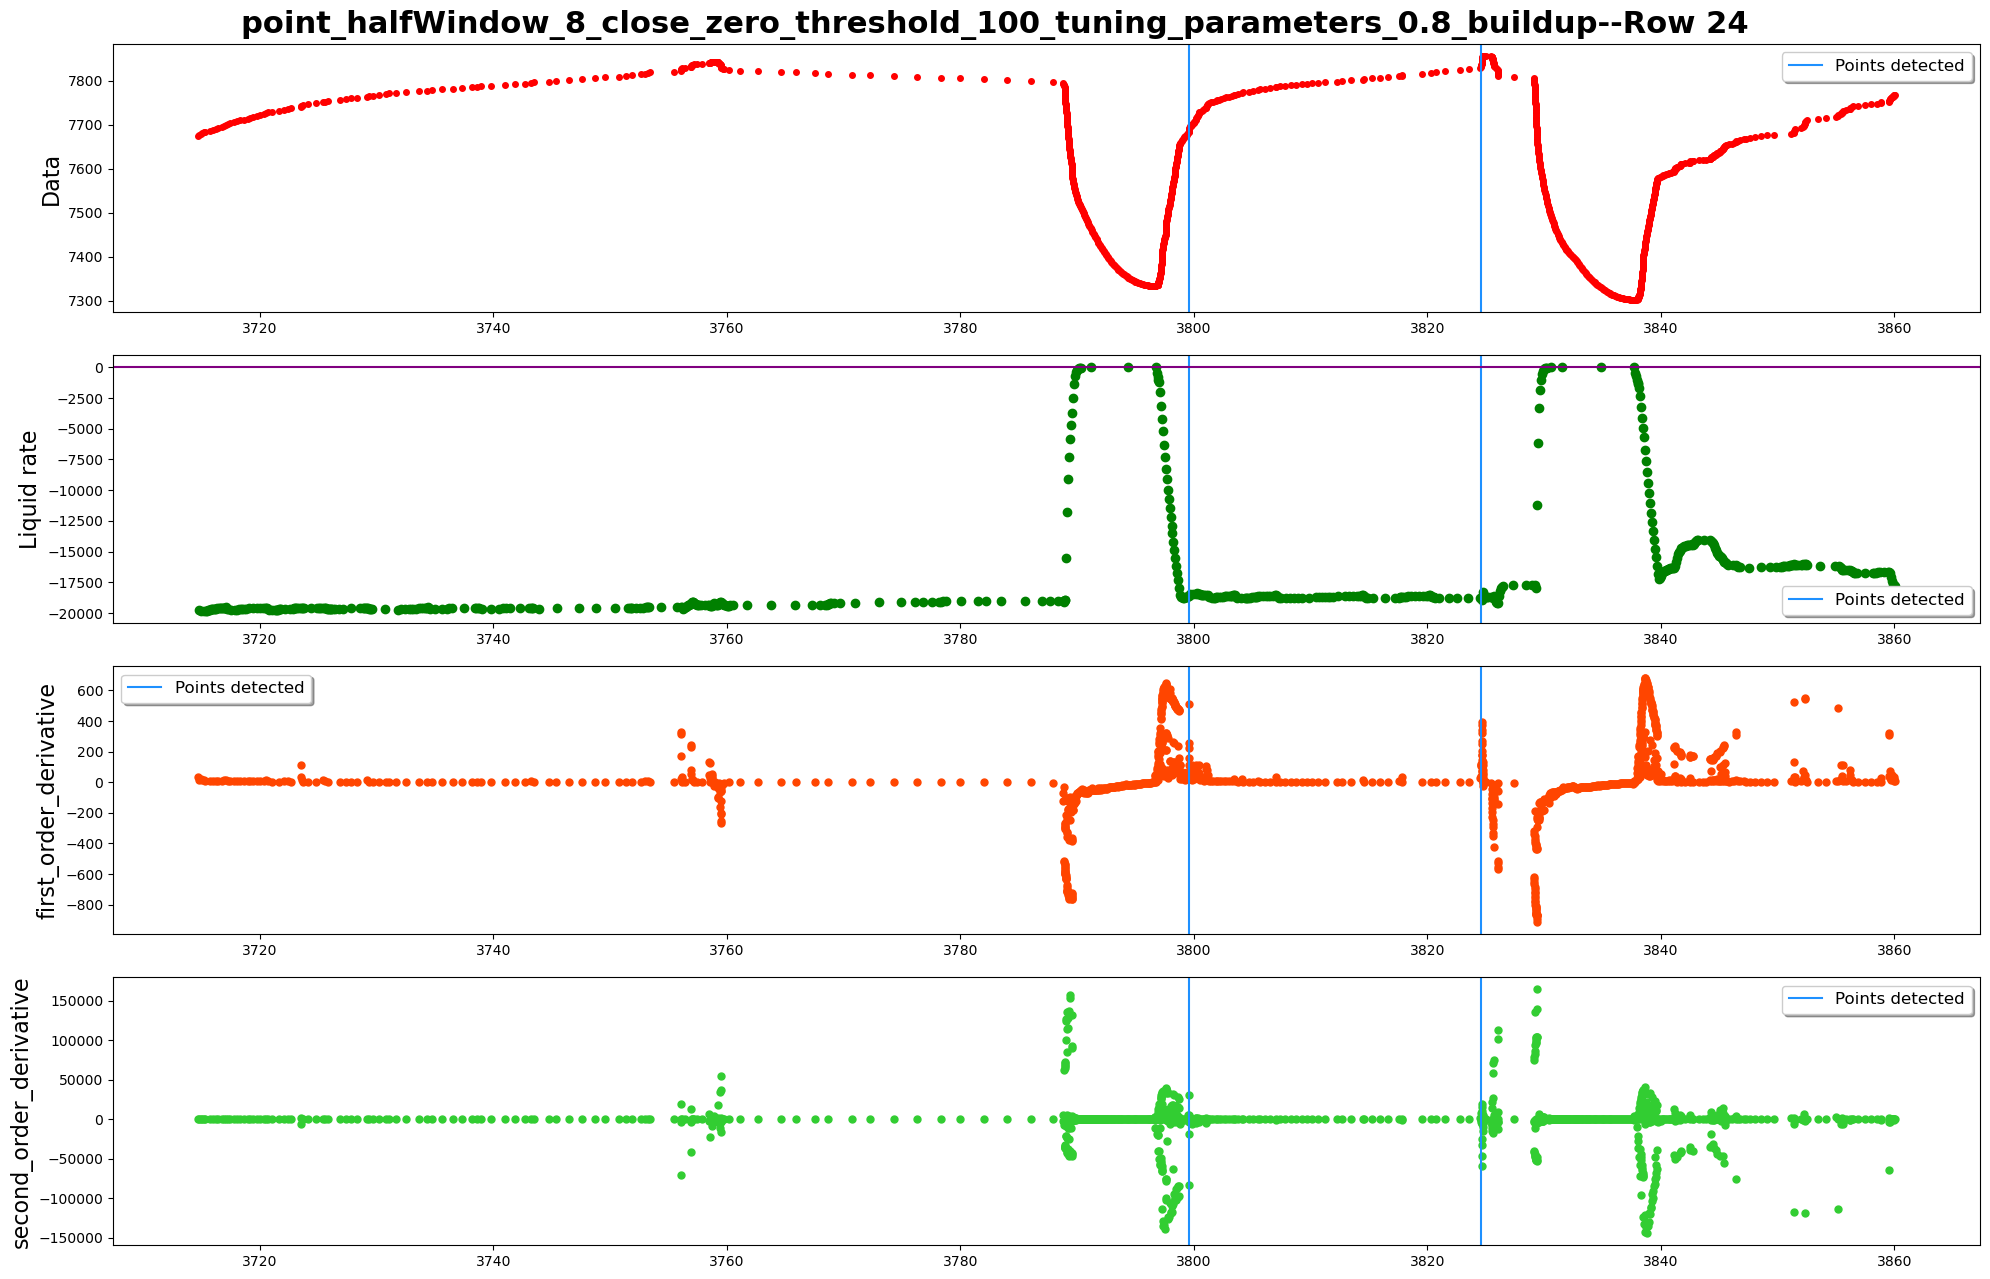

------row 25-----detected points:[29115, 29163, 29297, 29301, 29480, 29482]


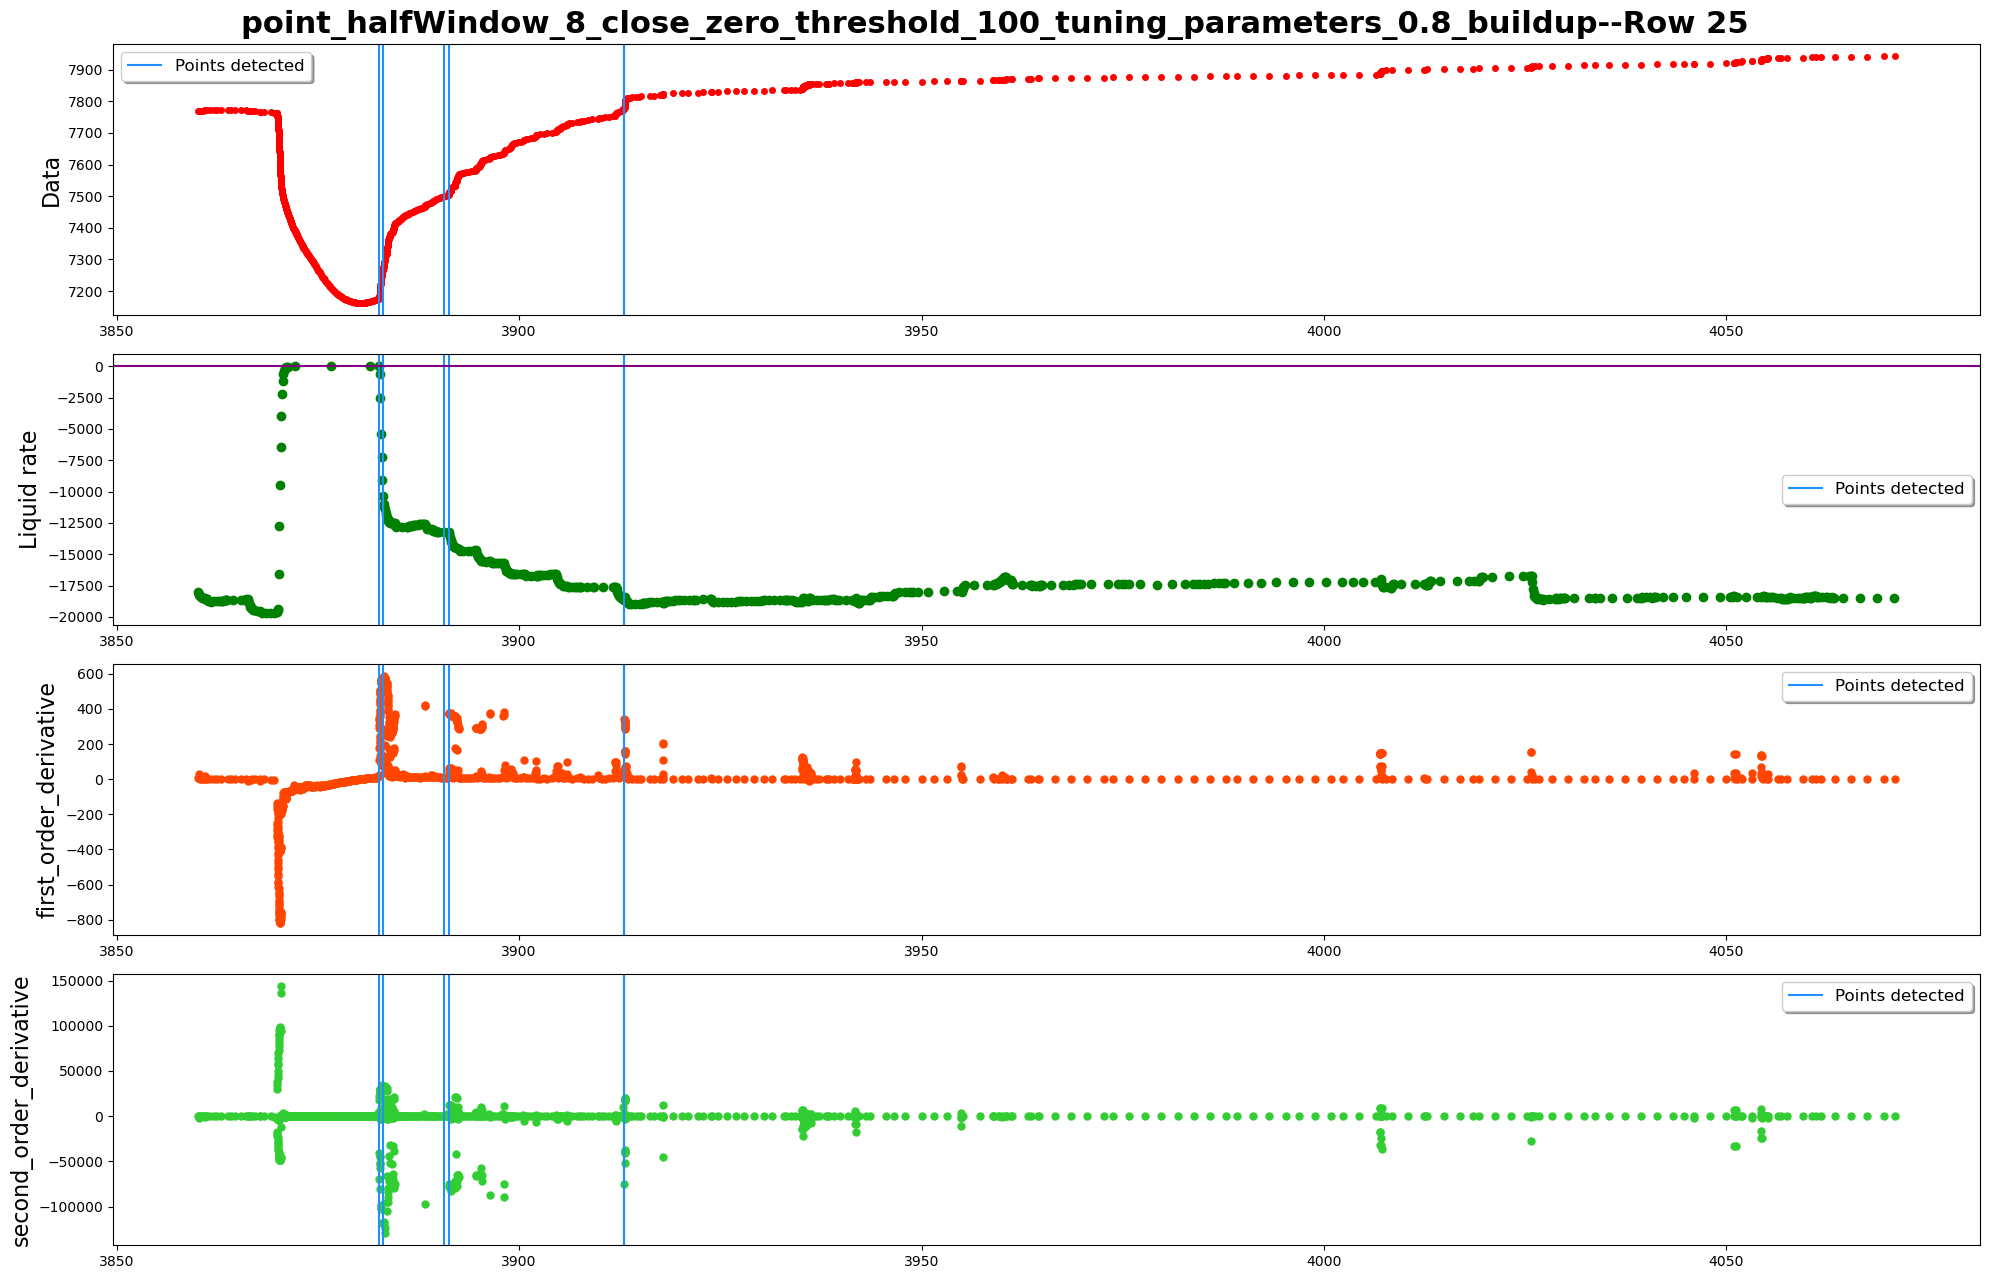

---initializing...
---plotting...


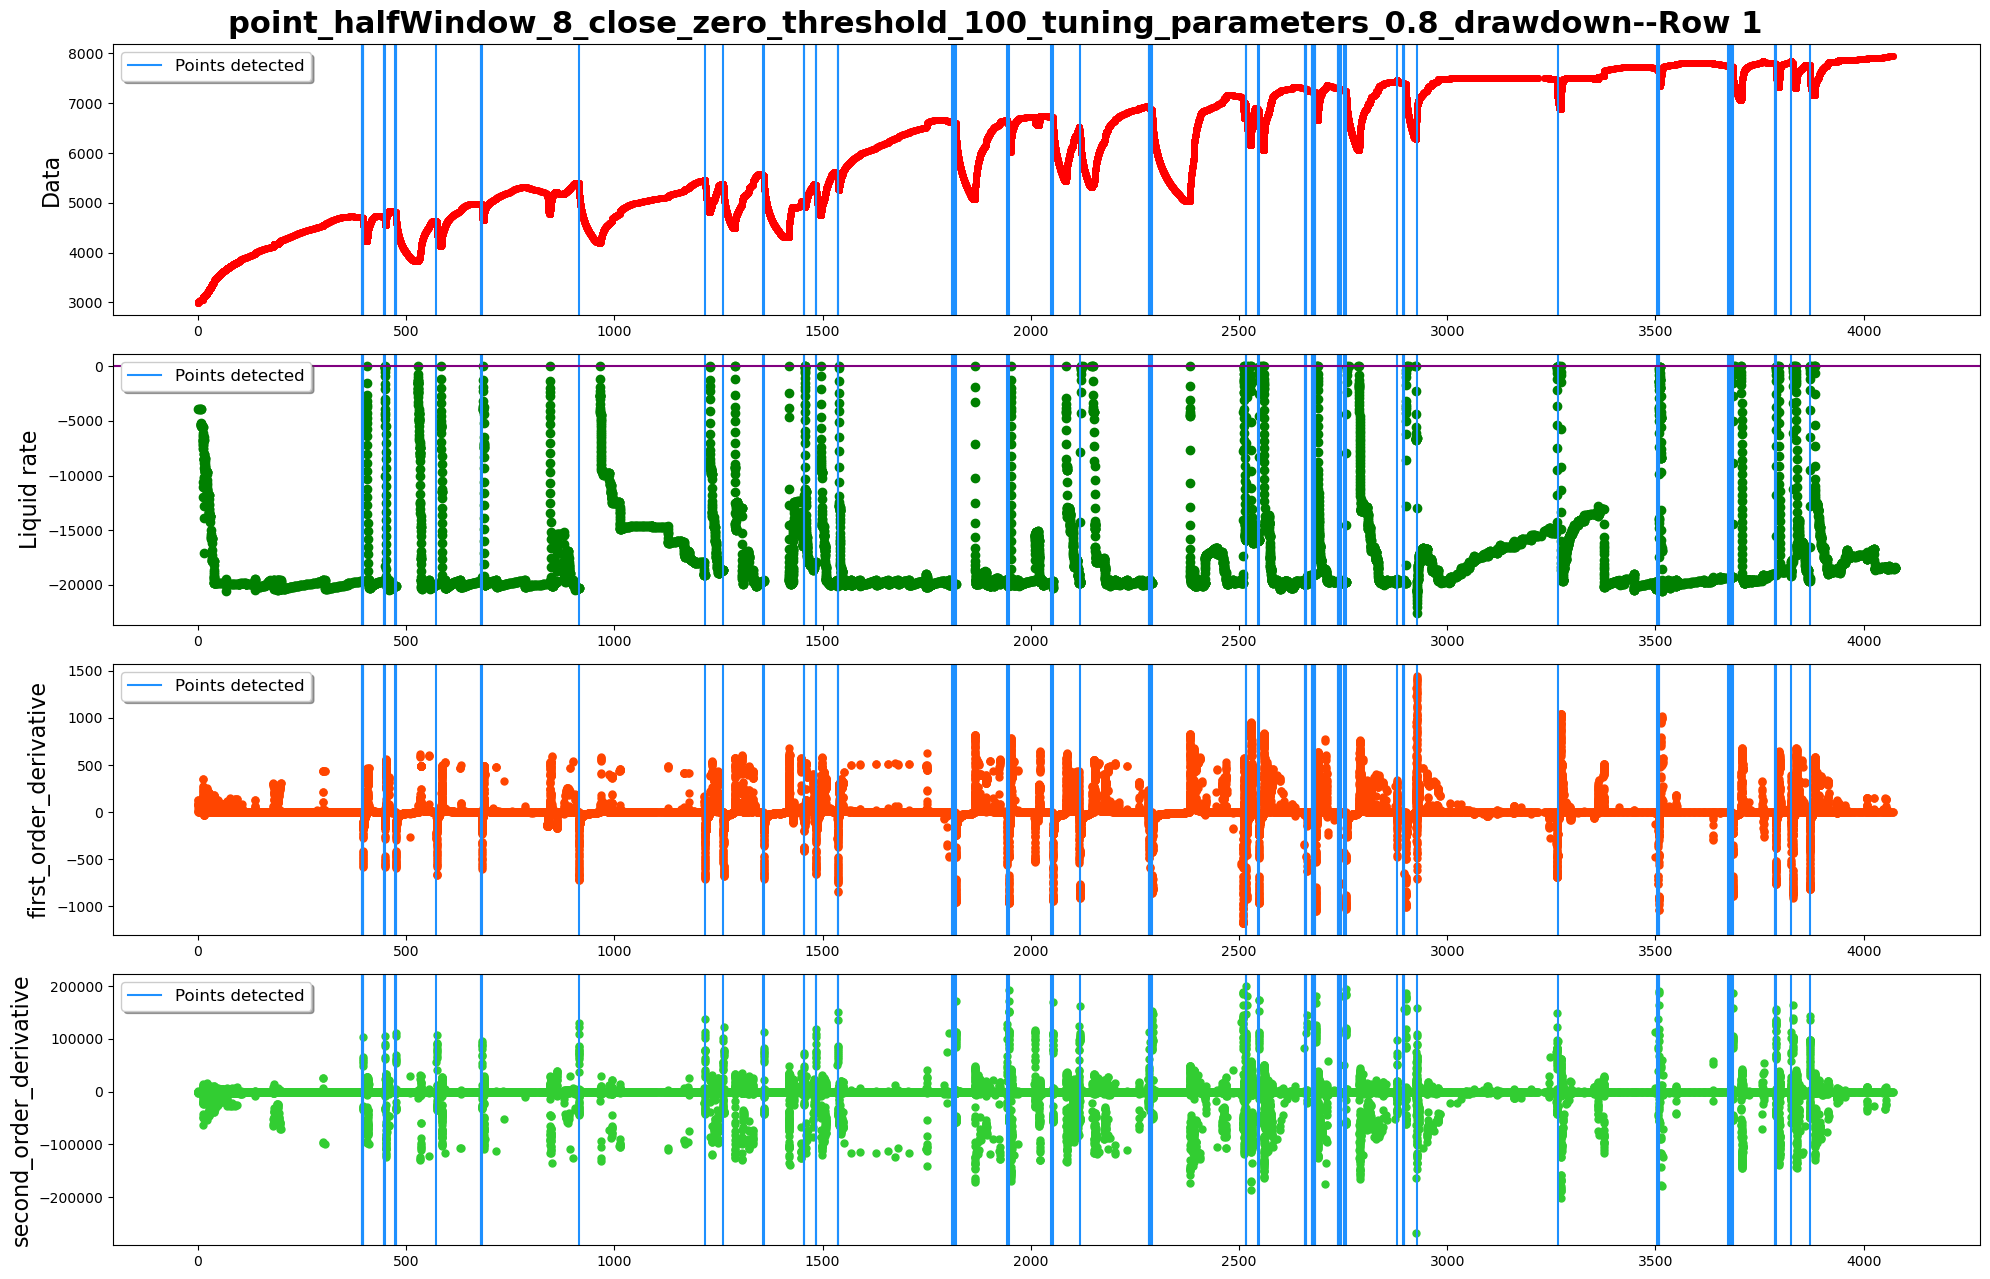

save whole....
detected 88 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


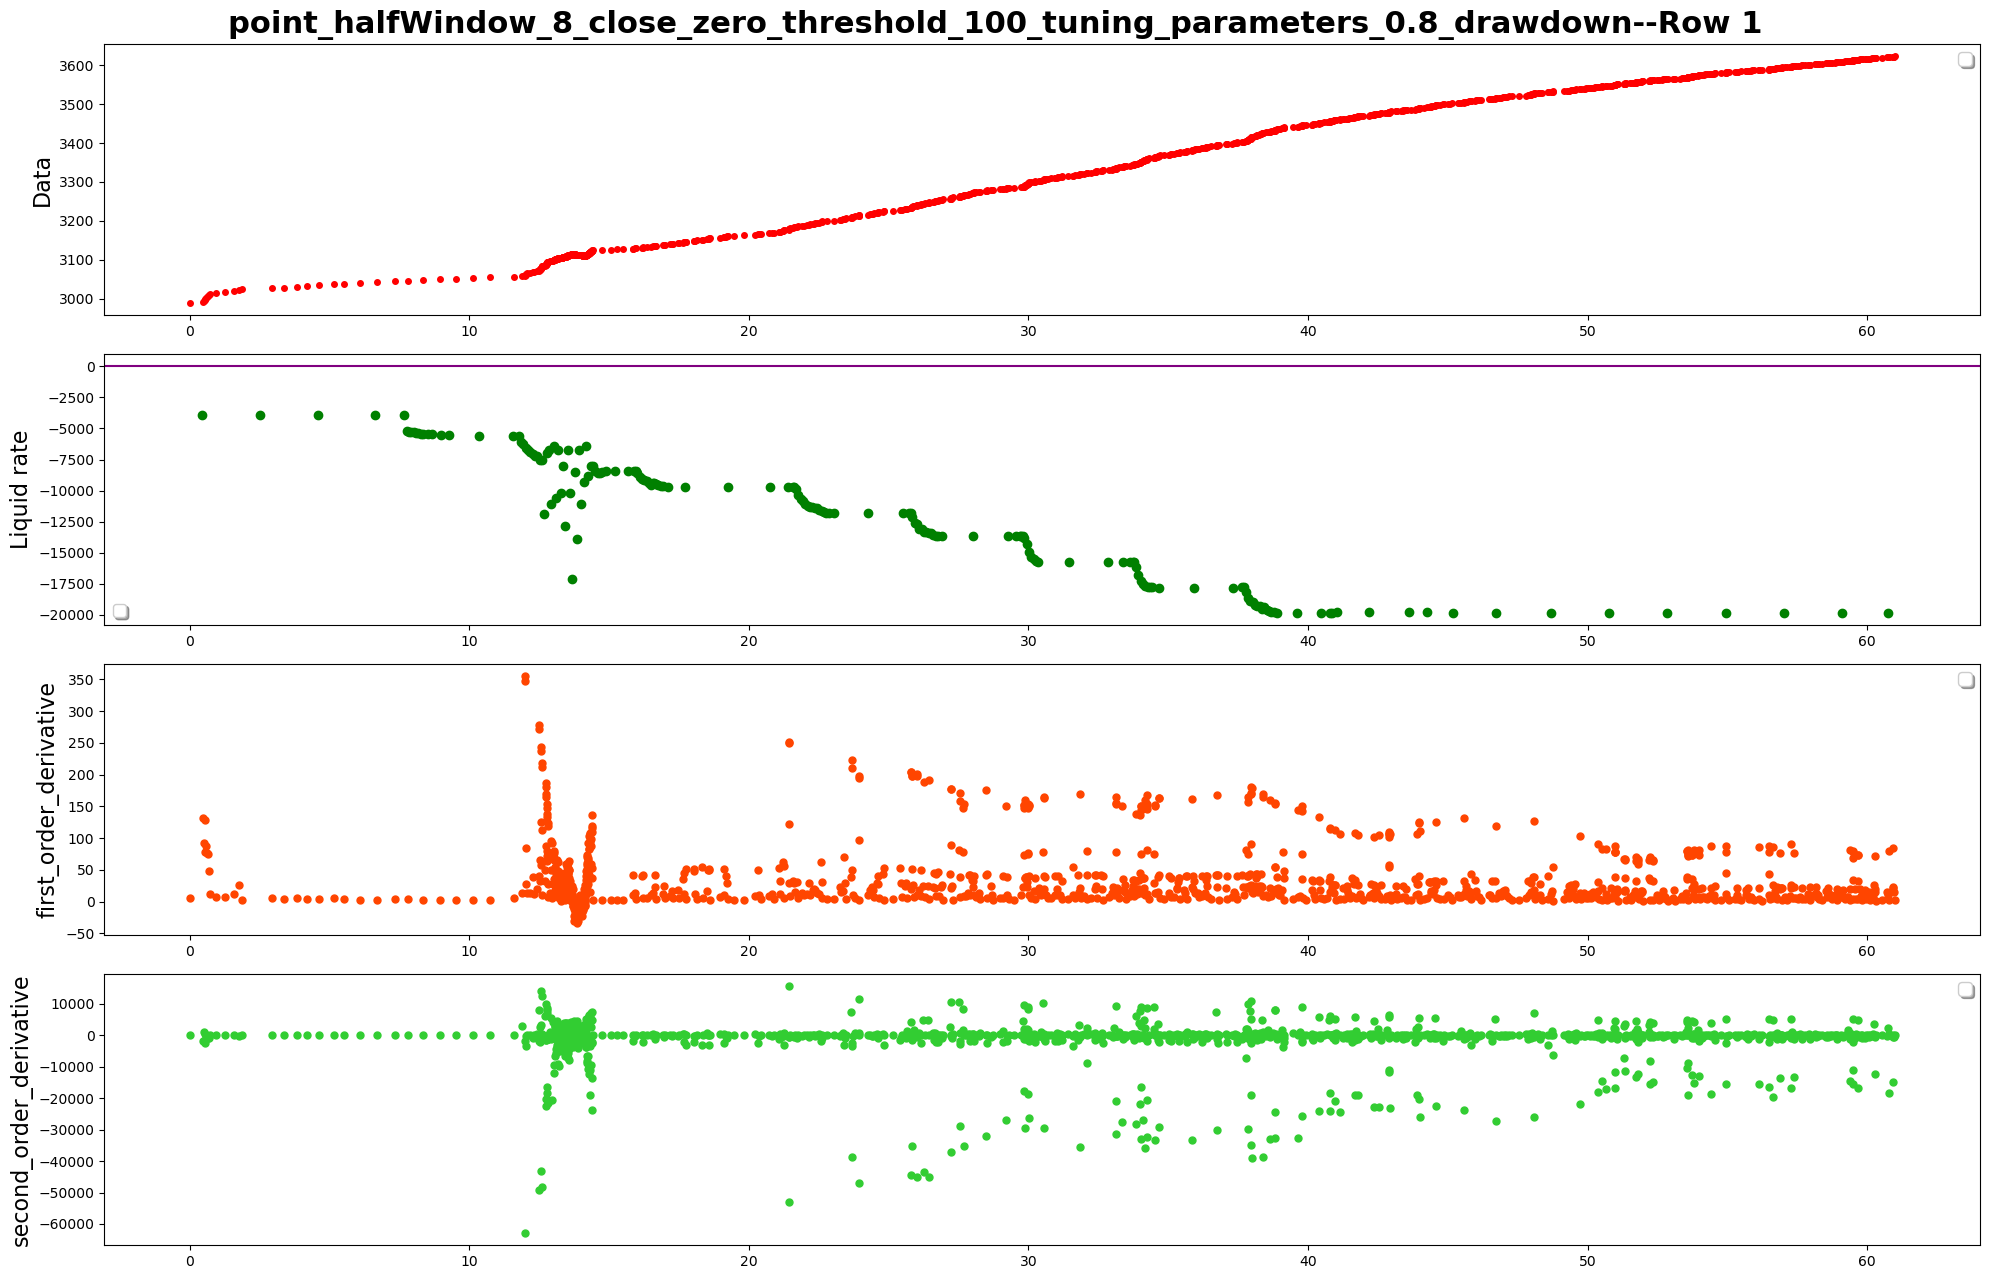

------row 2-----detected points:[2244, 2246, 2247, 2248]


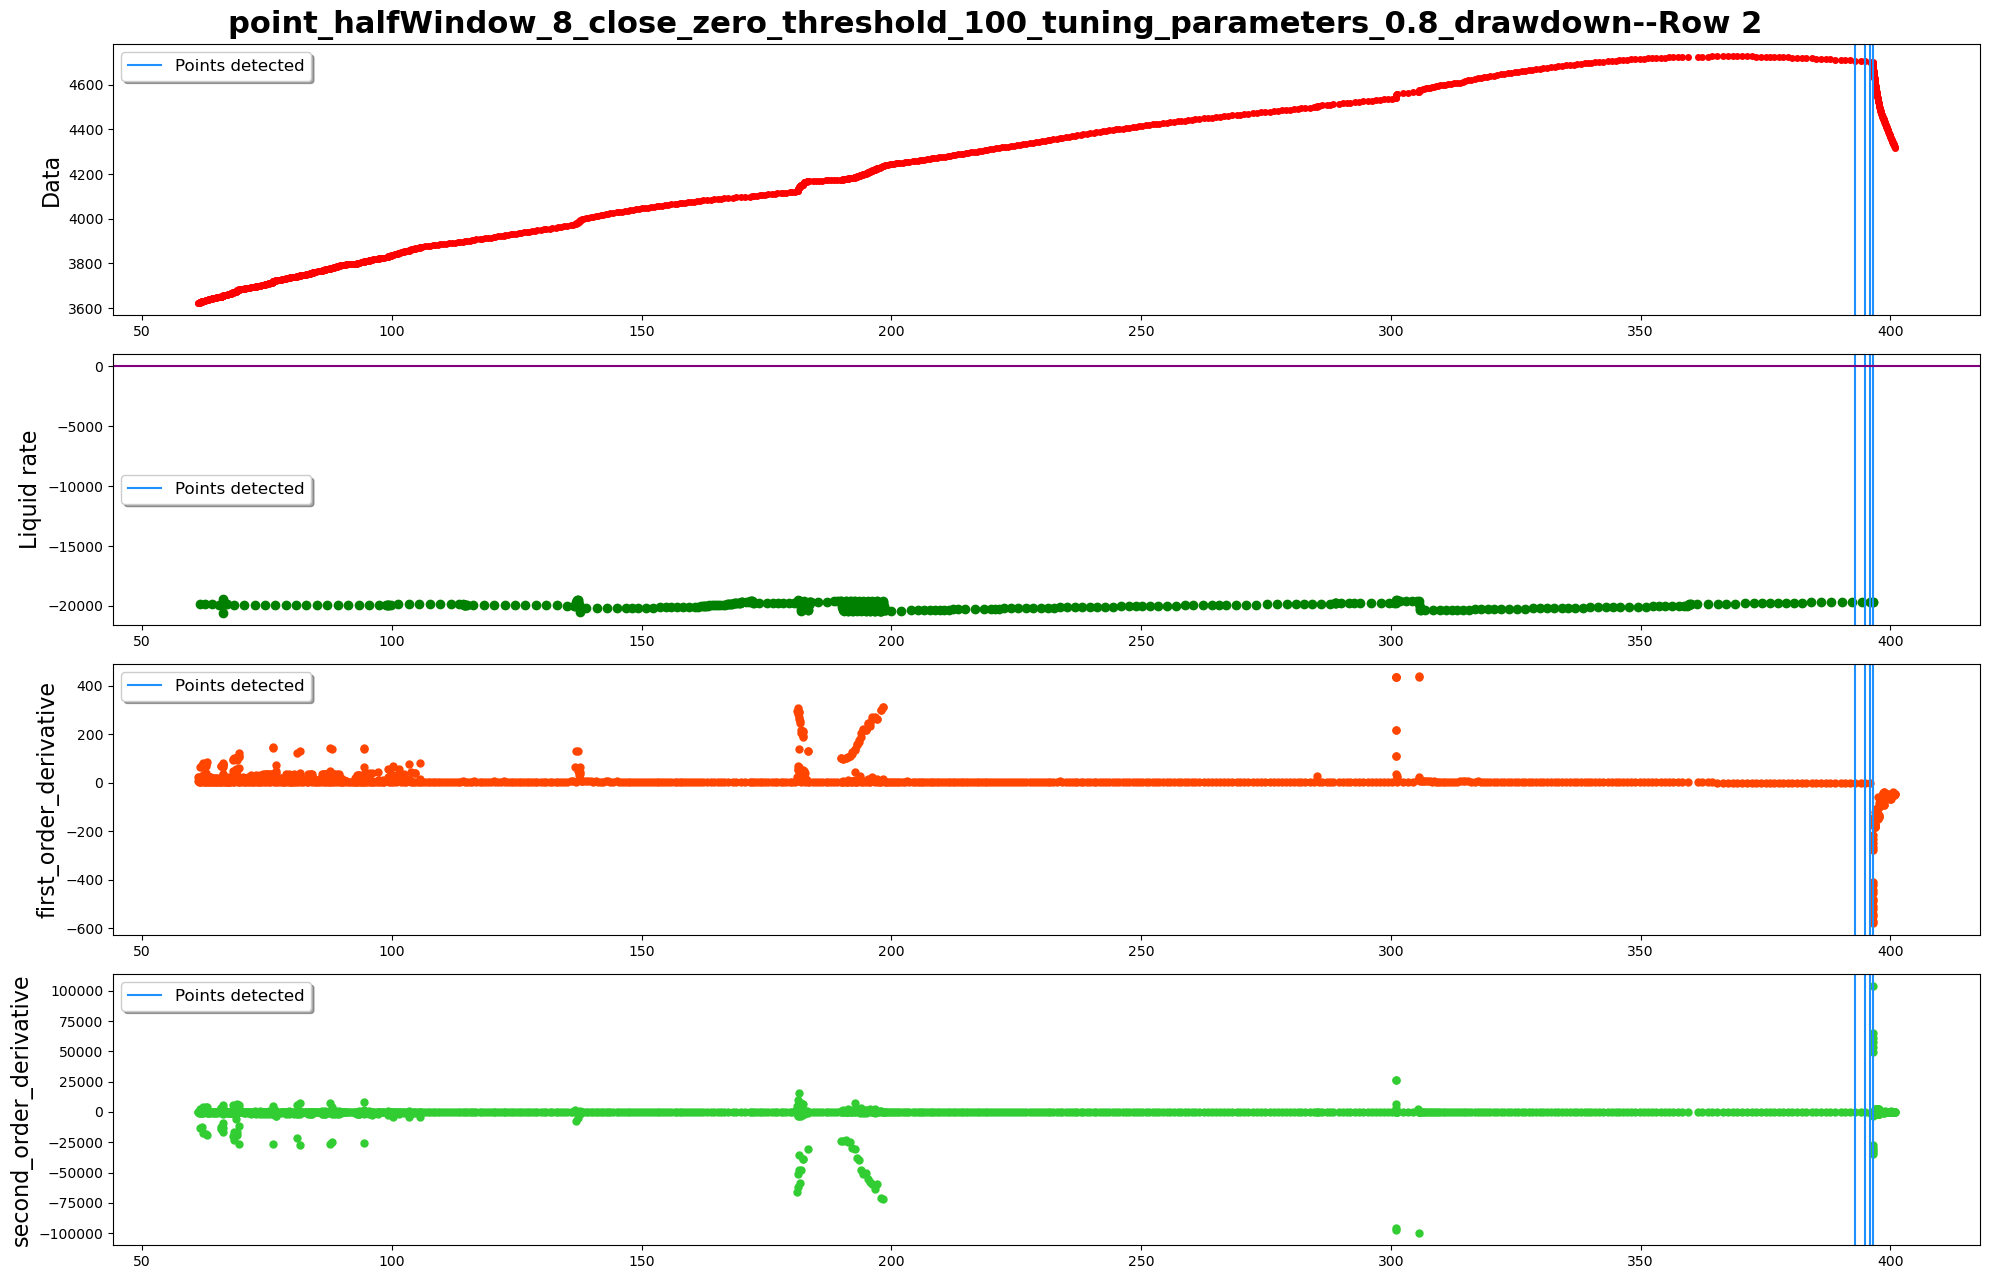

------row 3-----detected points:[2801, 2803, 2804, 3091, 3094, 3095]


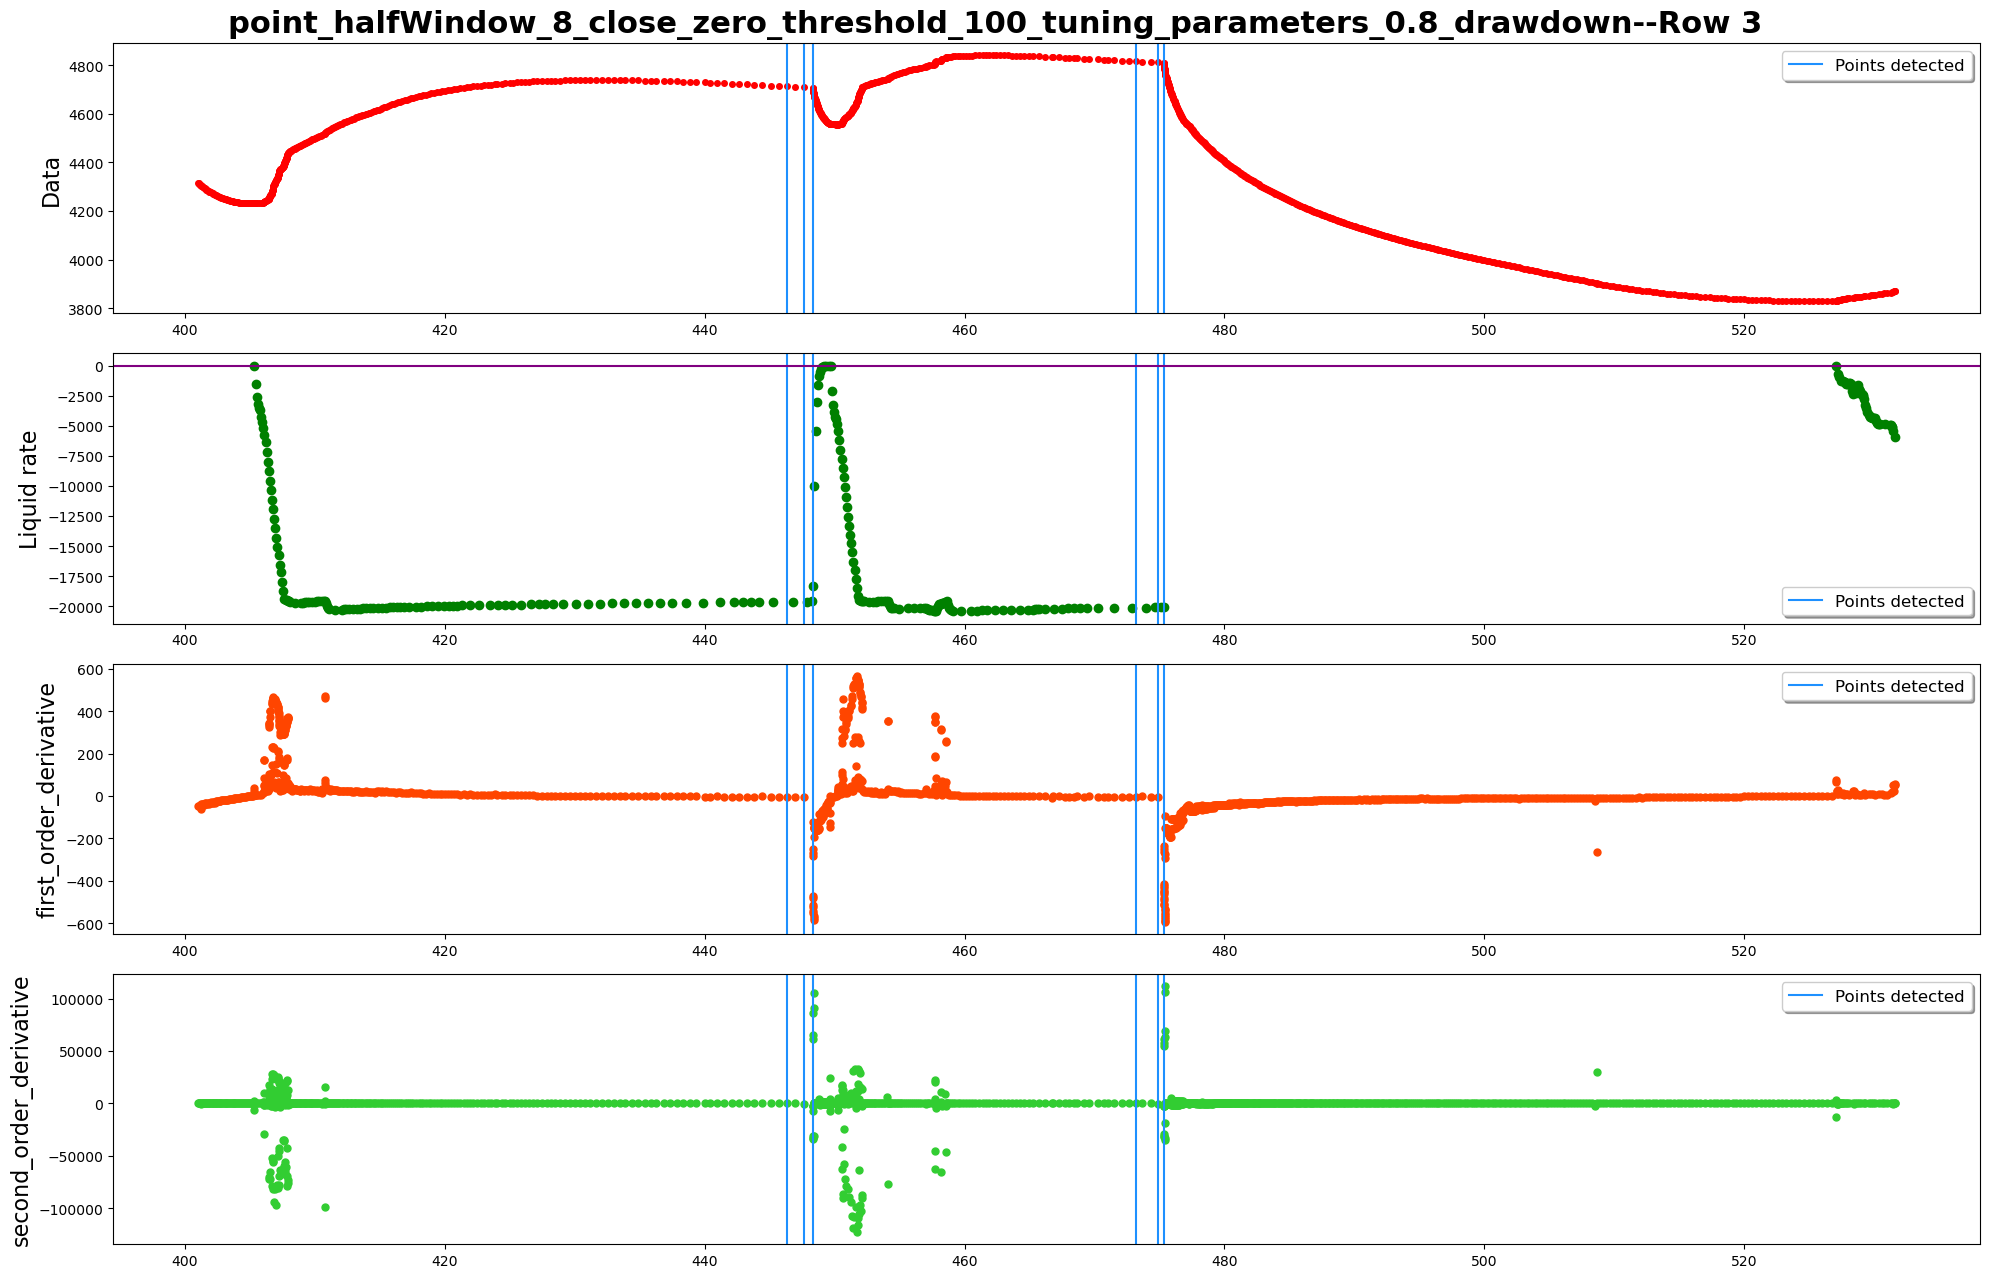

------row 4-----detected points:[3990, 4747, 4748, 4751]


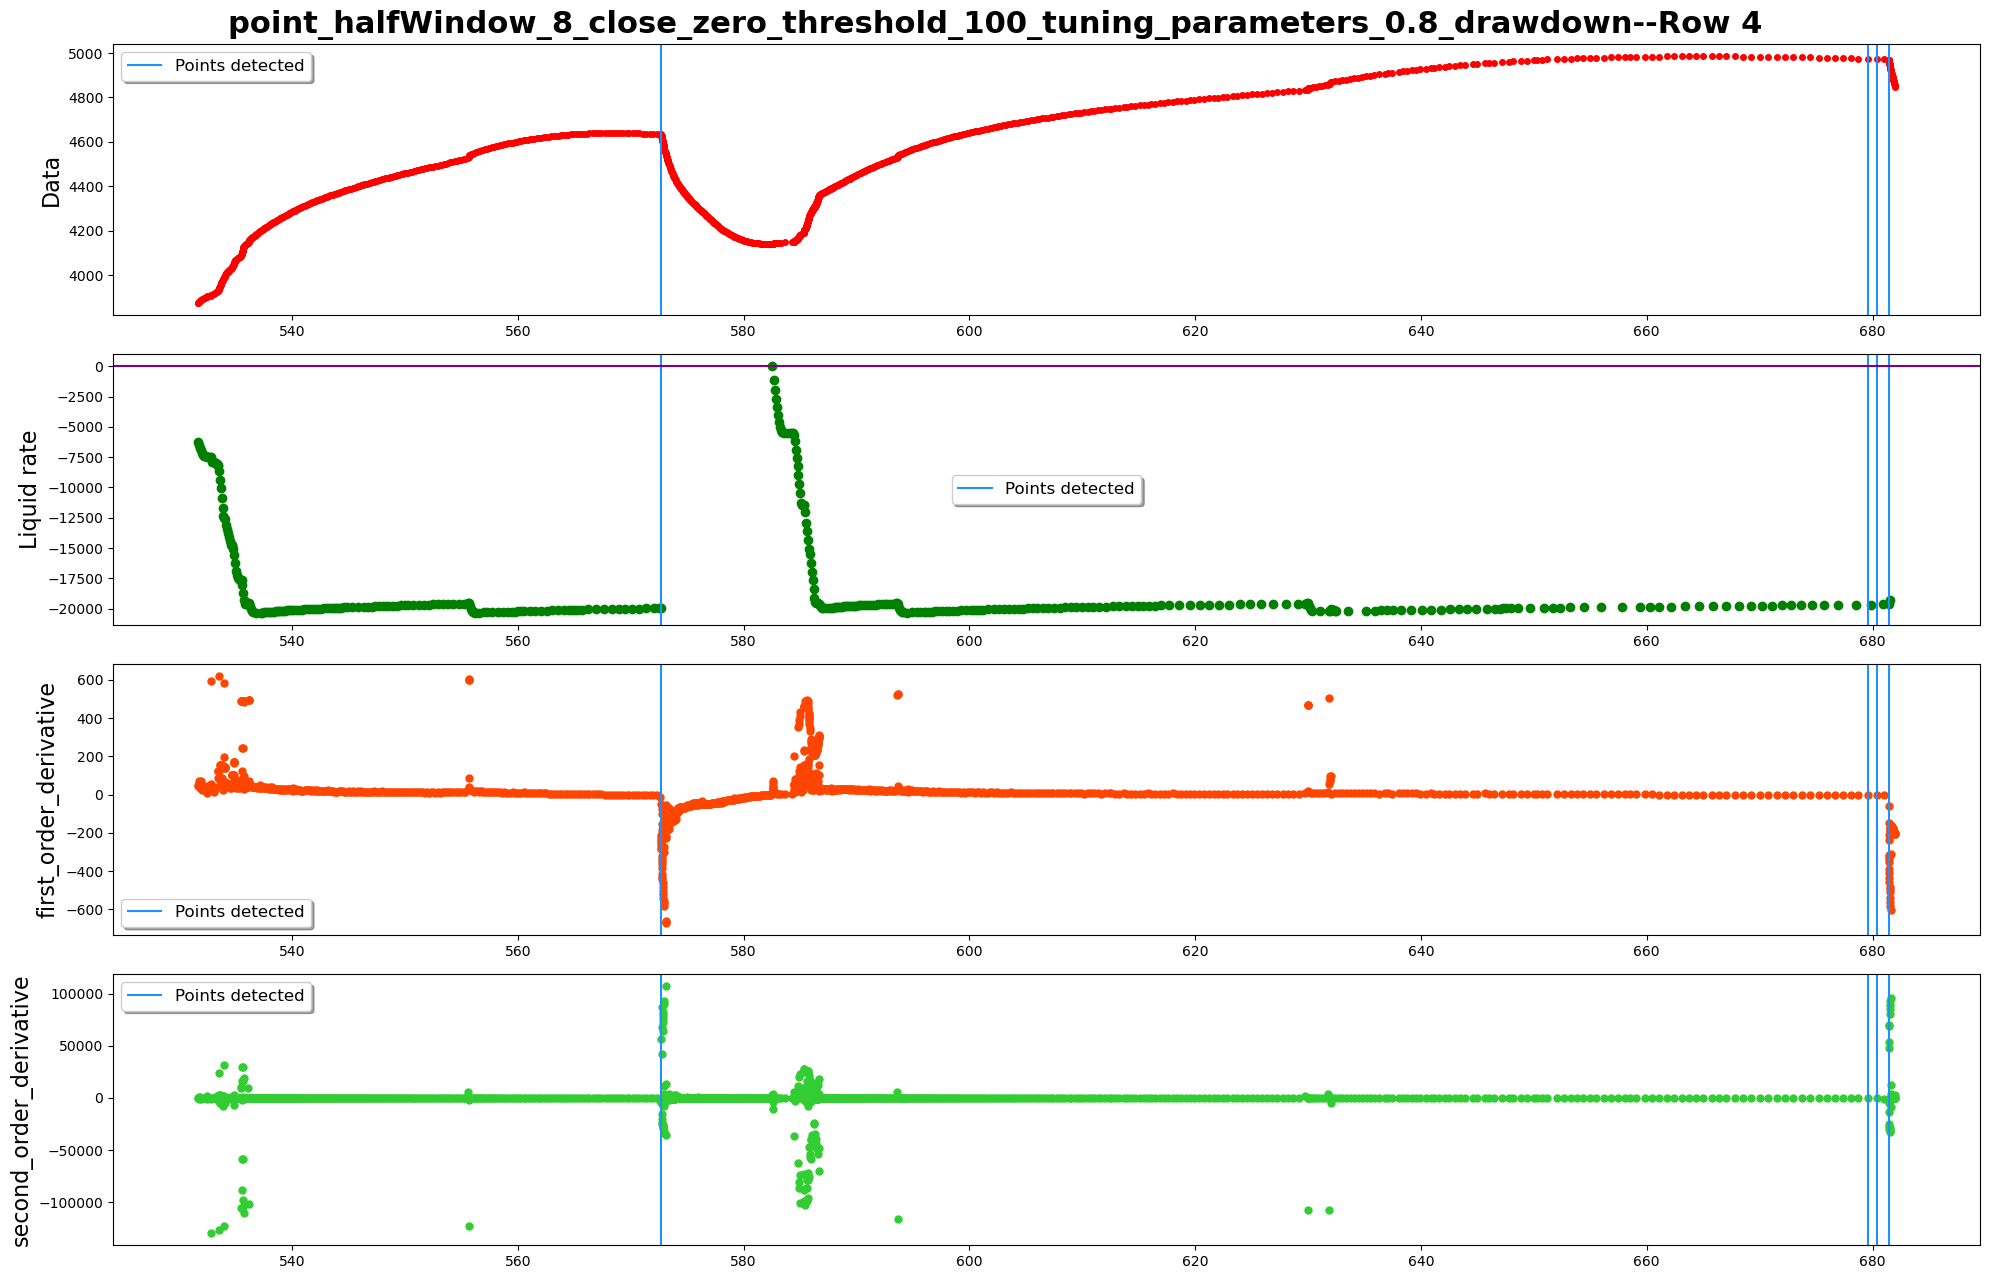

------row 5-----detected points:[5986]


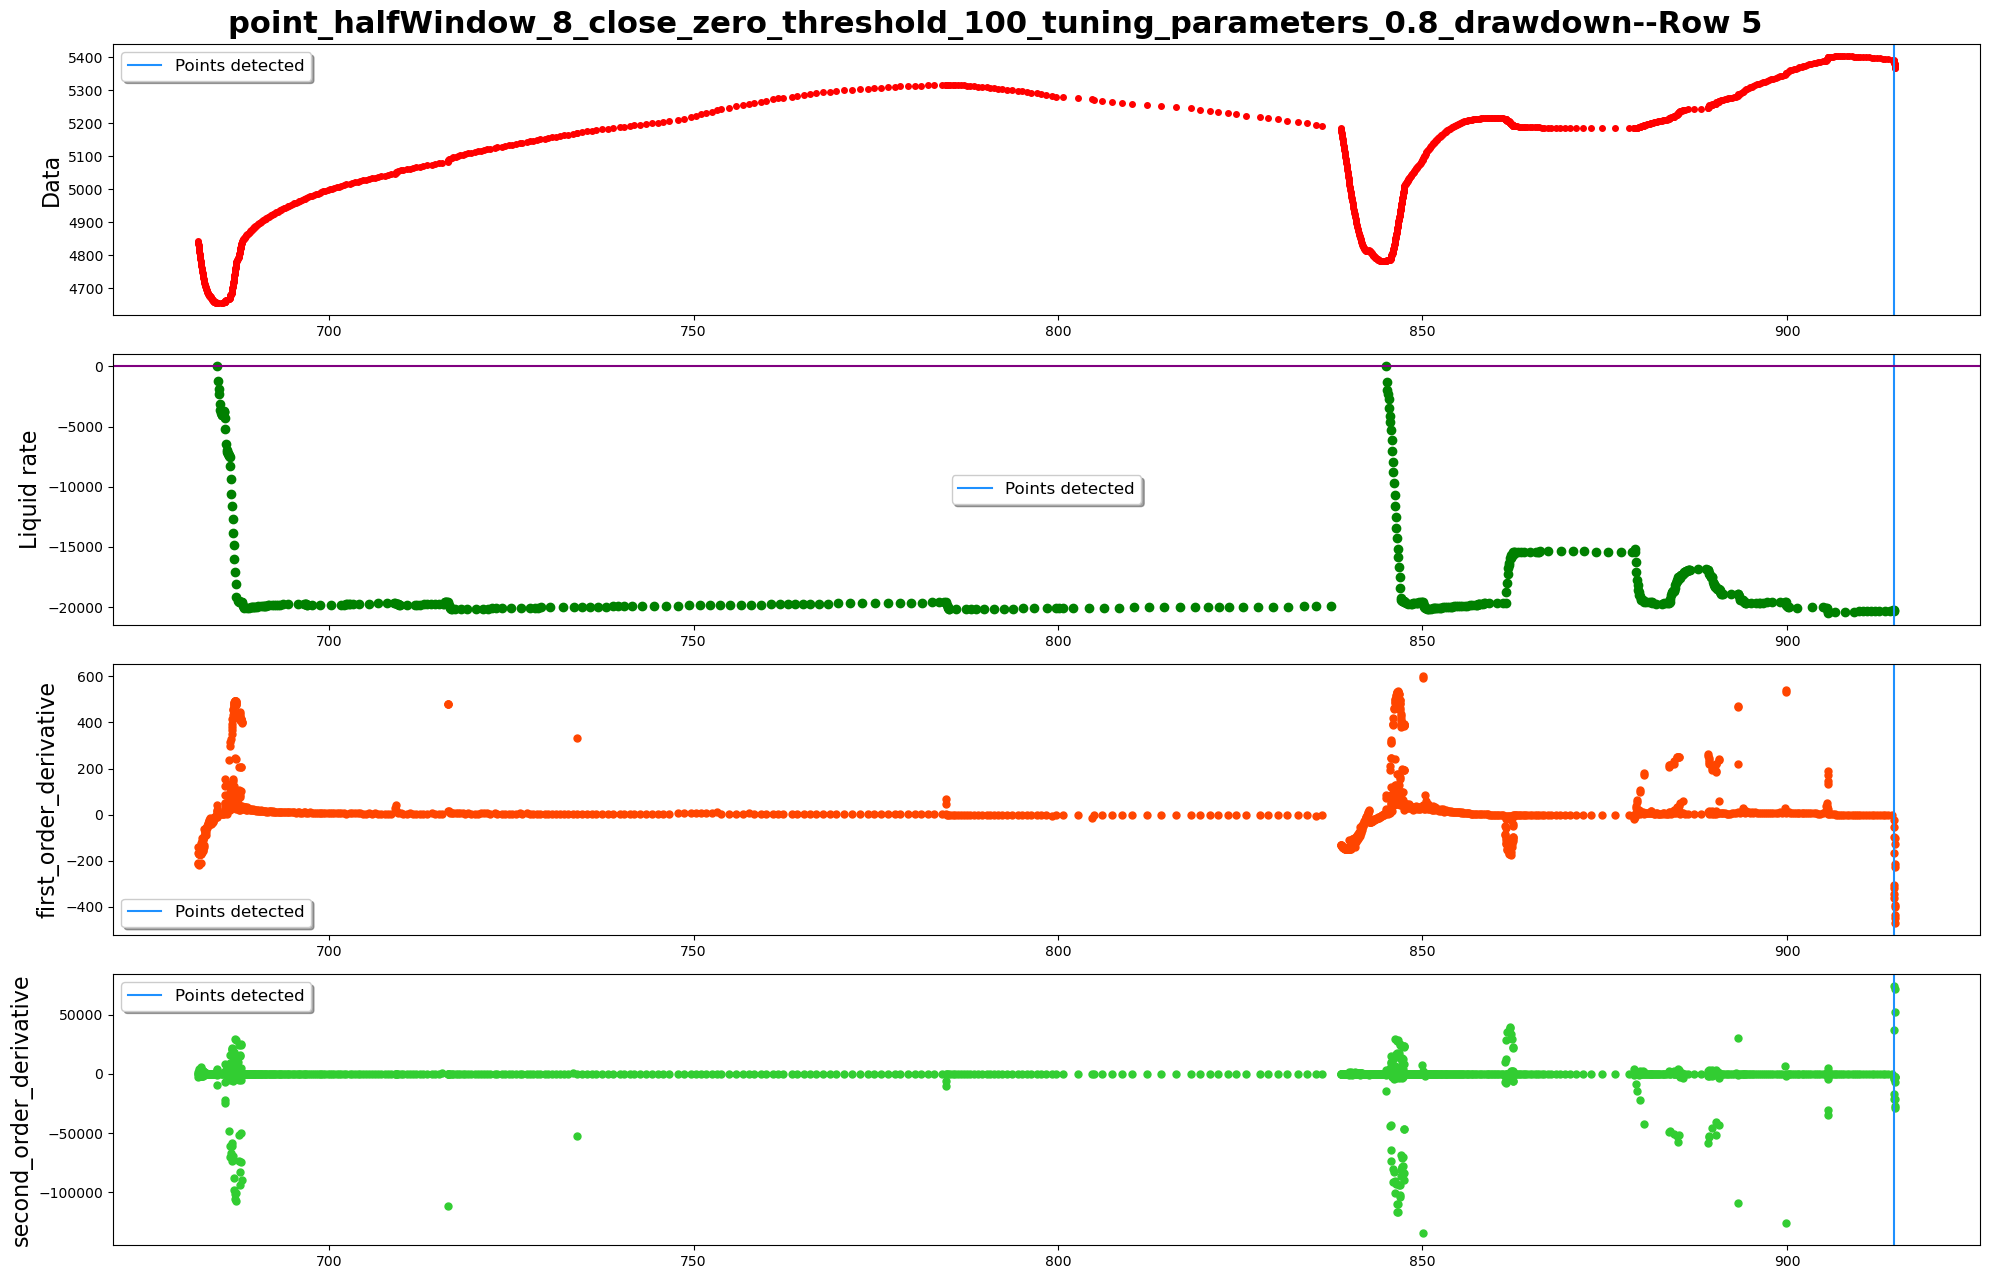

------row 6-----detected points:[]


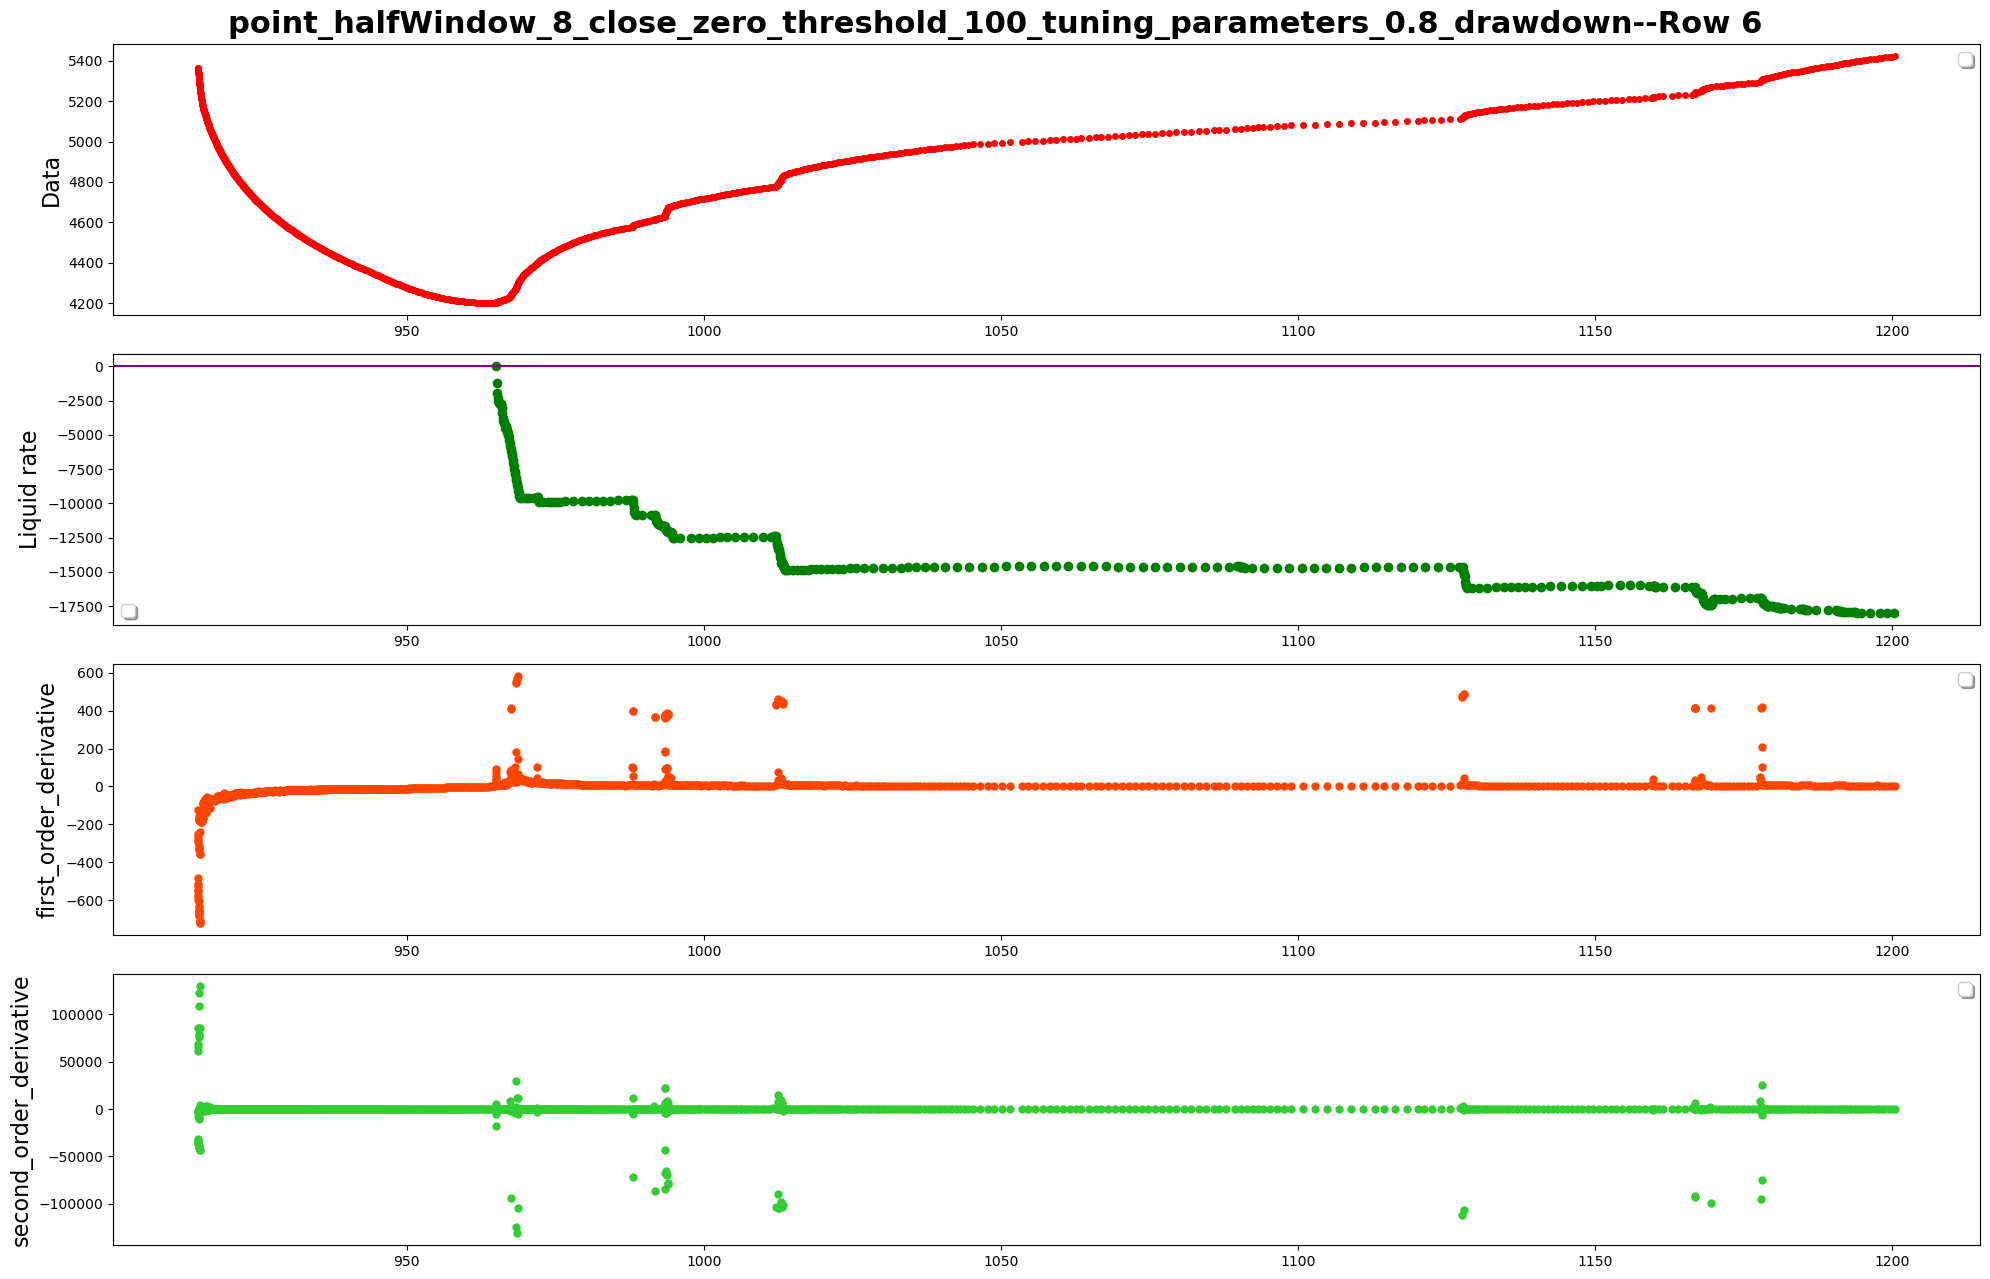

------row 7-----detected points:[7249, 7948]


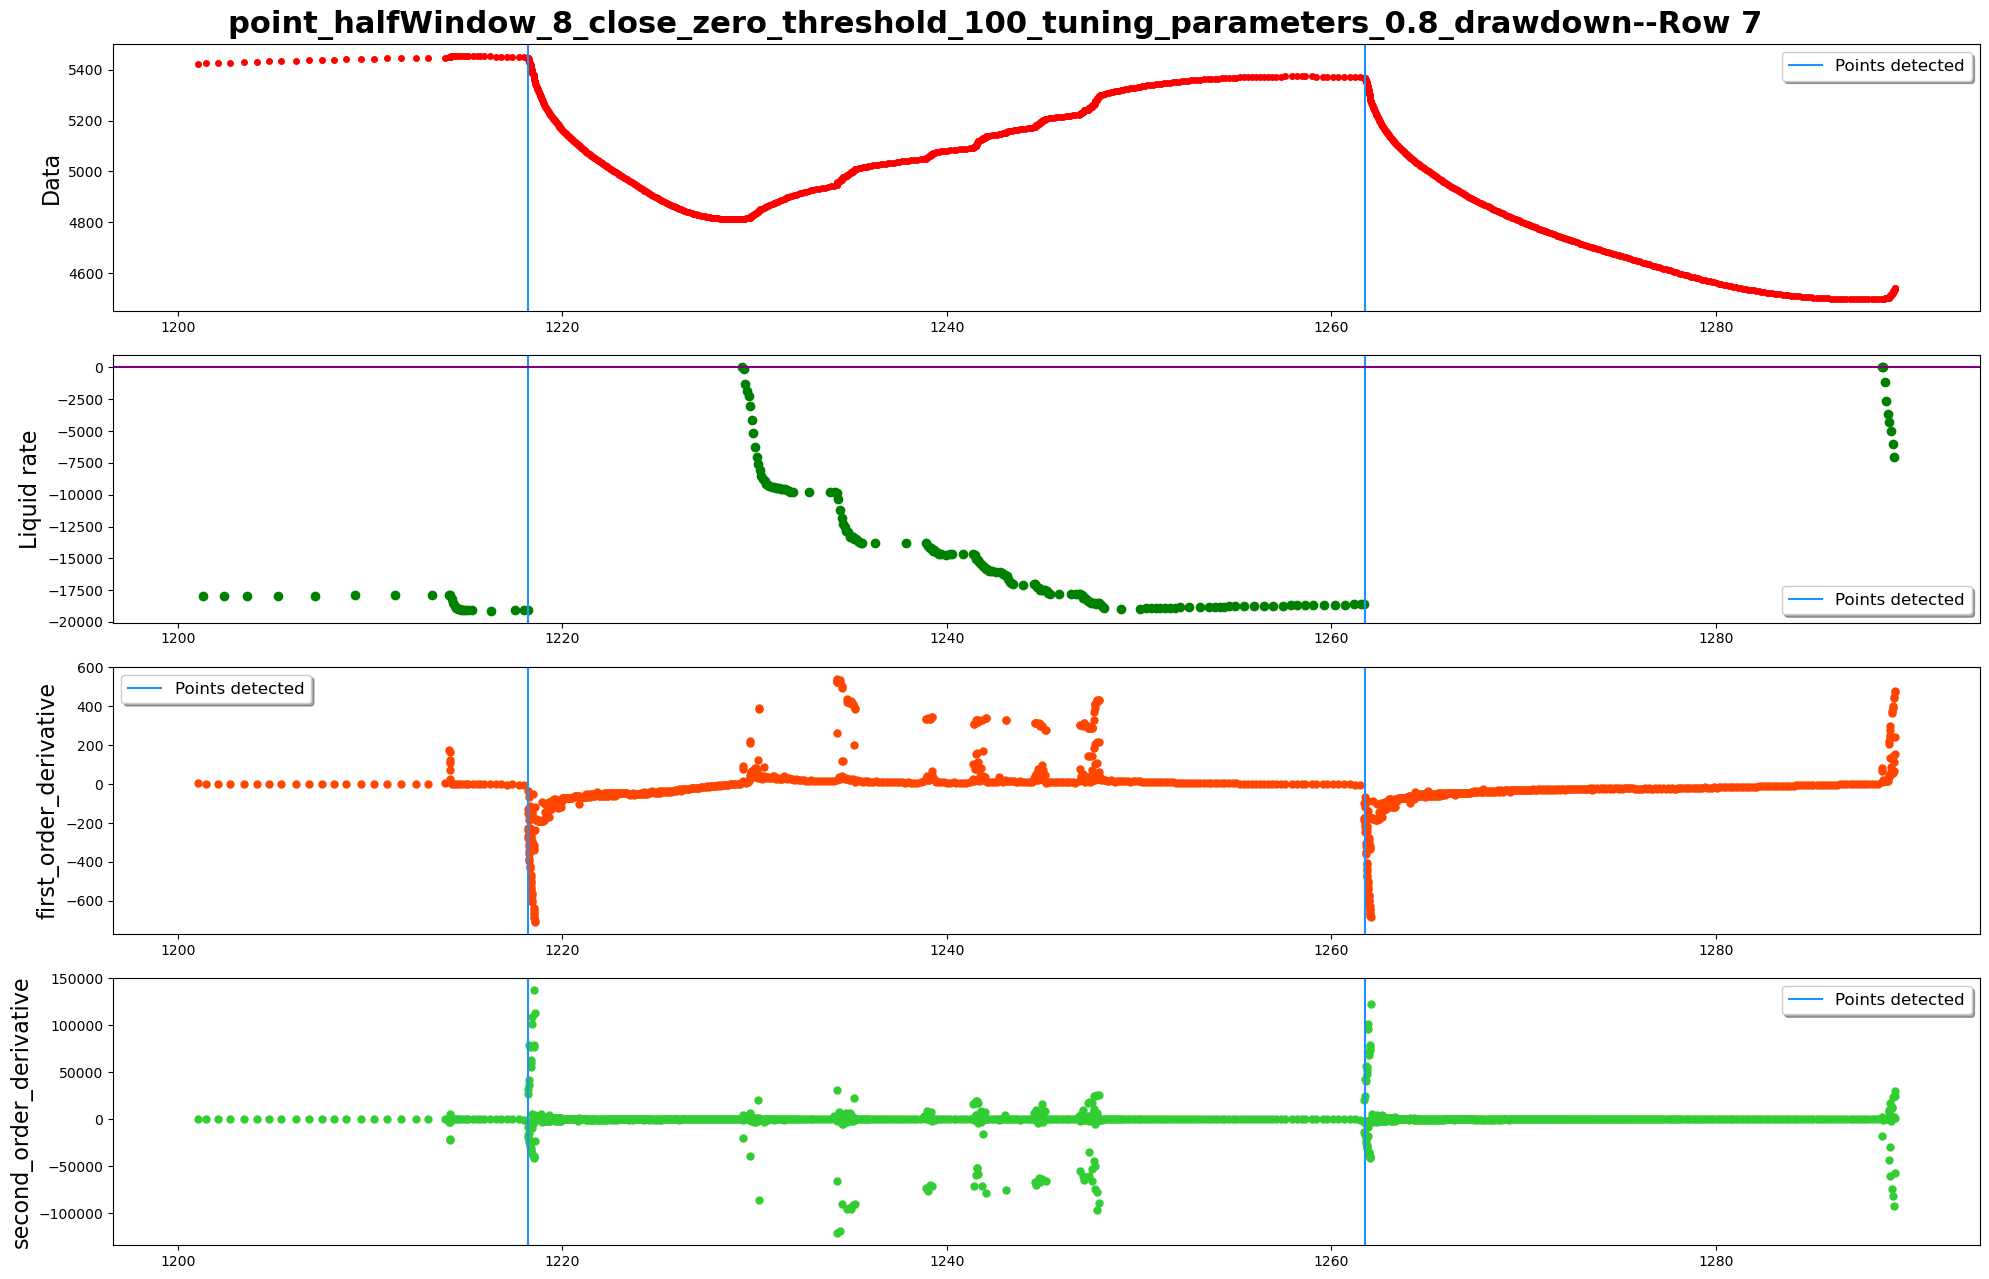

------row 8-----detected points:[9020, 9024]


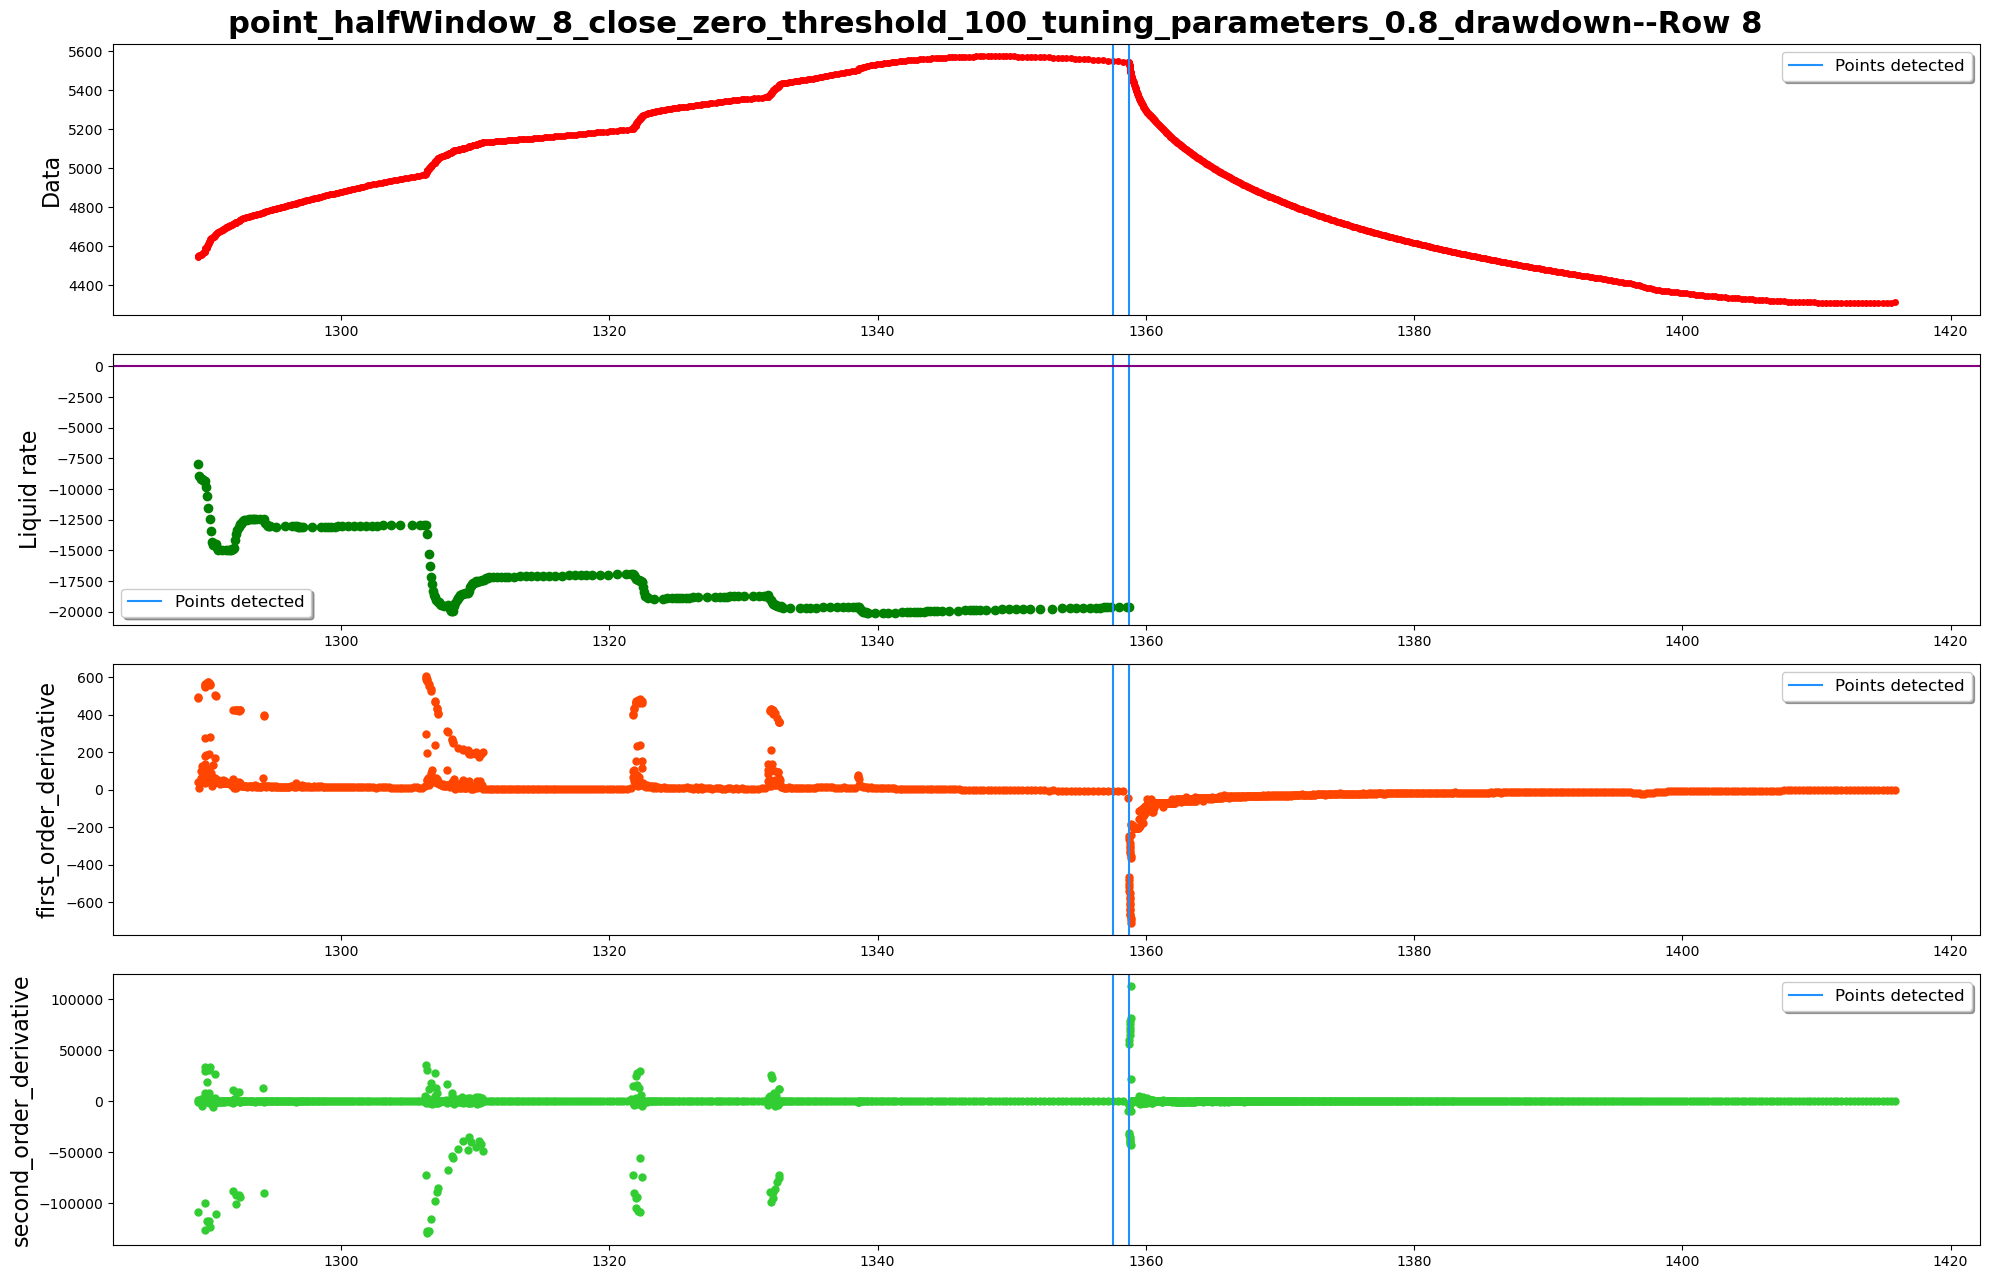

------row 9-----detected points:[10146, 10150, 10523, 10527]


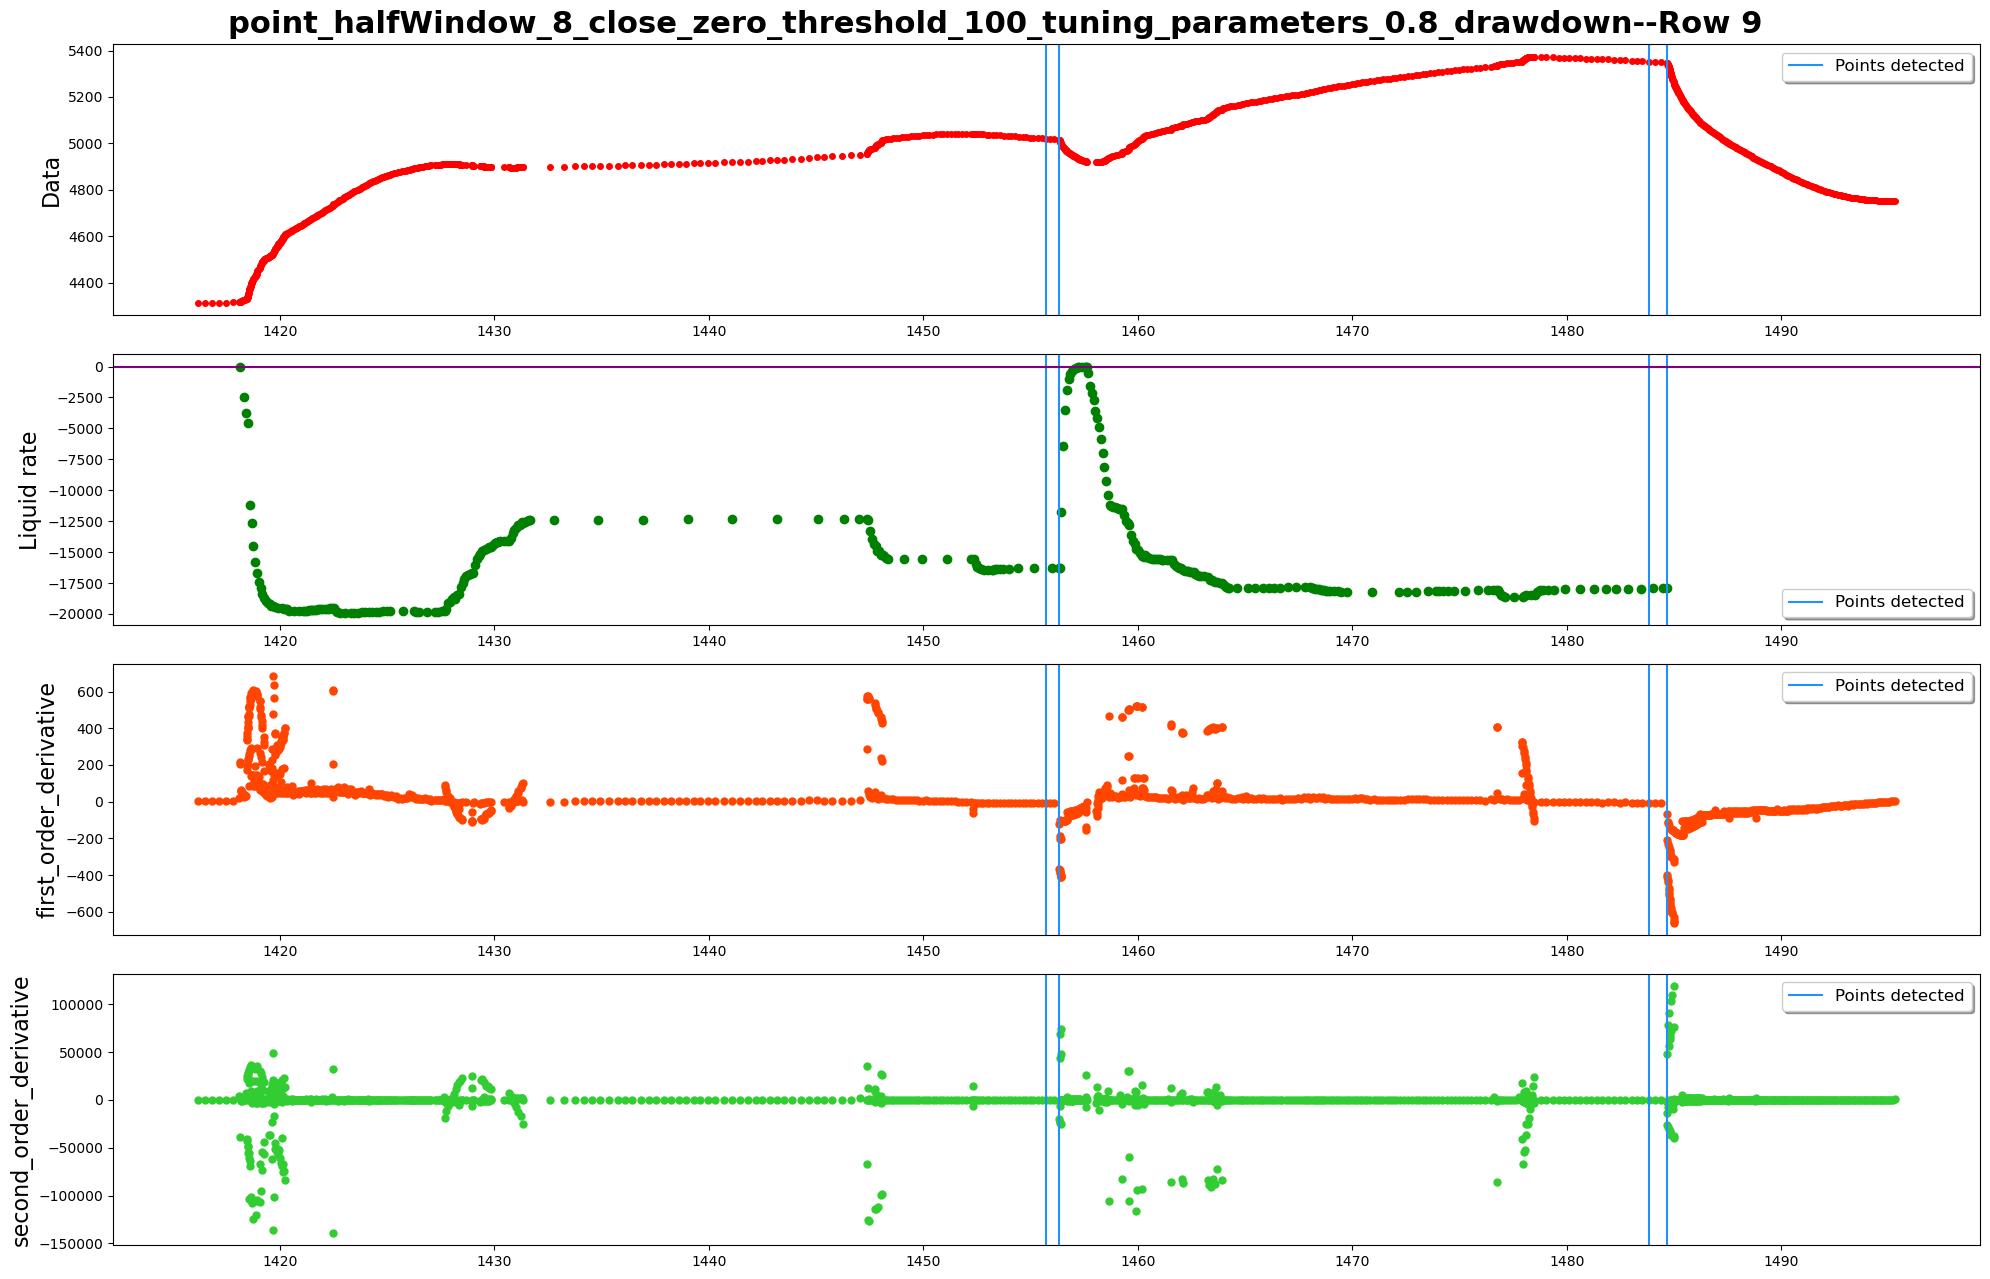

------row 10-----detected points:[11338, 11340]


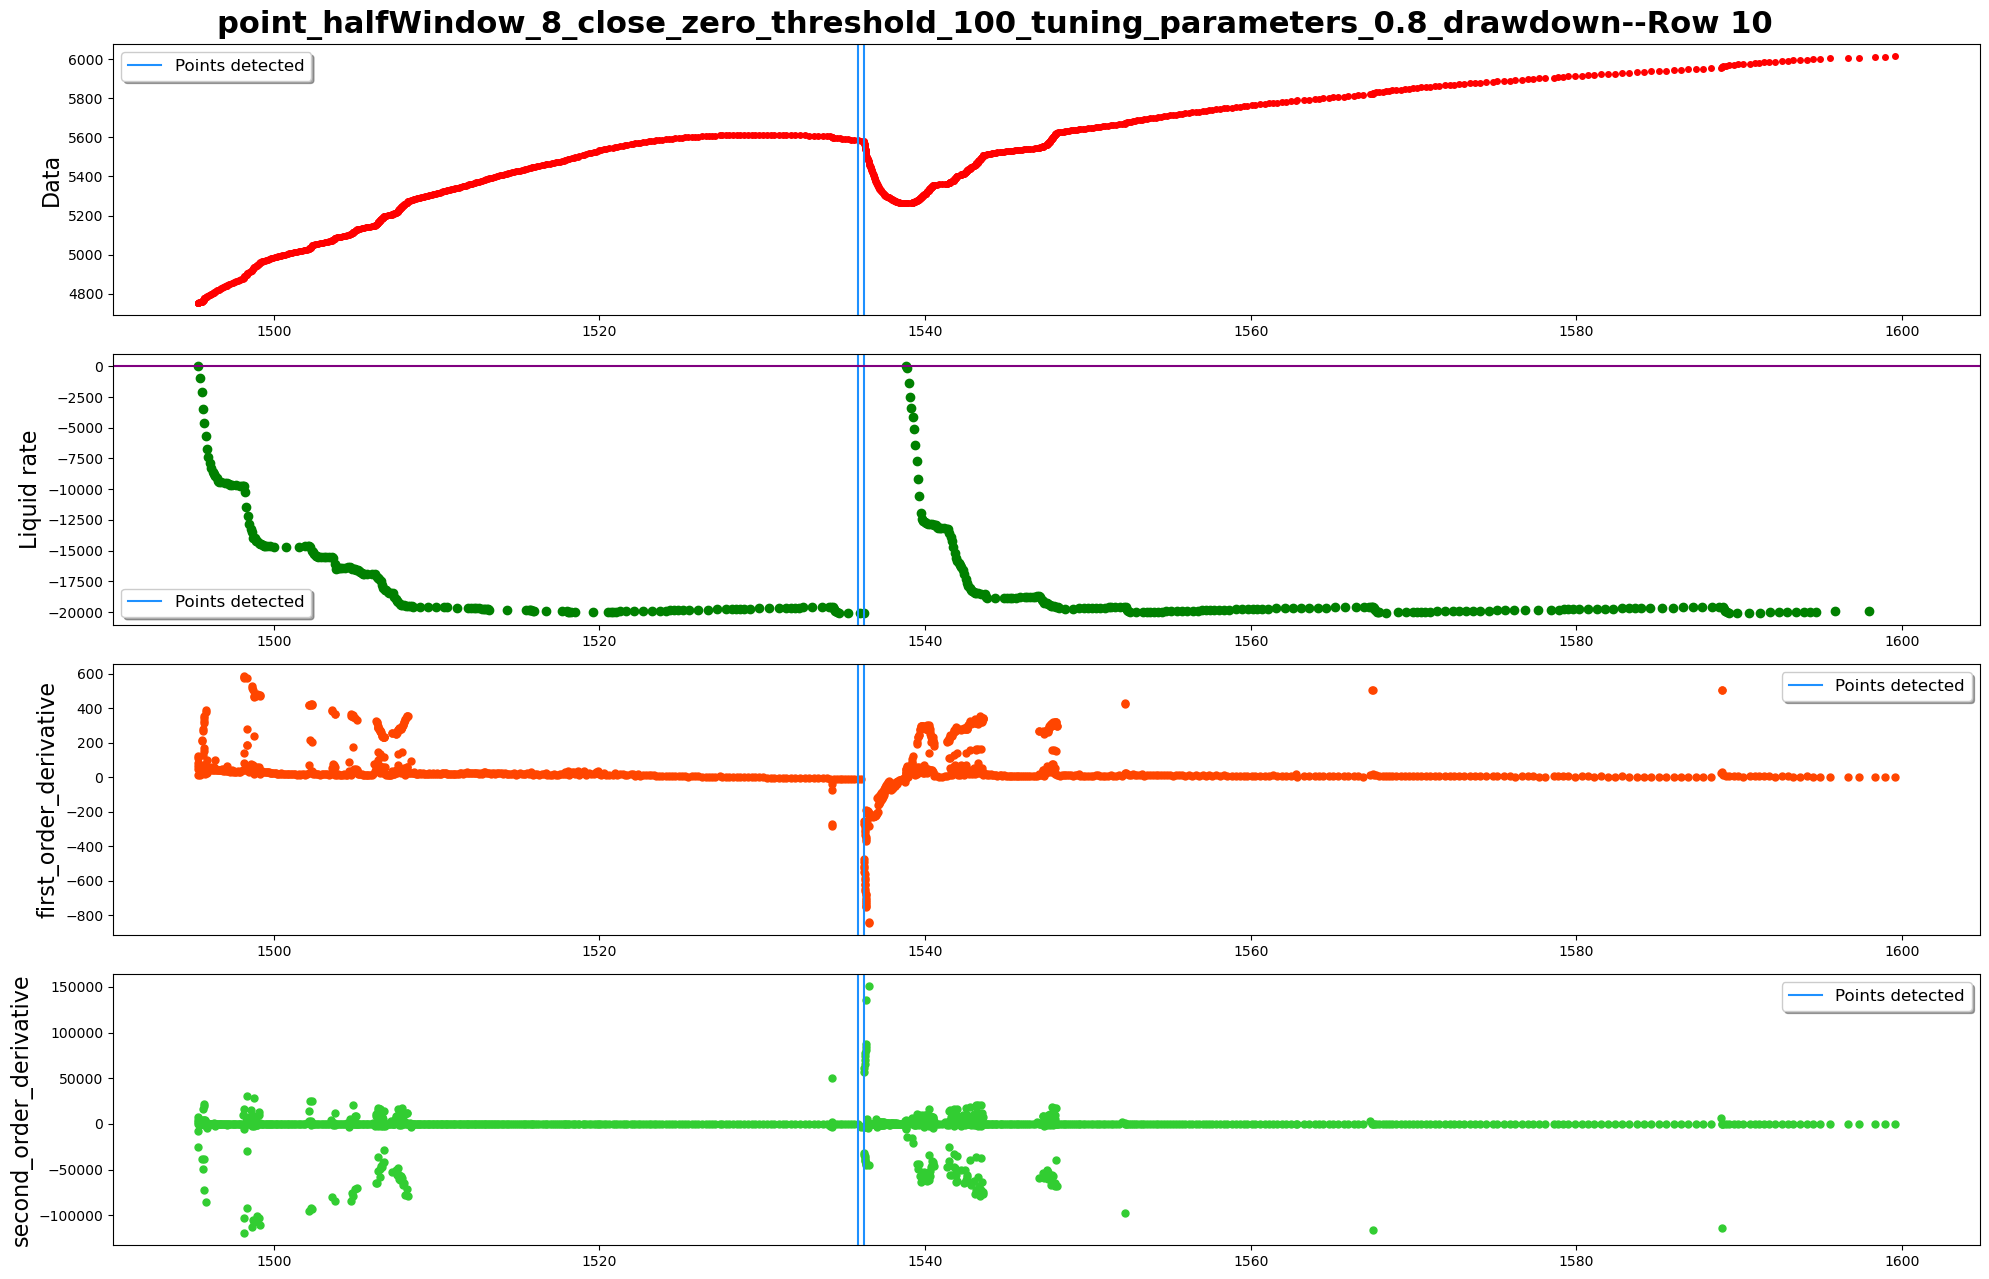

------row 11-----detected points:[12356, 12357, 12358, 12359, 12360, 12362]


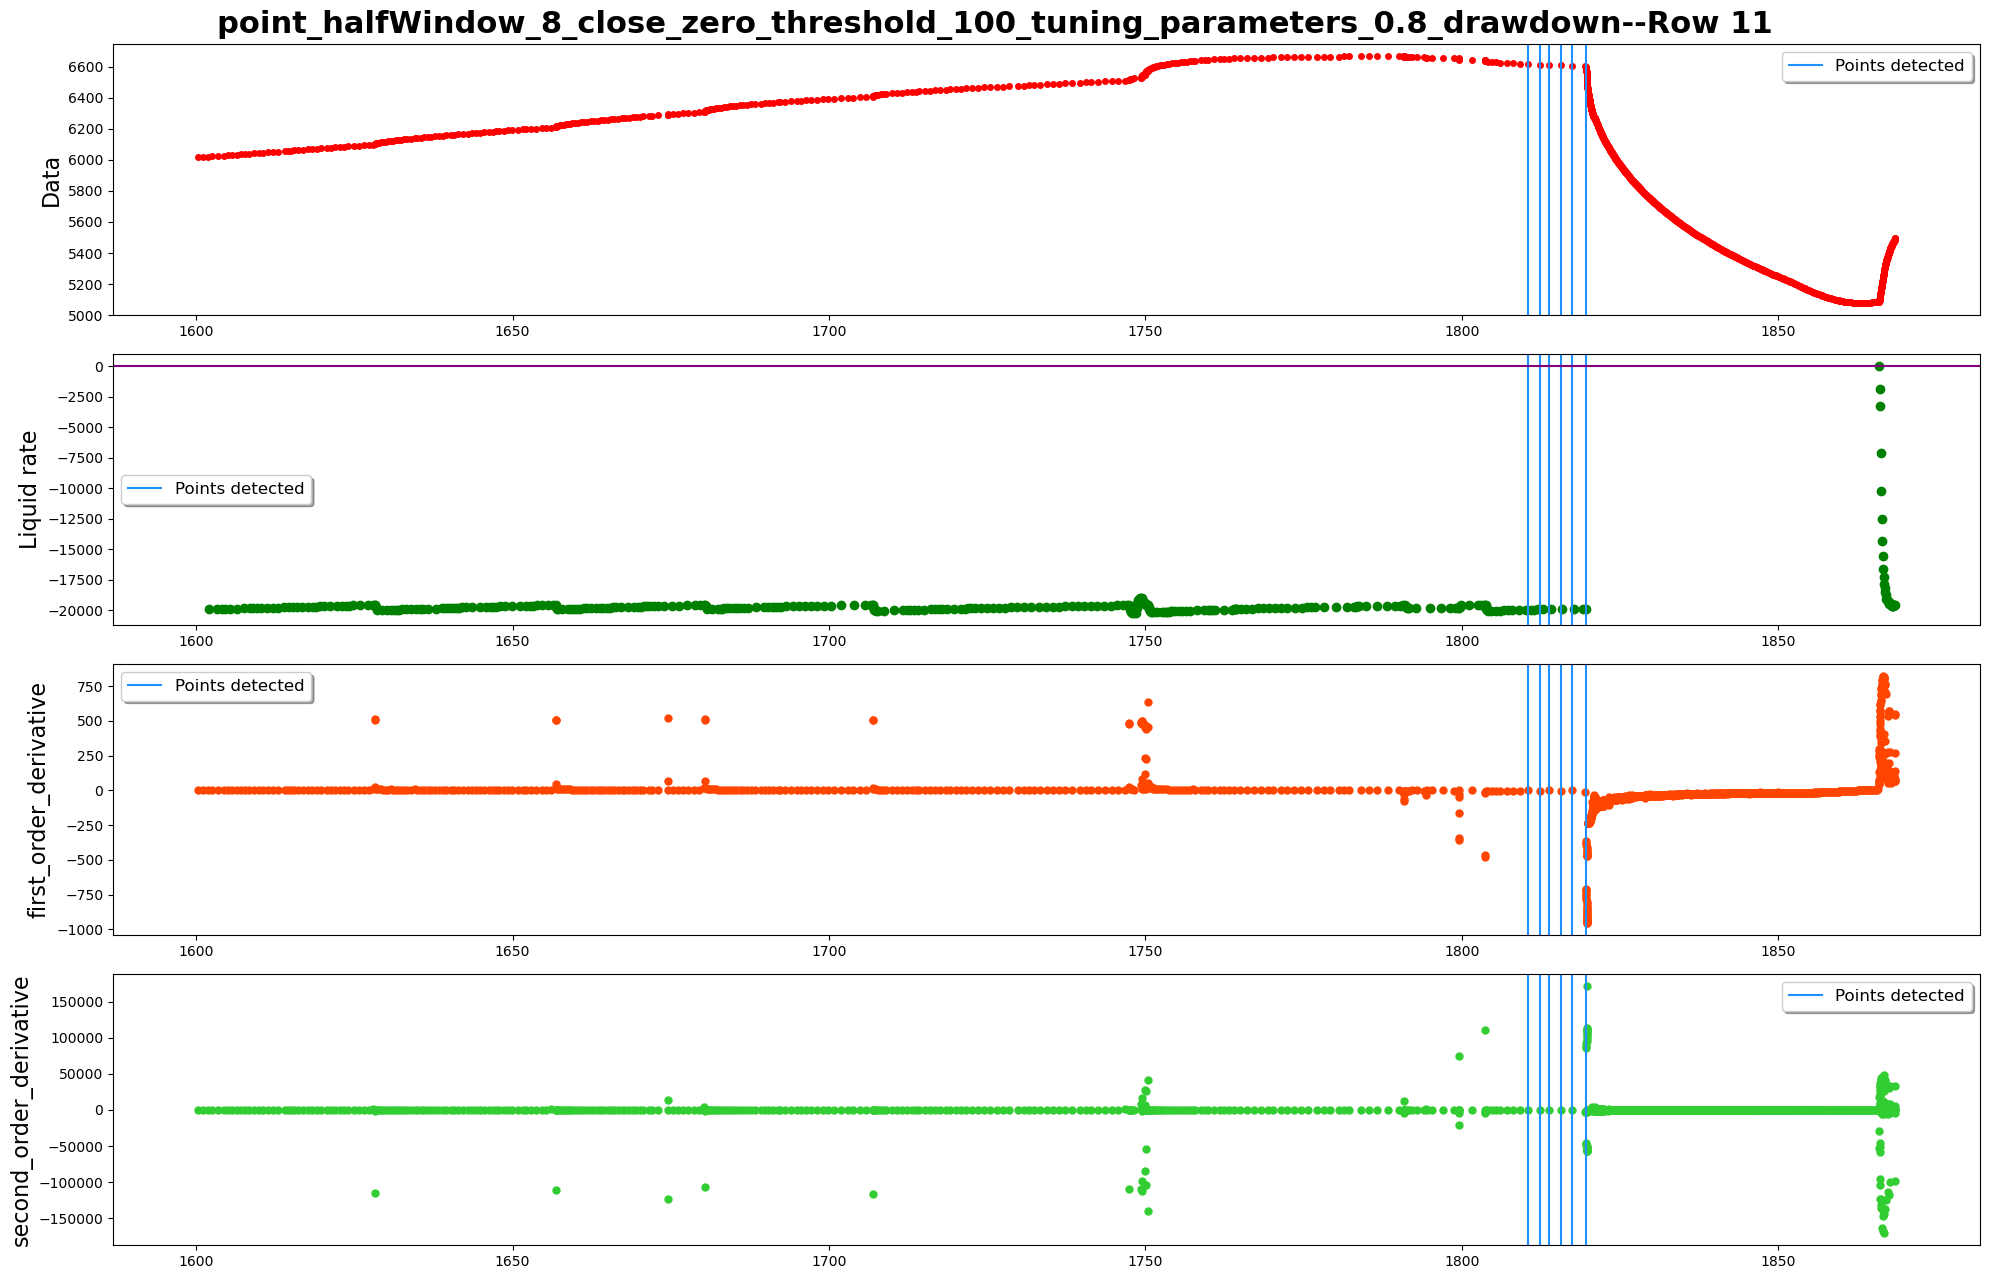

------row 12-----detected points:[13835, 13867]


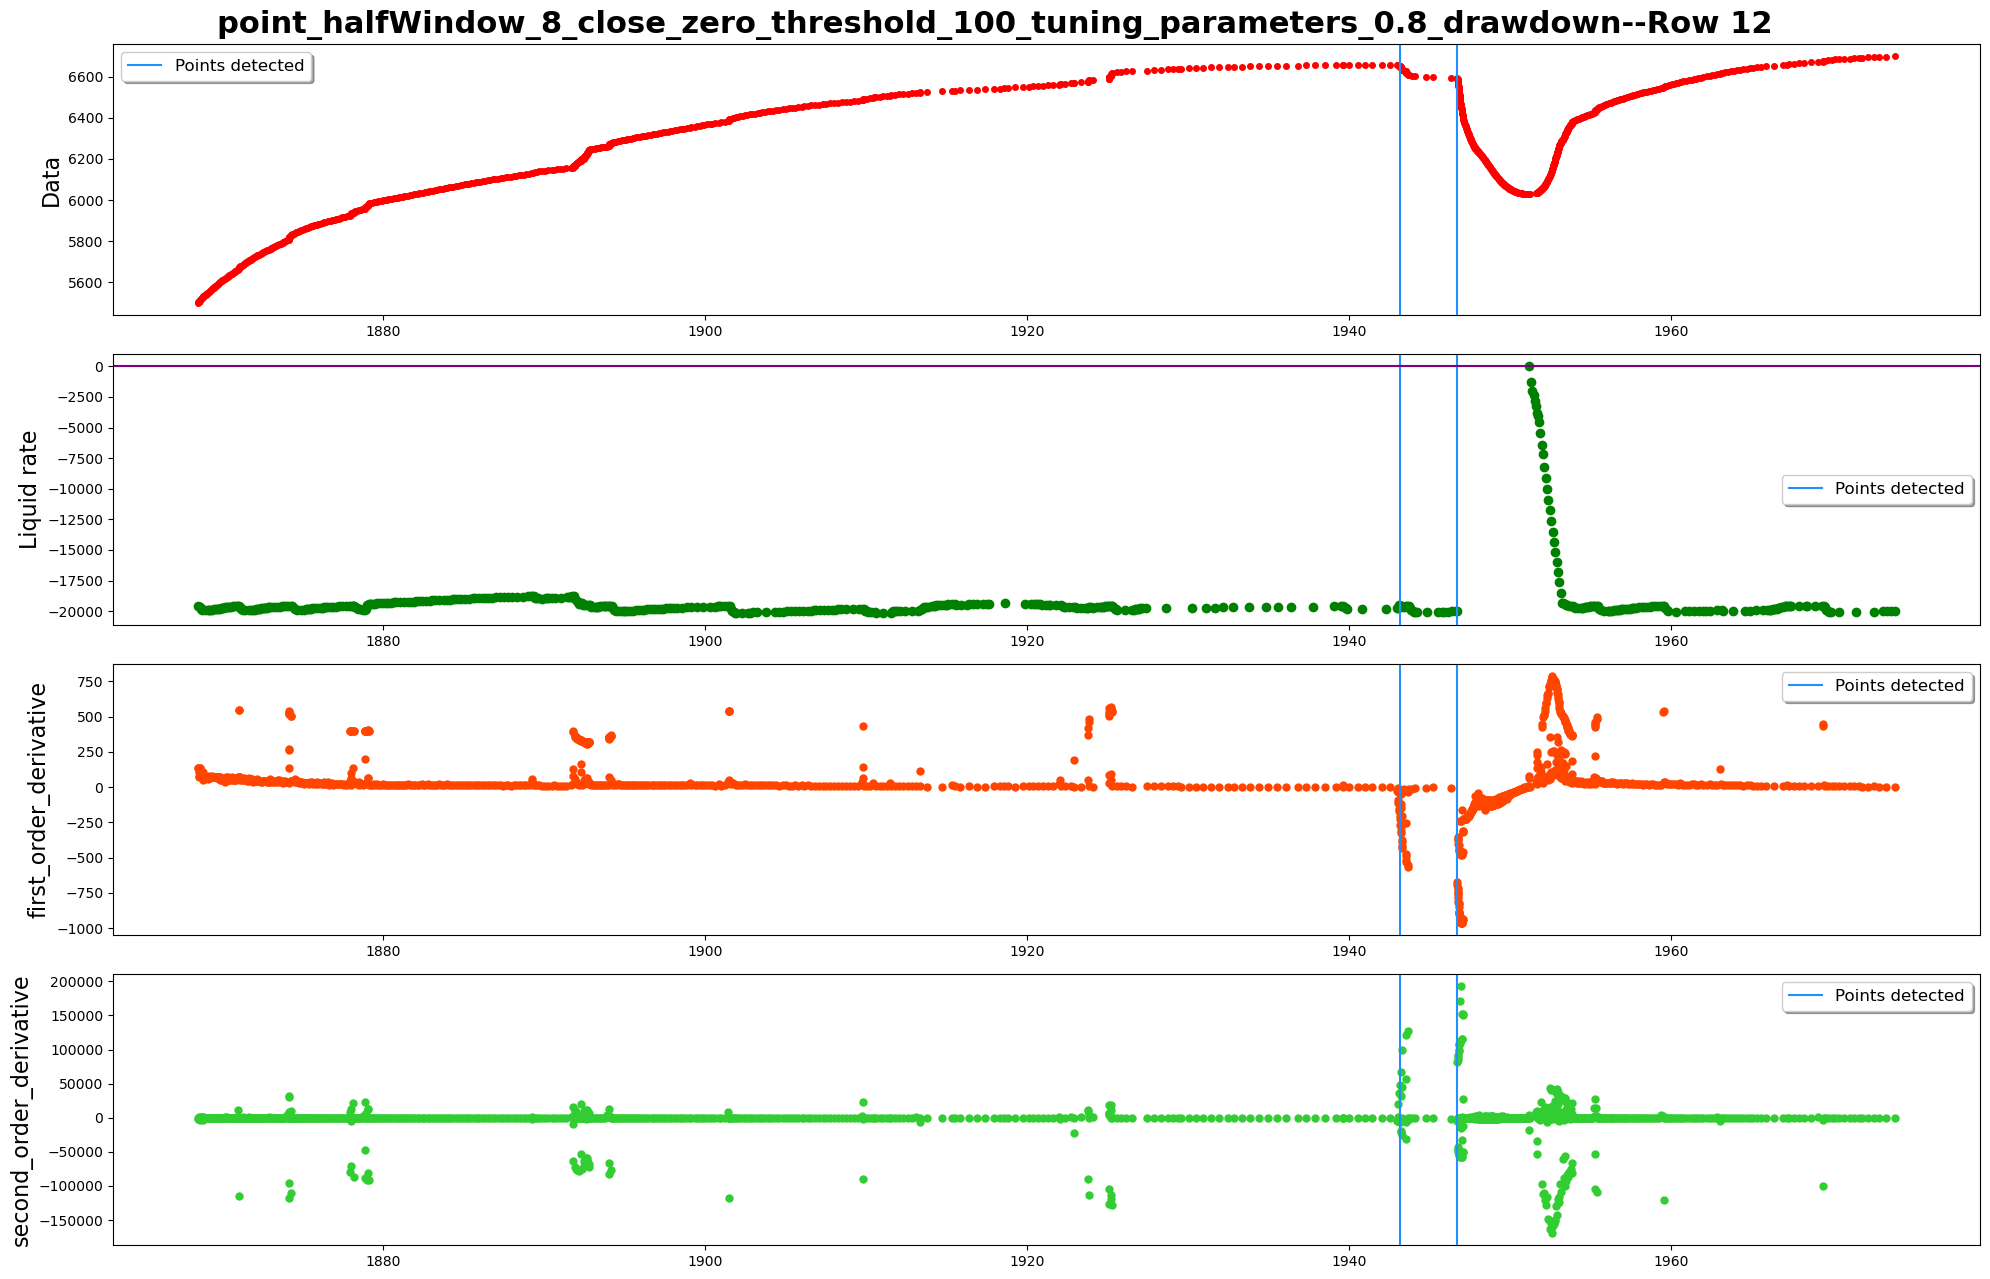

------row 13-----detected points:[14763, 14764, 14765, 14767]


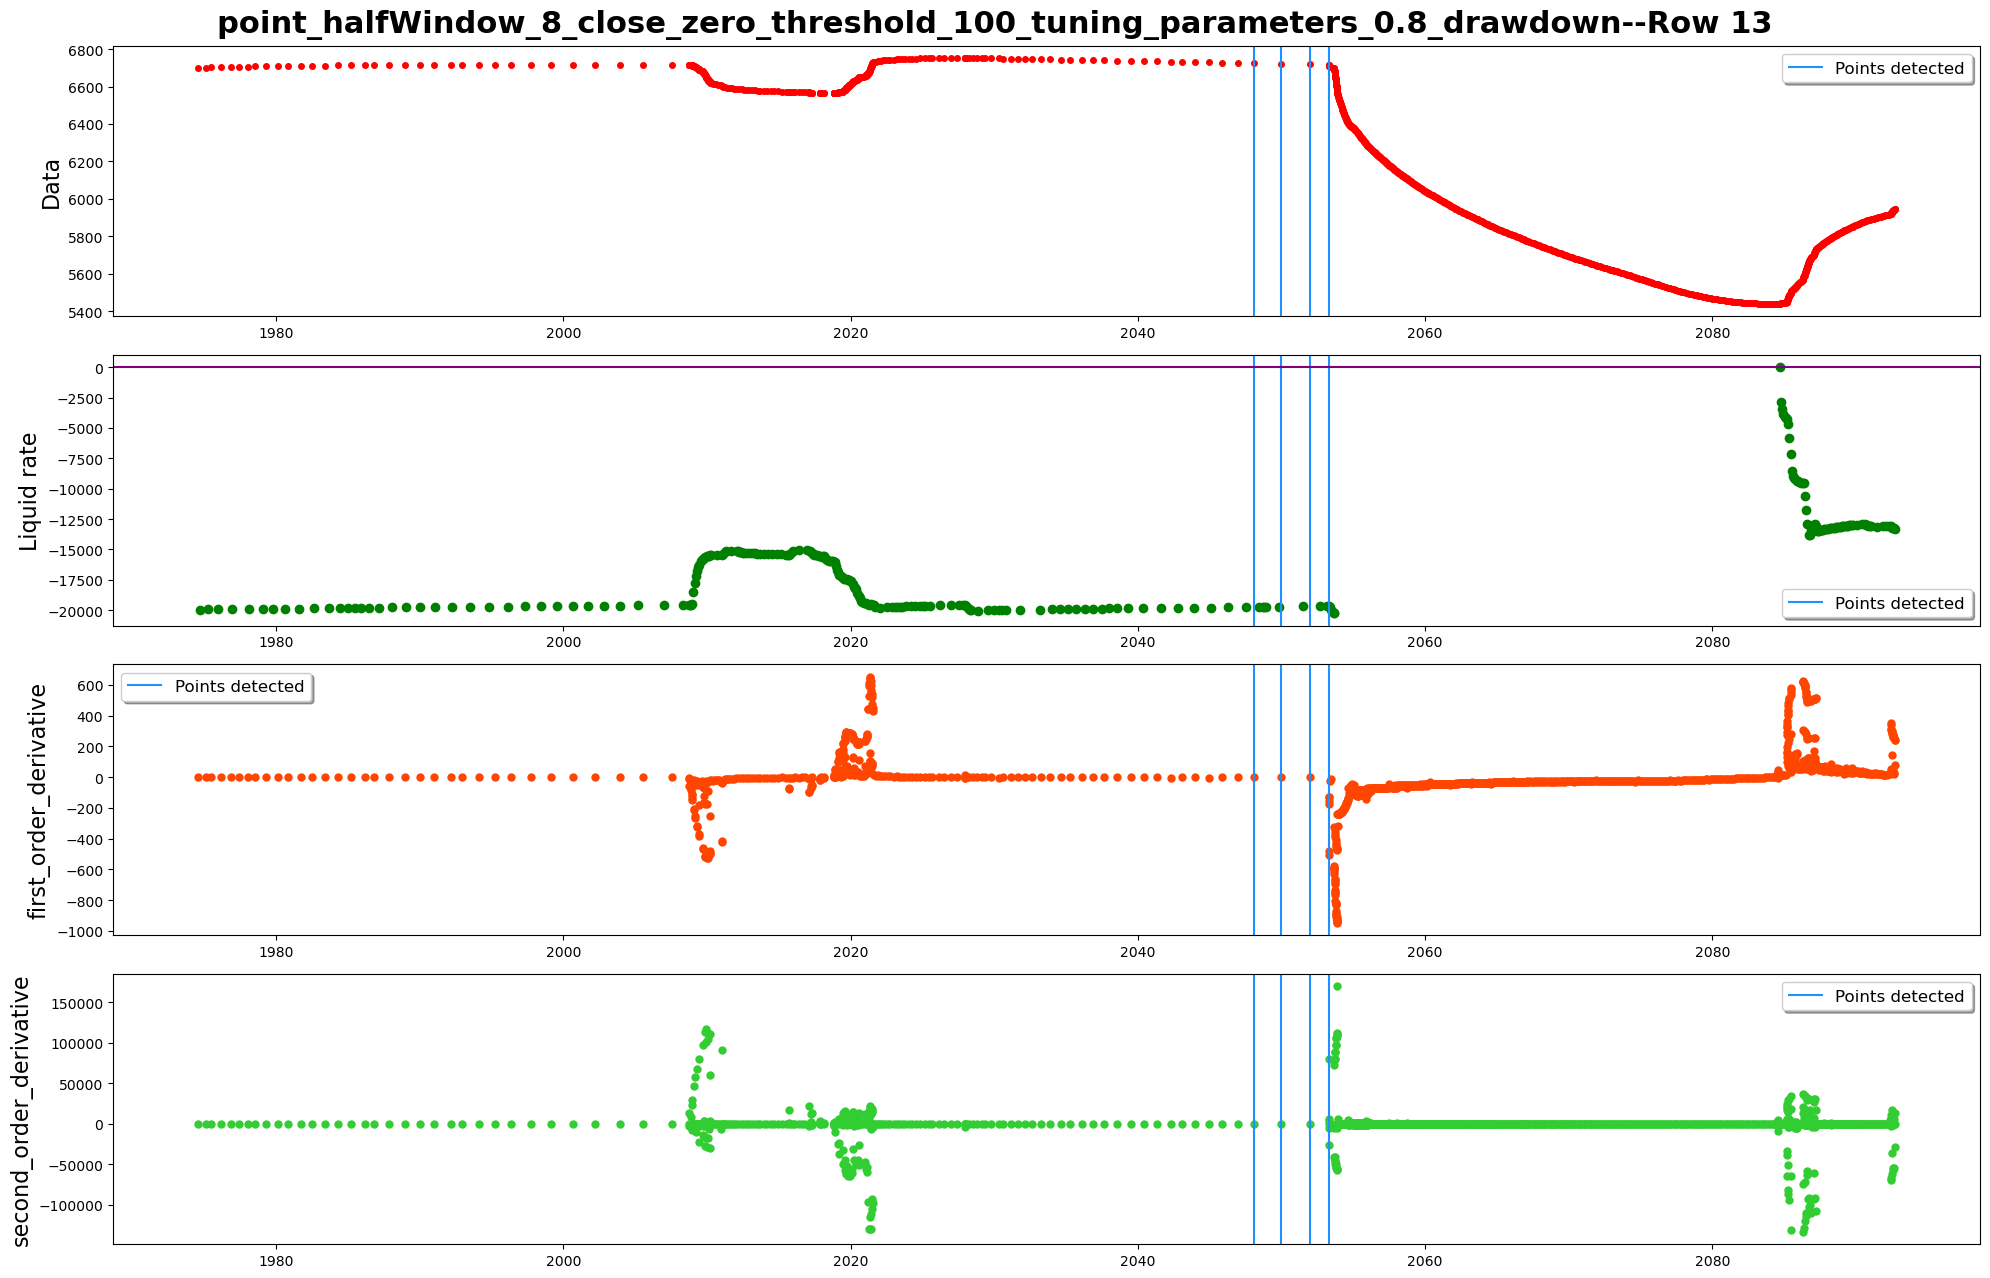

------row 14-----detected points:[16095]


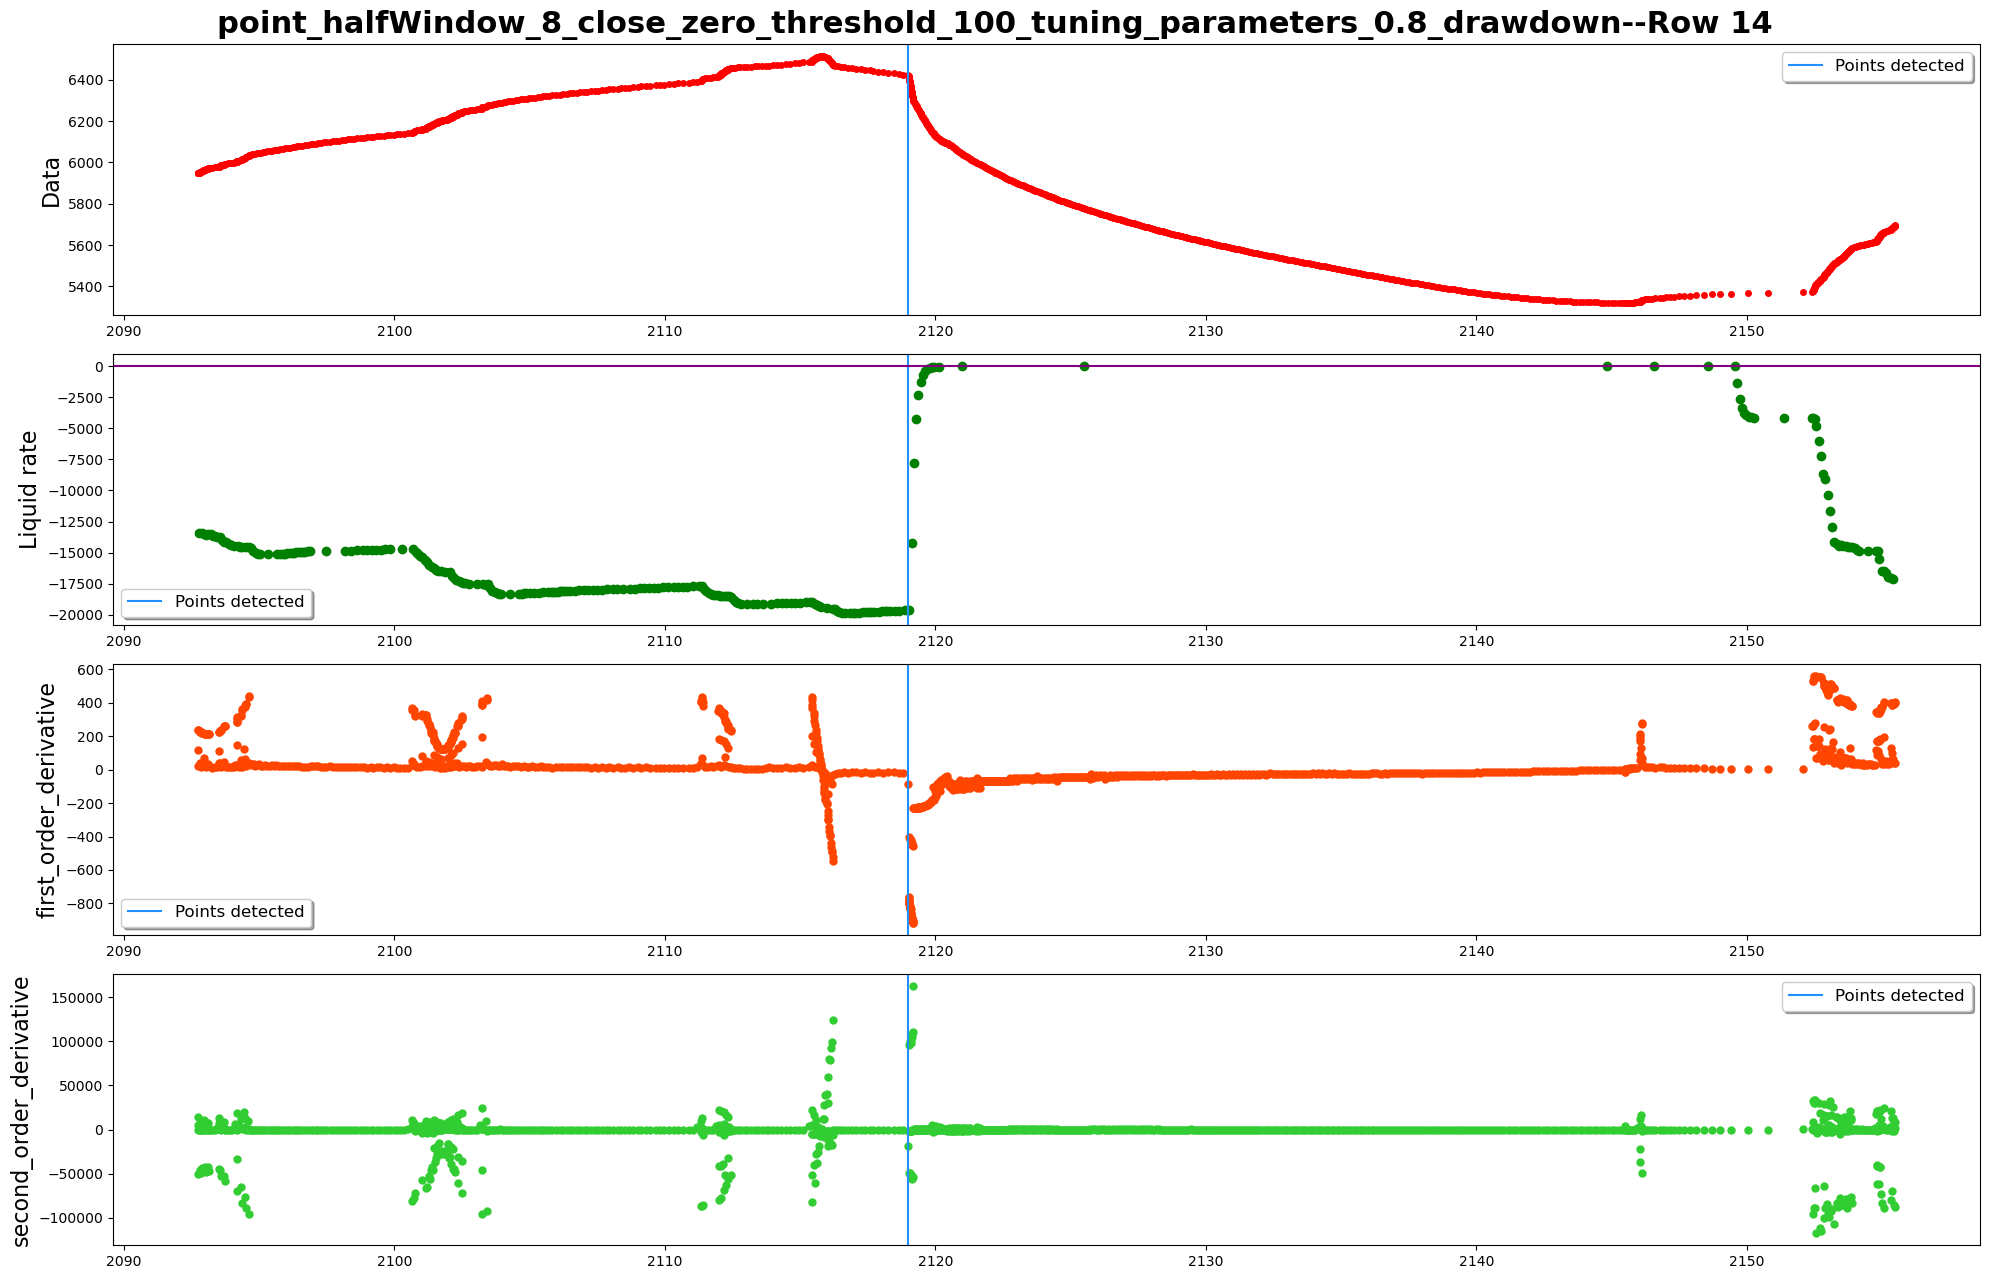

------row 15-----detected points:[17549, 17552, 17587, 17588]


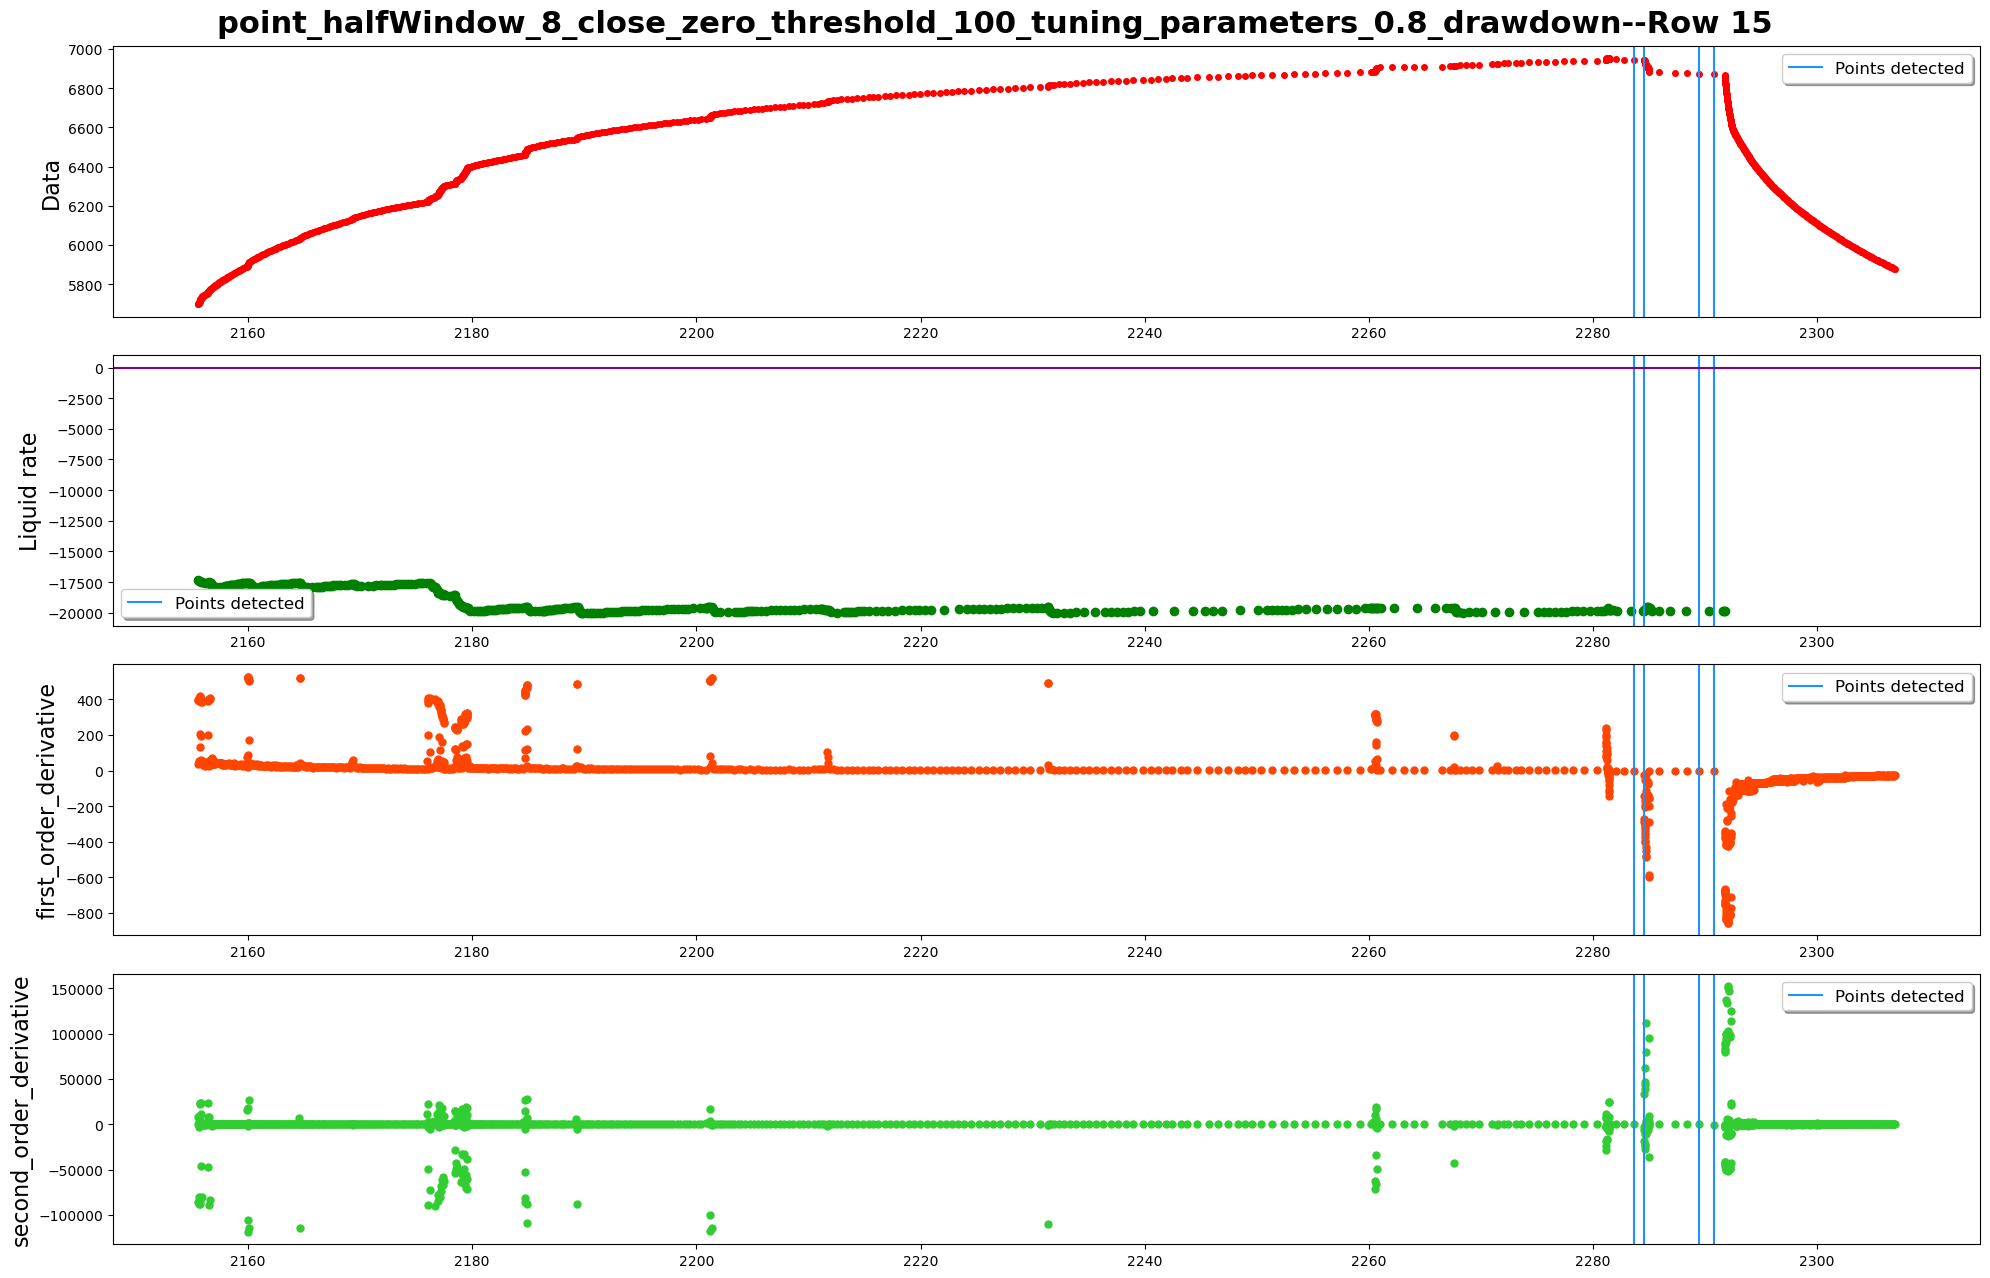

------row 16-----detected points:[]


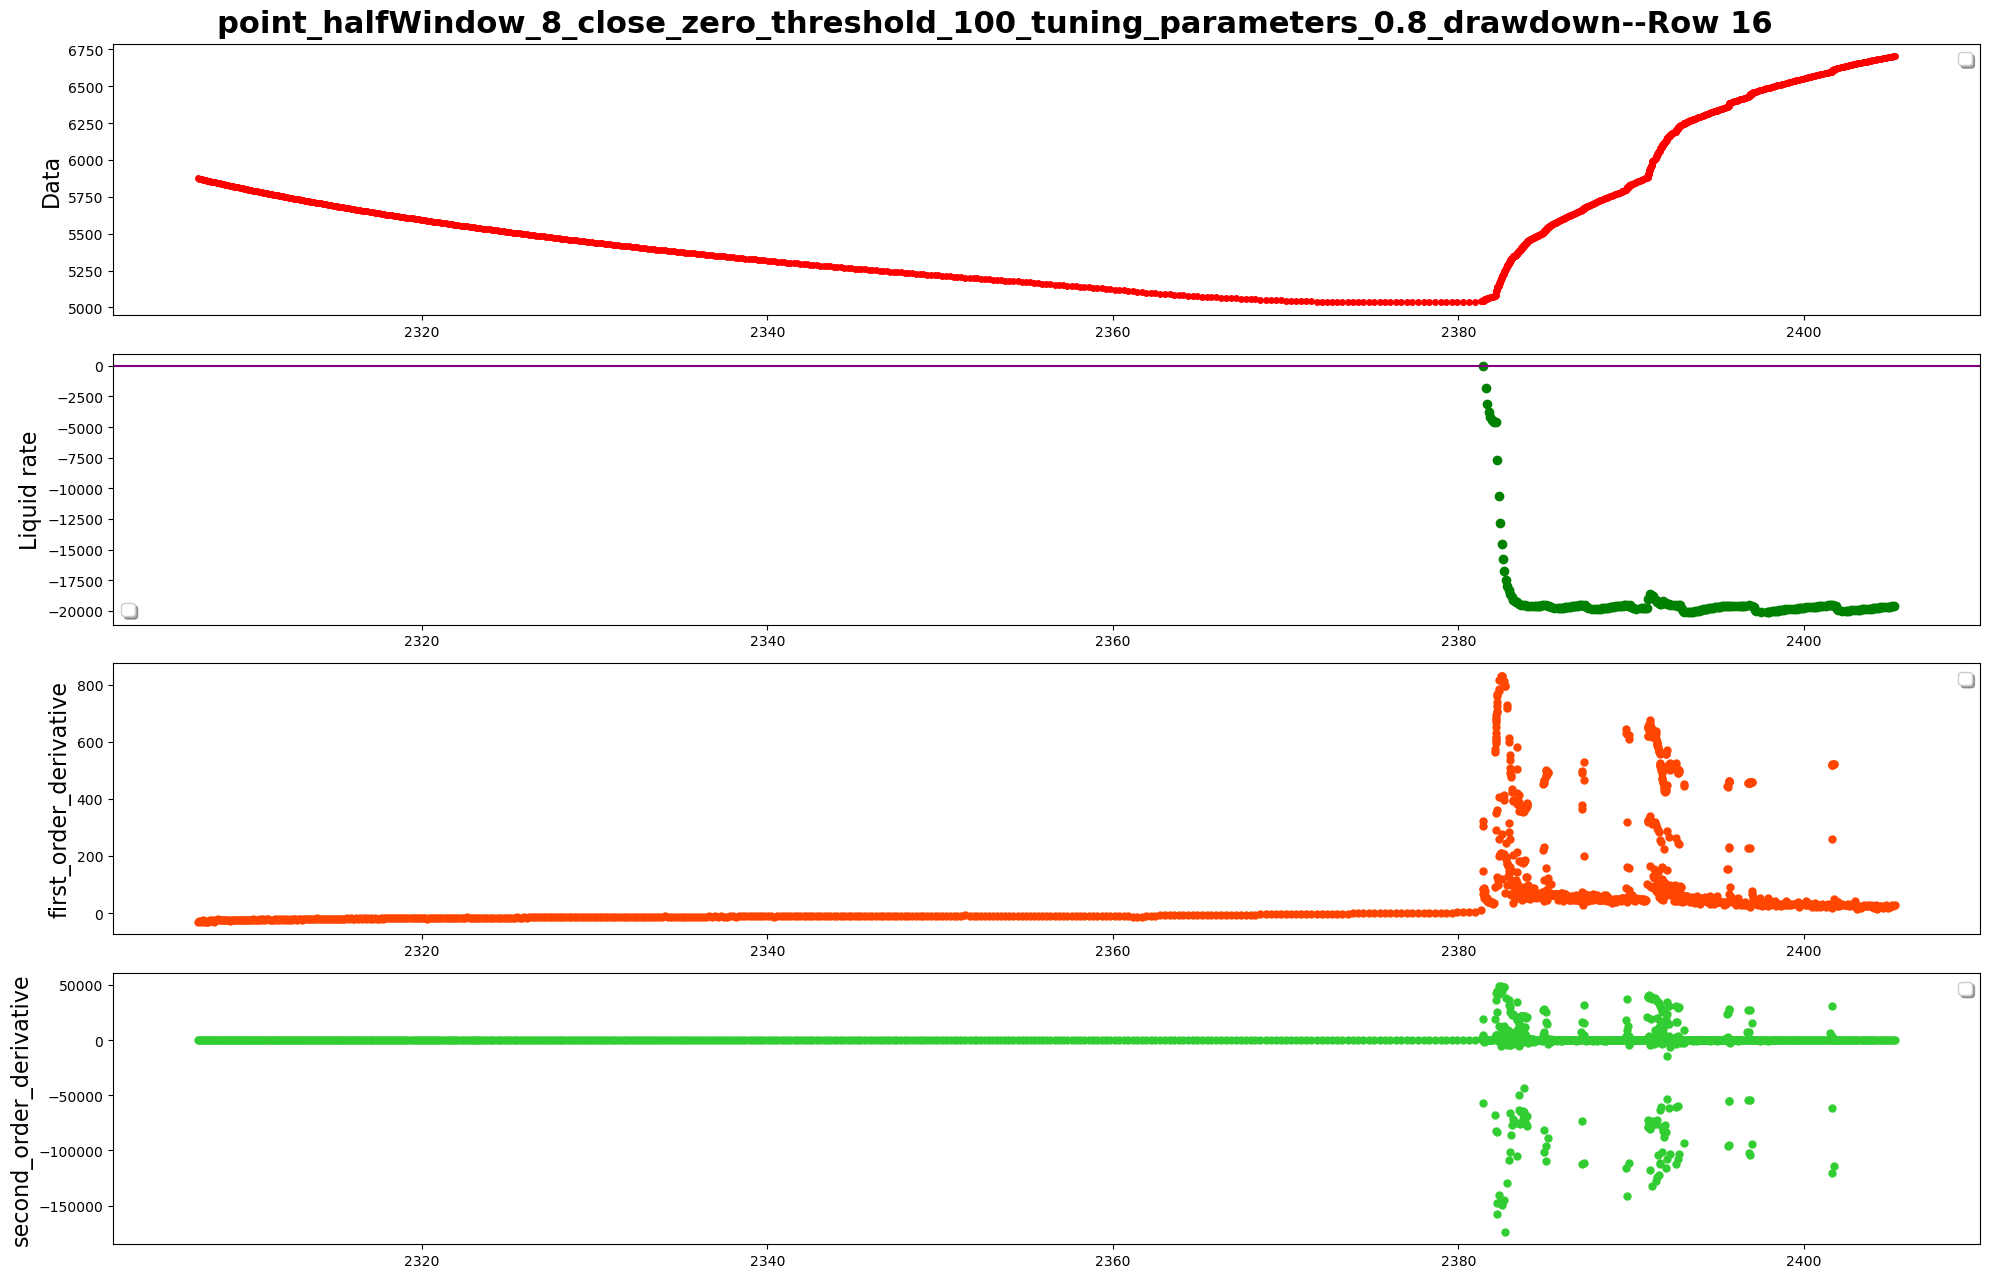

------row 17-----detected points:[20008, 20013]


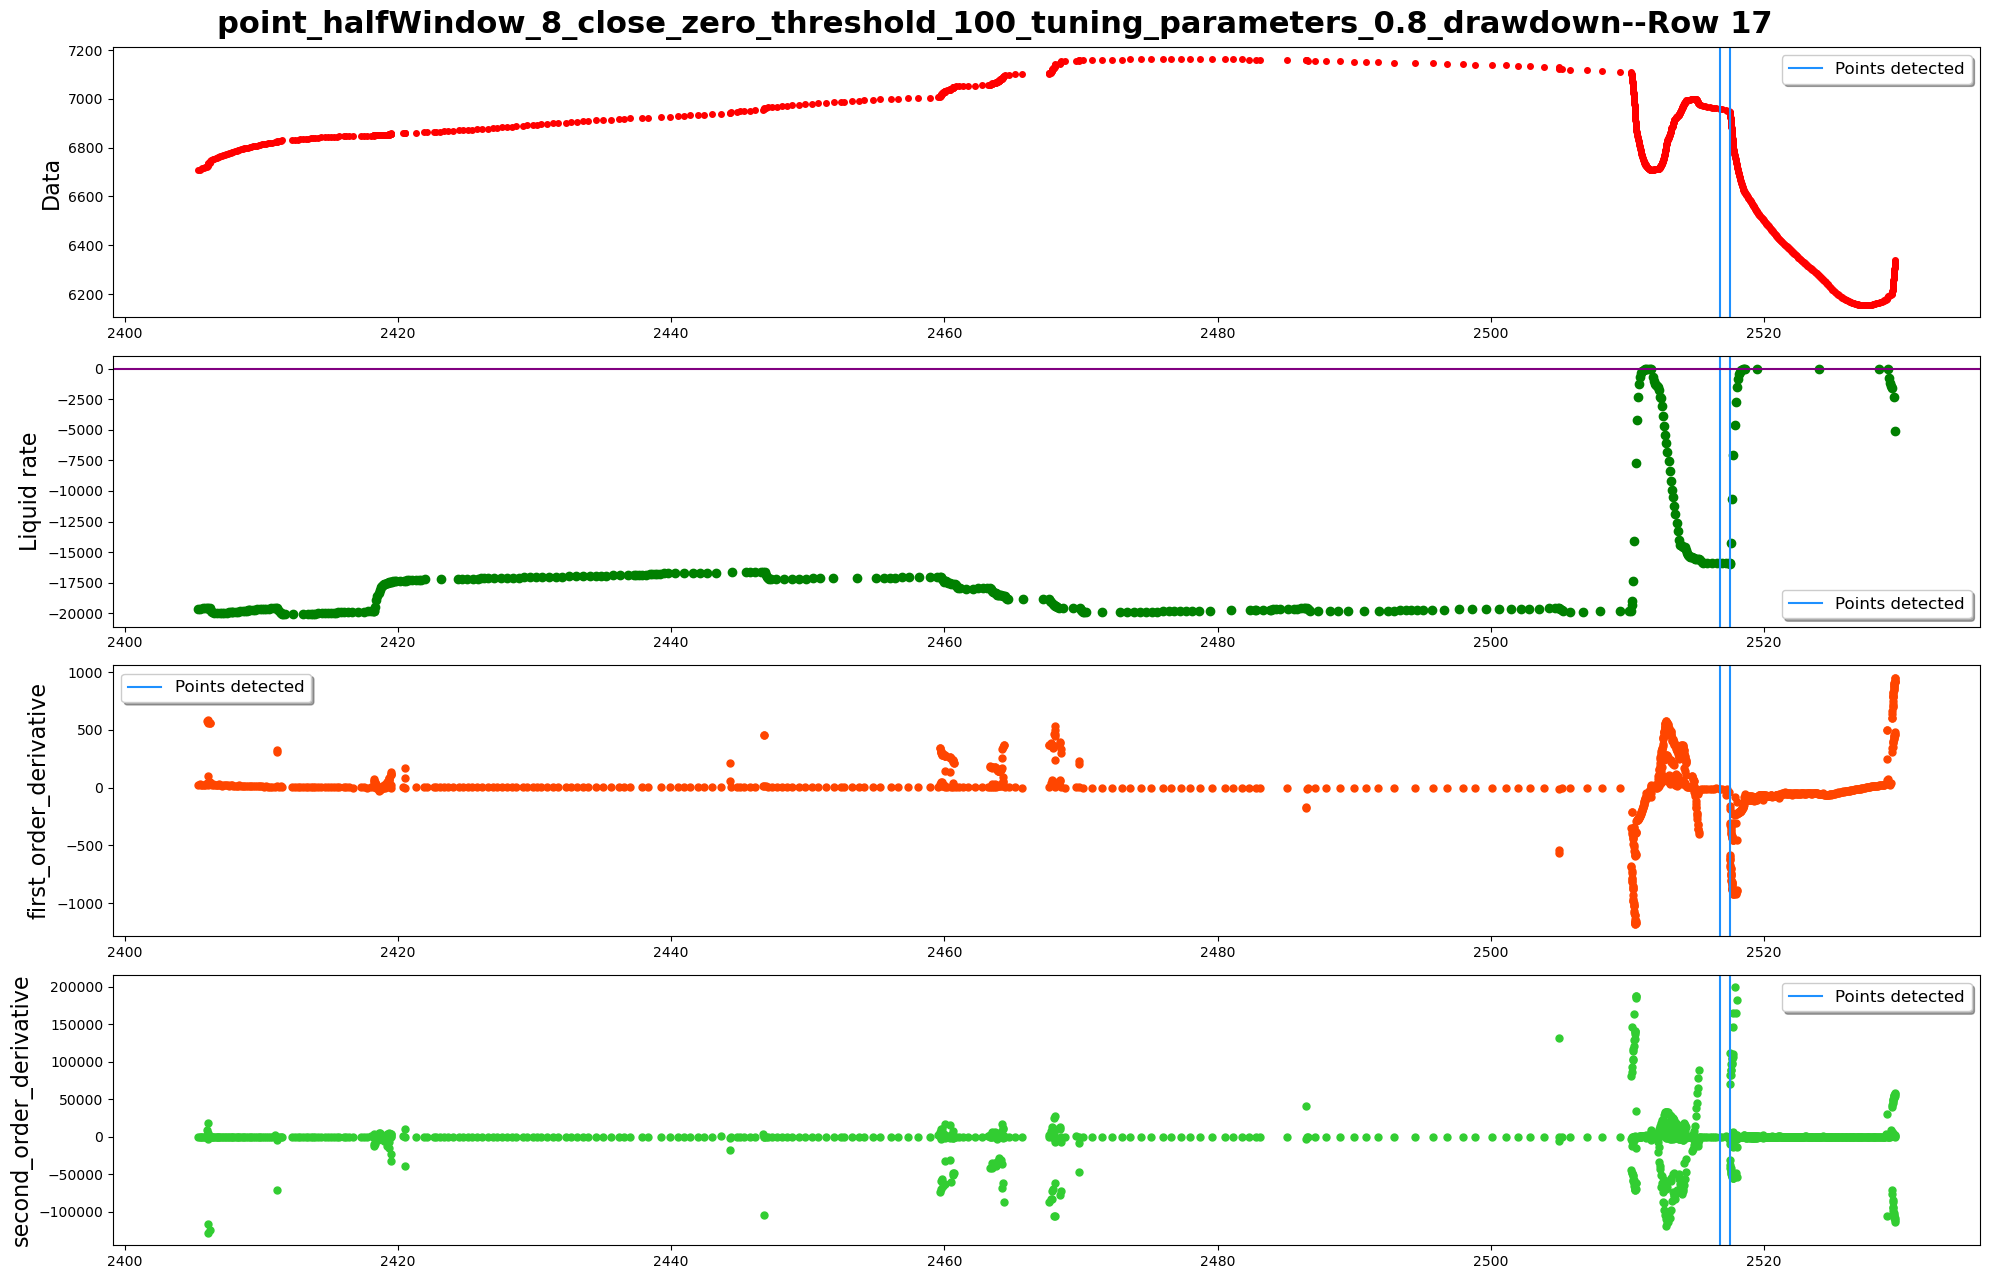

------row 18-----detected points:[20694, 20700]


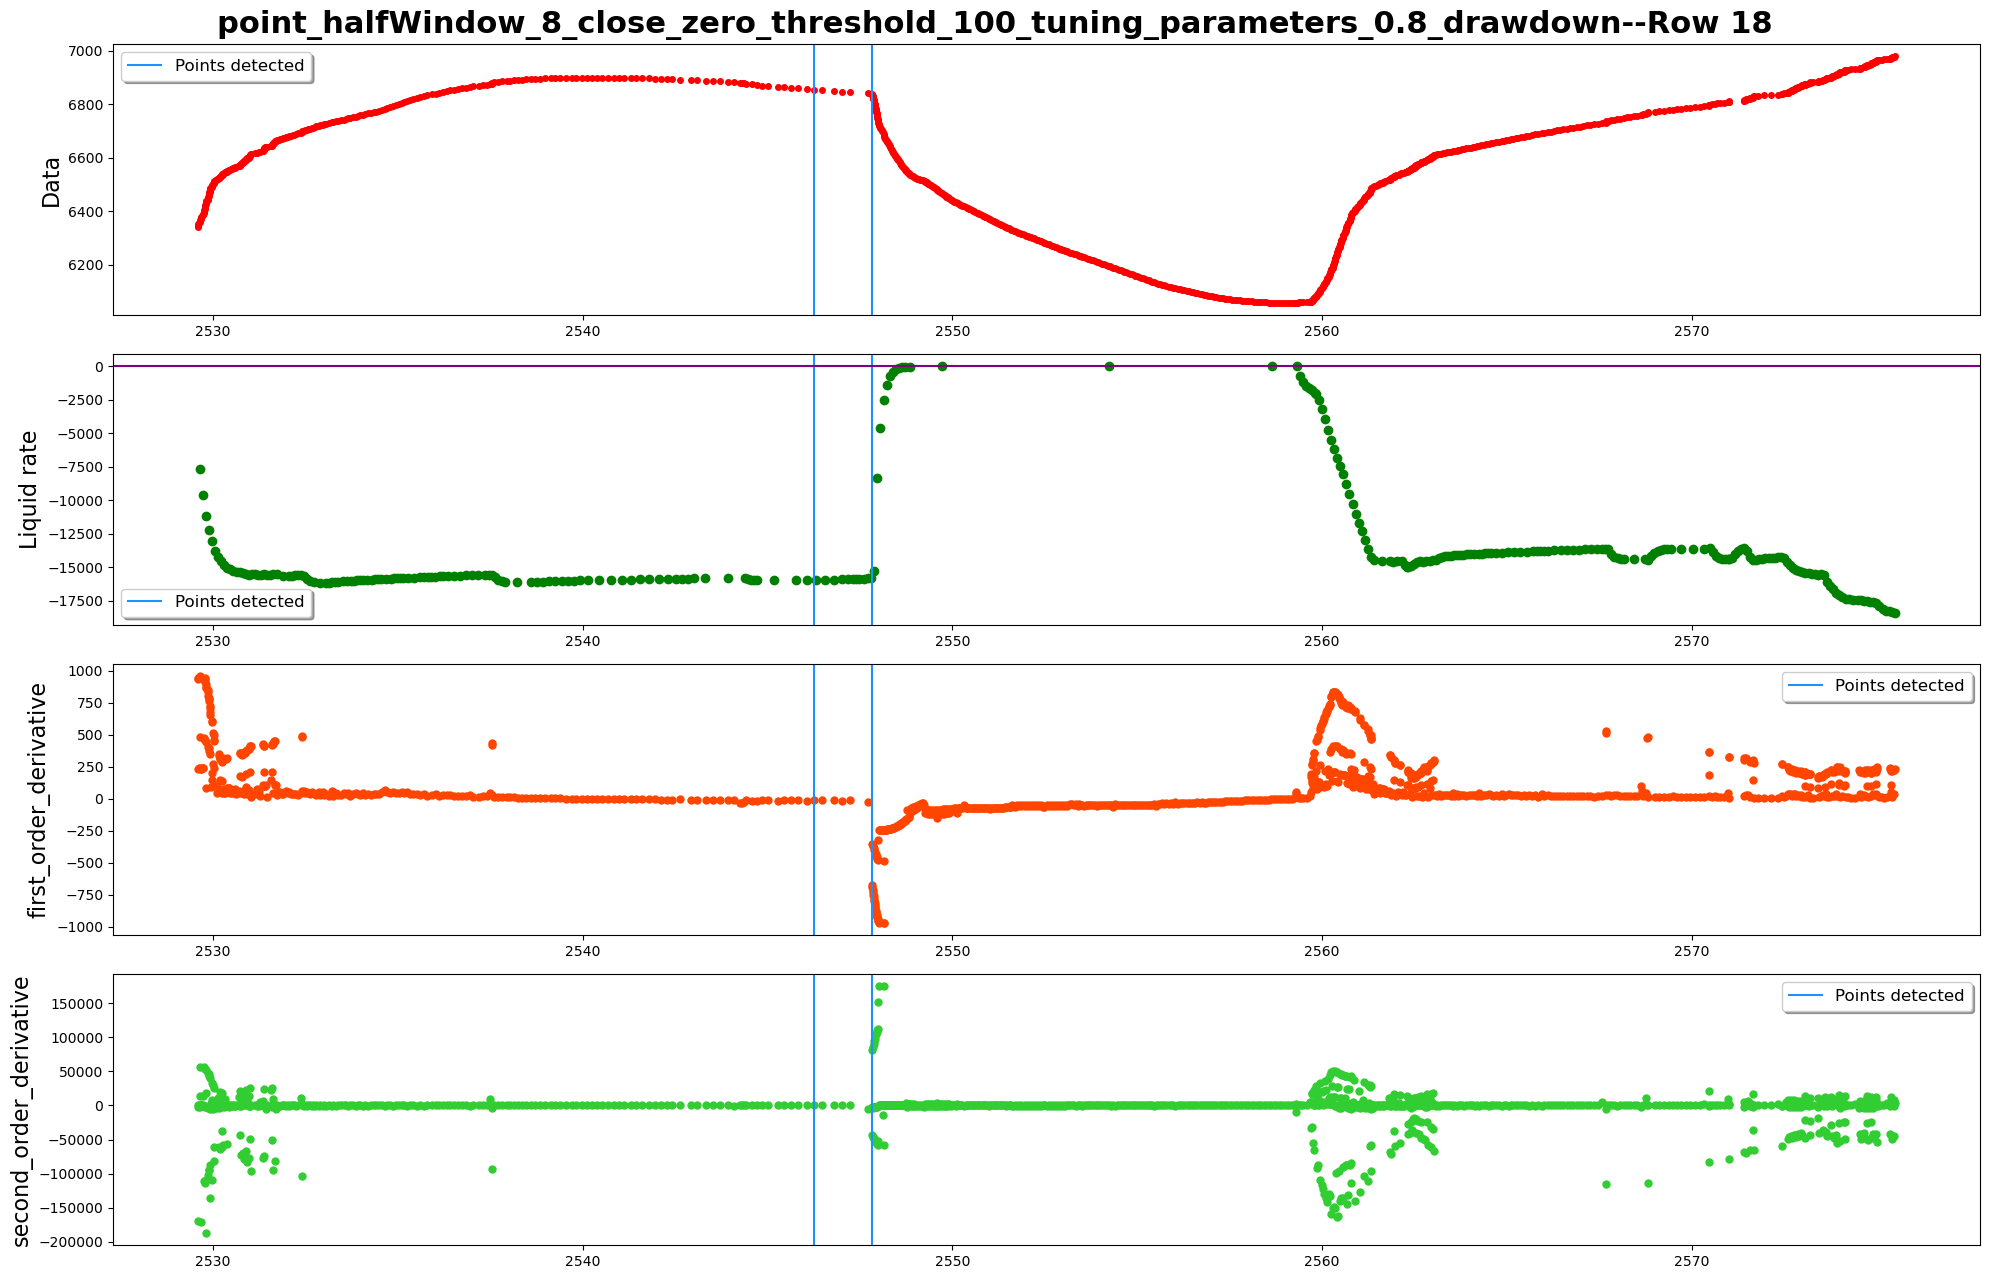

------row 19-----detected points:[21943, 21944, 21945, 21946, 21968, 21969, 21970, 21971, 21972, 21973, 22691, 22692, 22693, 22694, 22695, 22697, 22706, 22707, 22708]


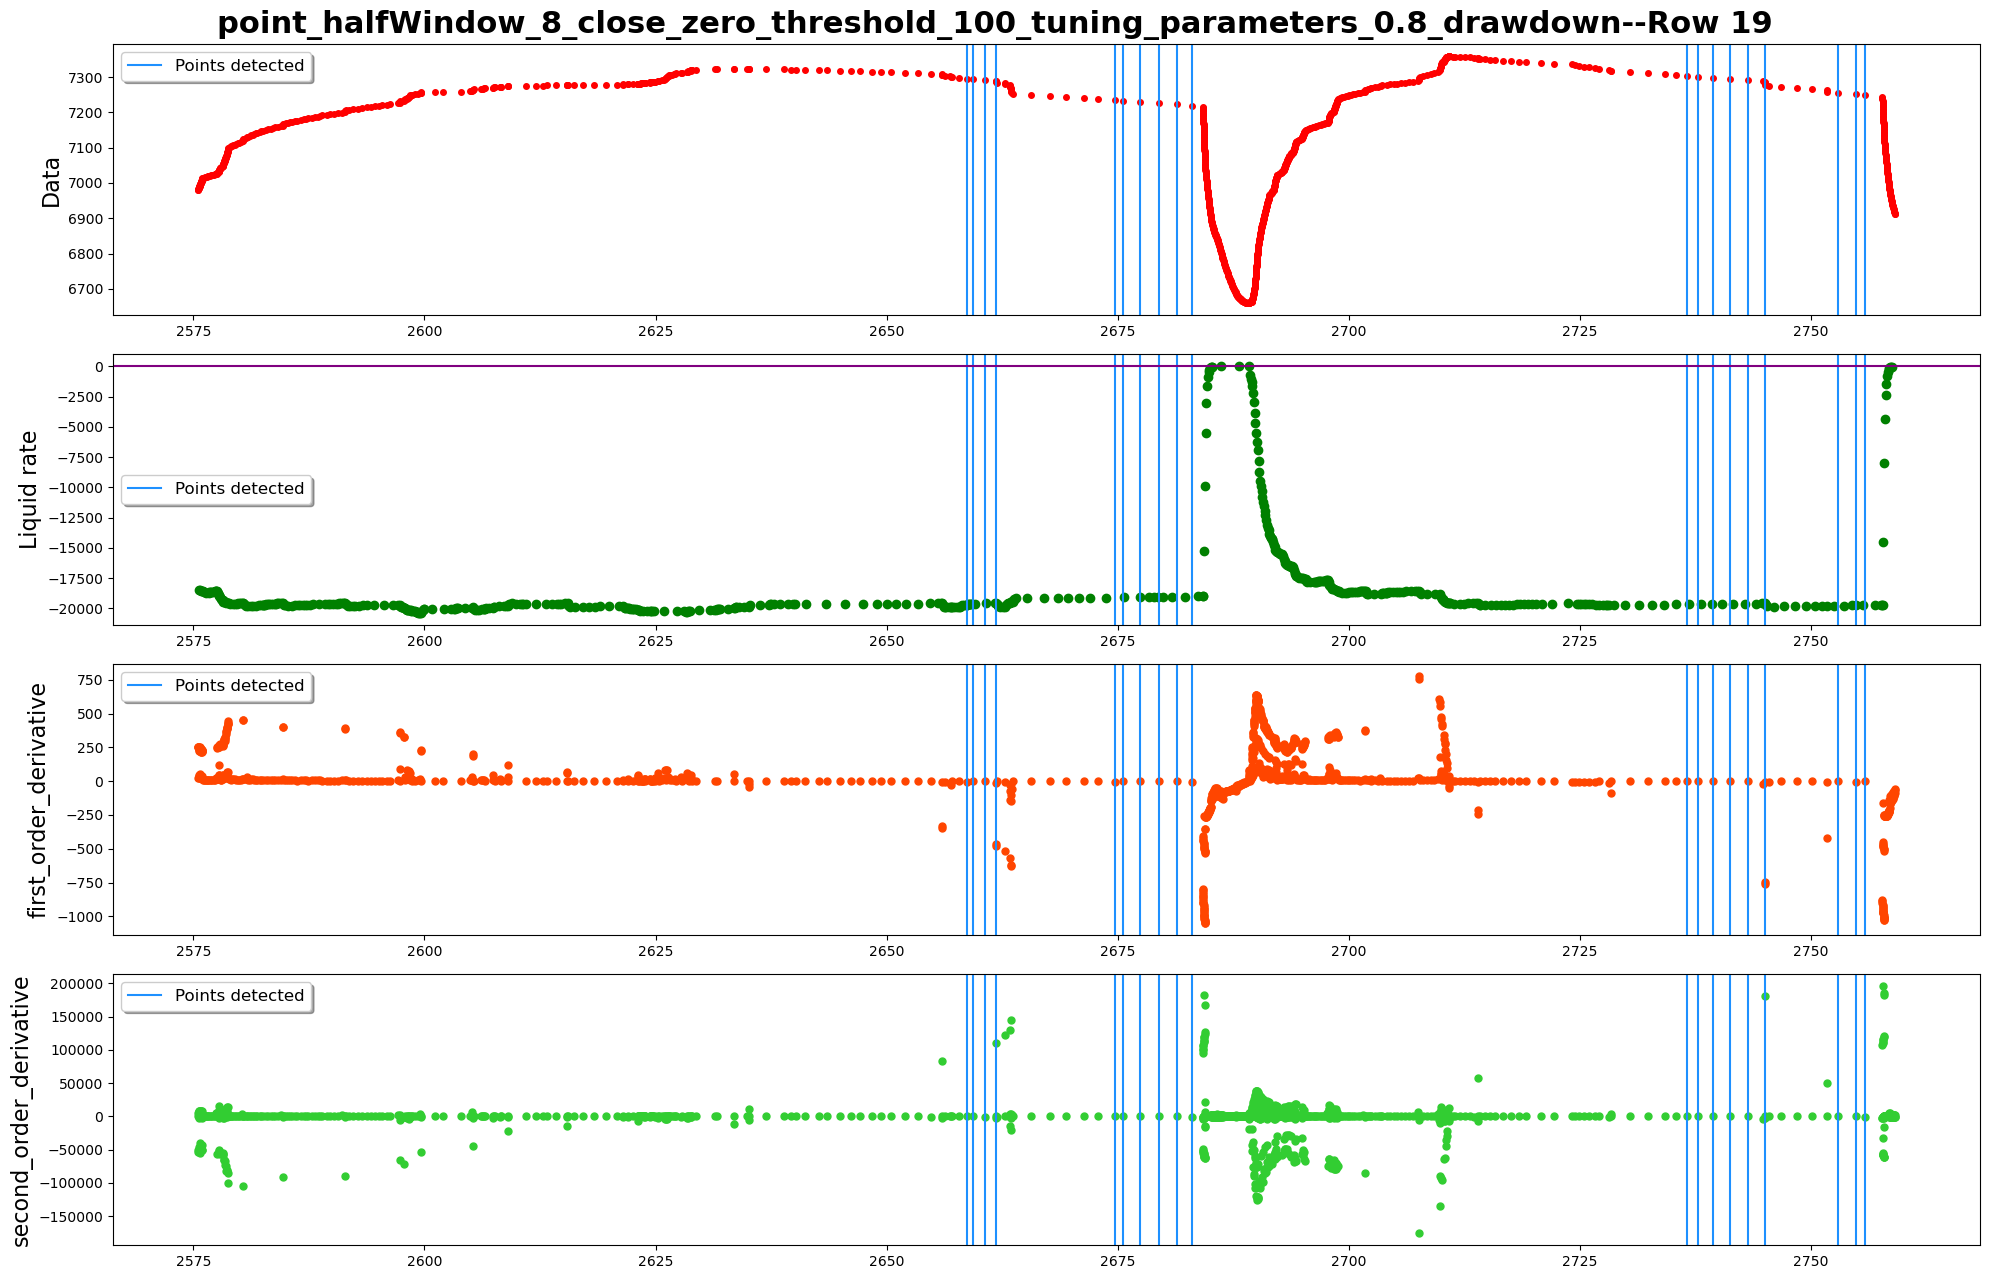

------row 20-----detected points:[]


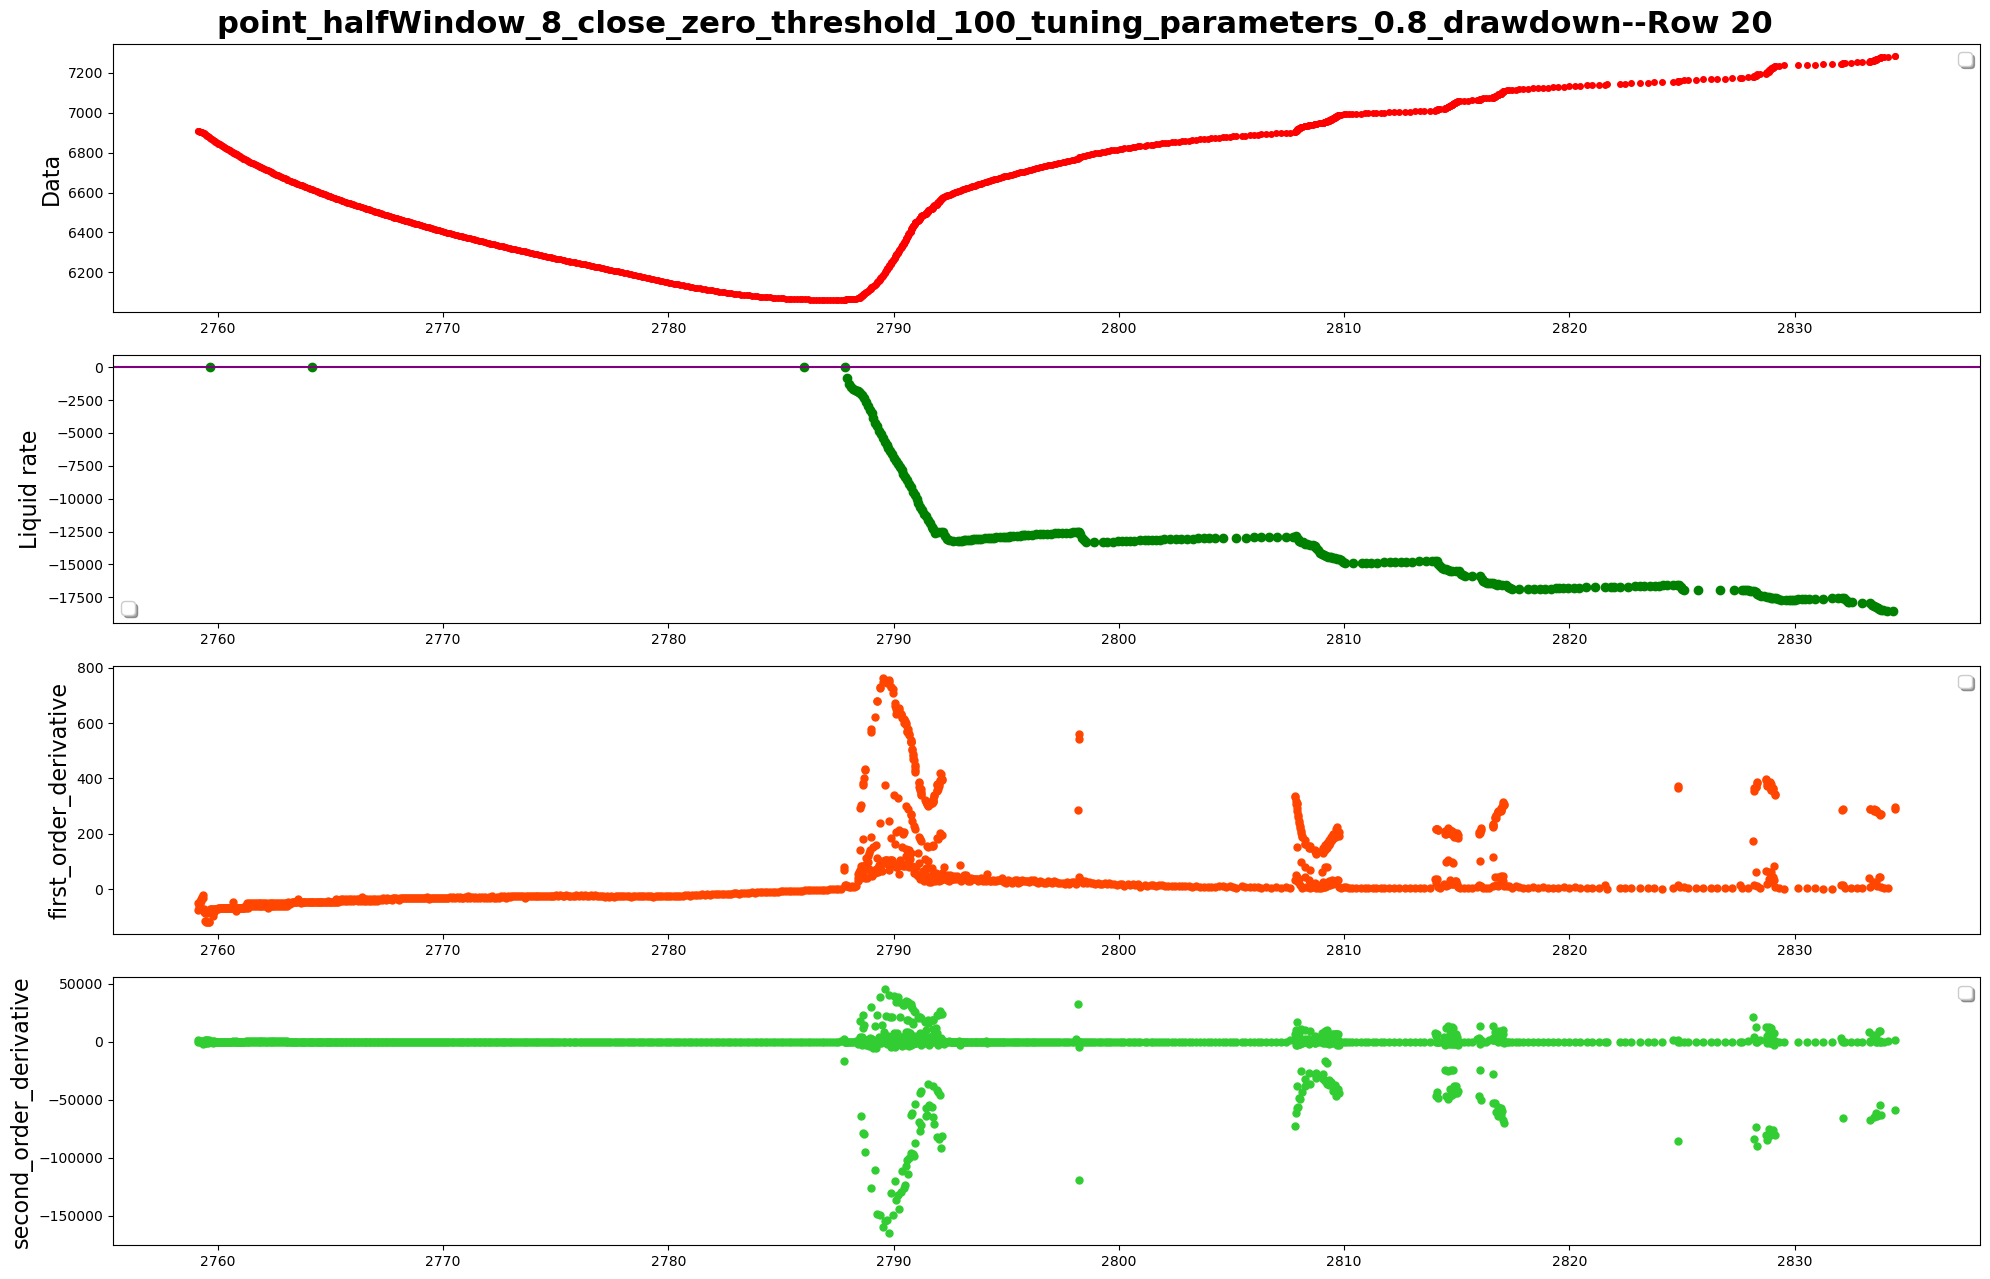

------row 21-----detected points:[24177, 24208, 24209, 24210, 24844]


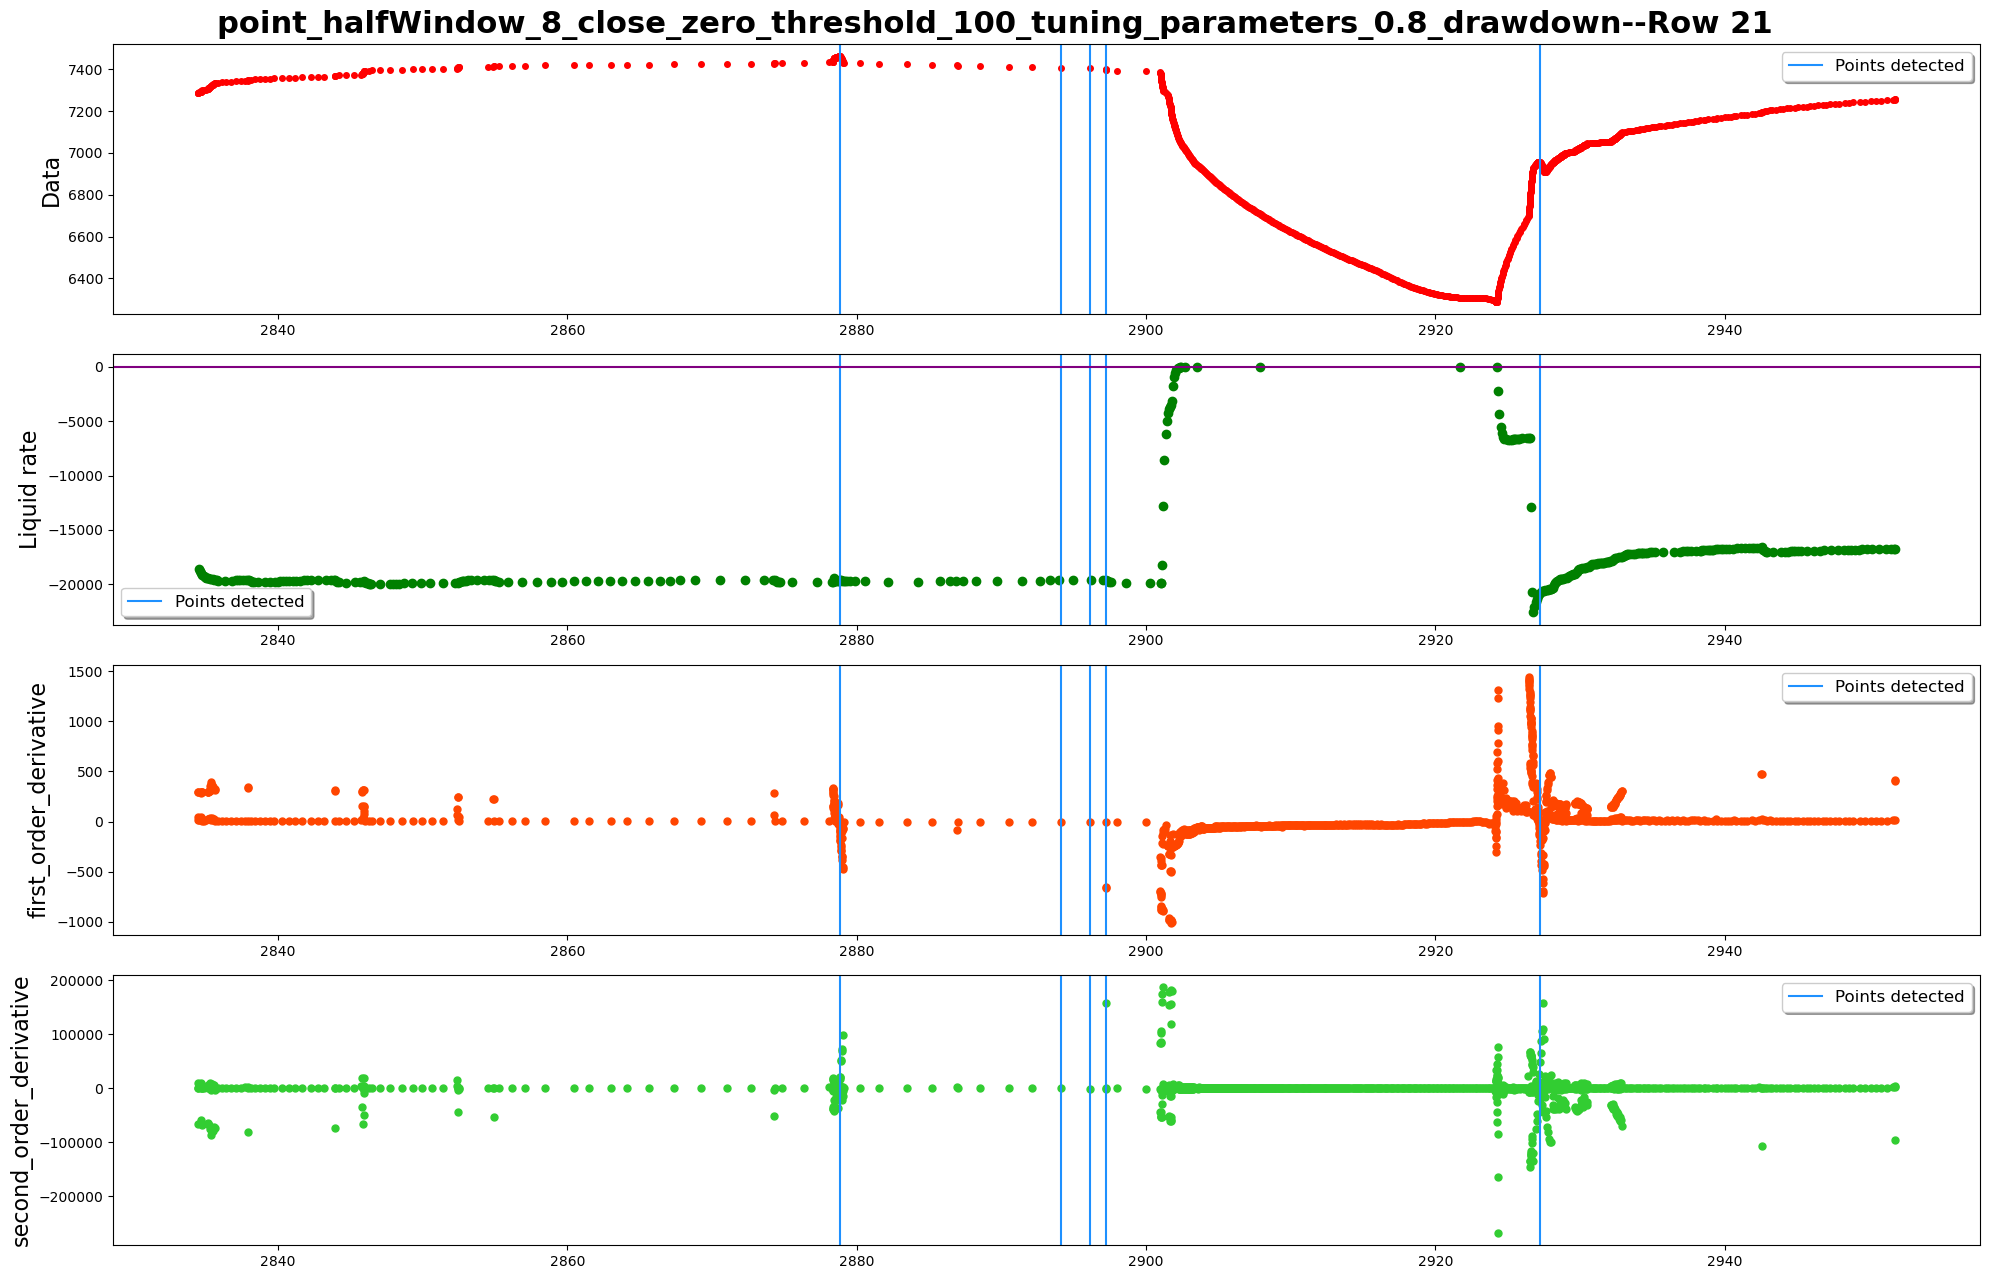

------row 22-----detected points:[25894]


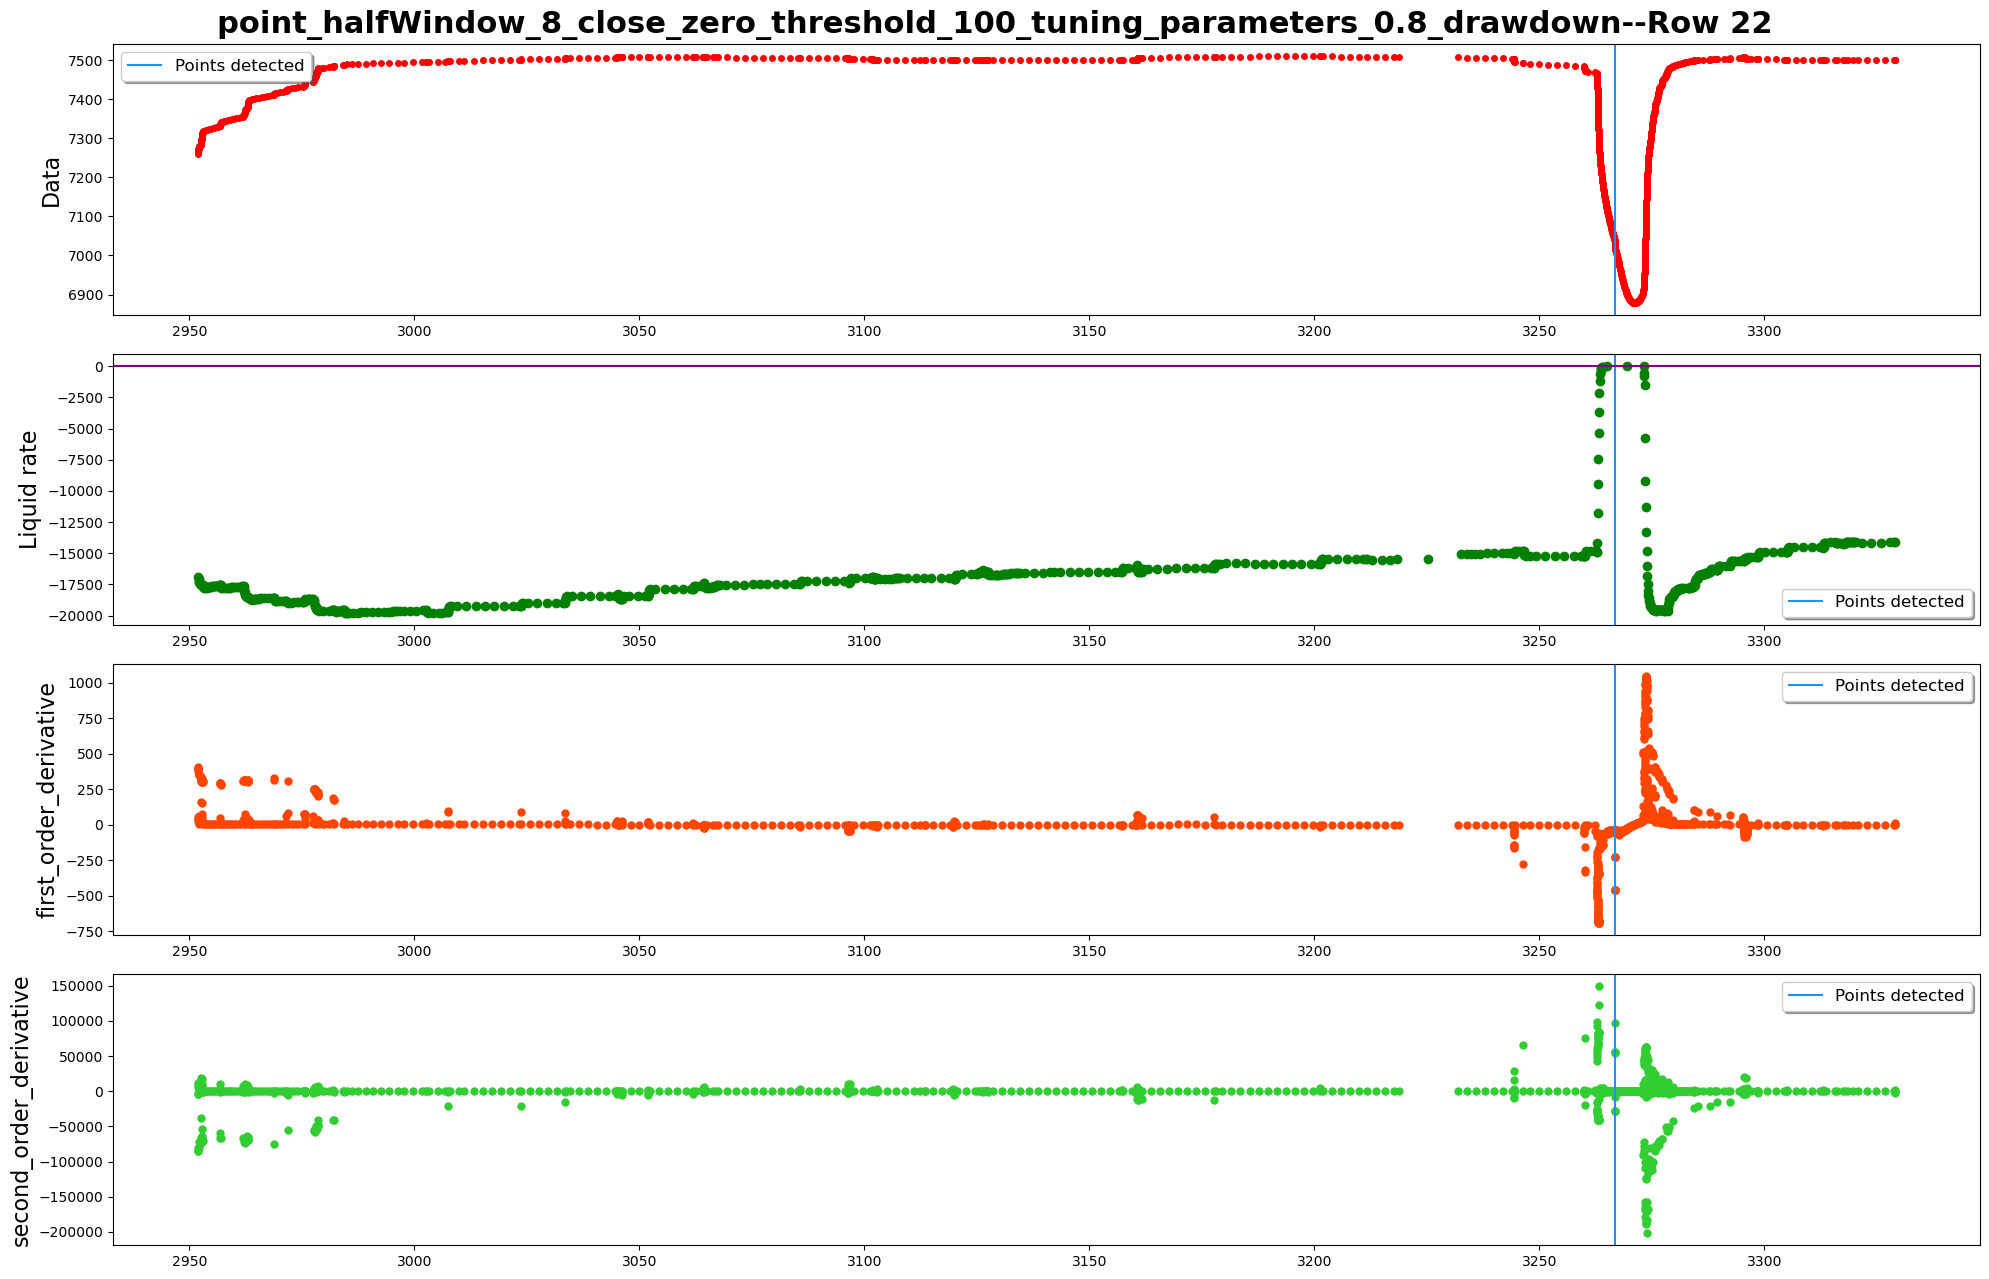

------row 23-----detected points:[26649, 26651, 26653, 26674, 26733, 27016, 27017, 27018, 27019, 27020, 27021, 27022]


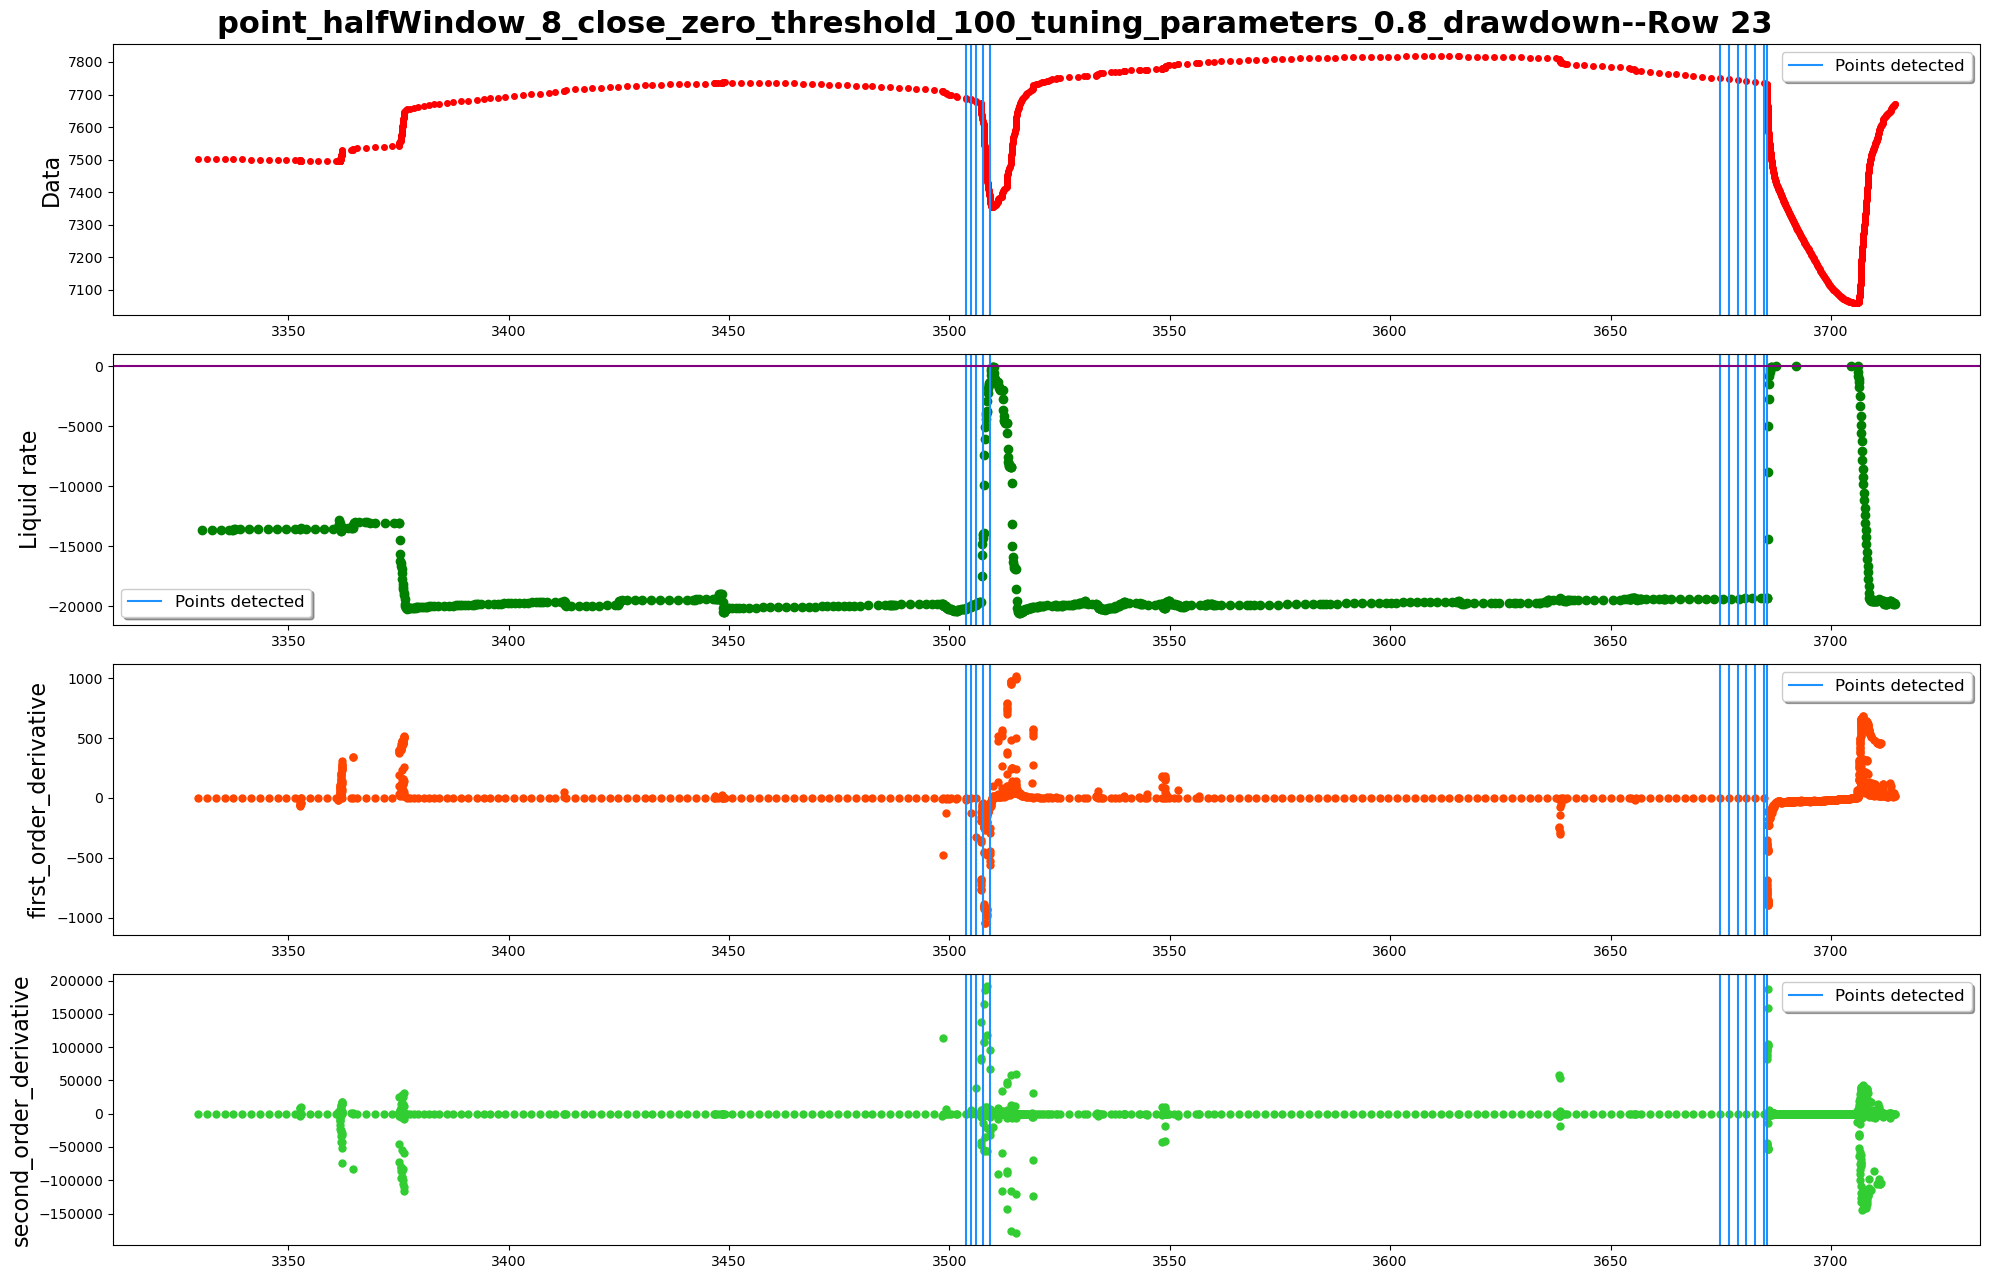

------row 24-----detected points:[27755, 27756, 27760, 28263]


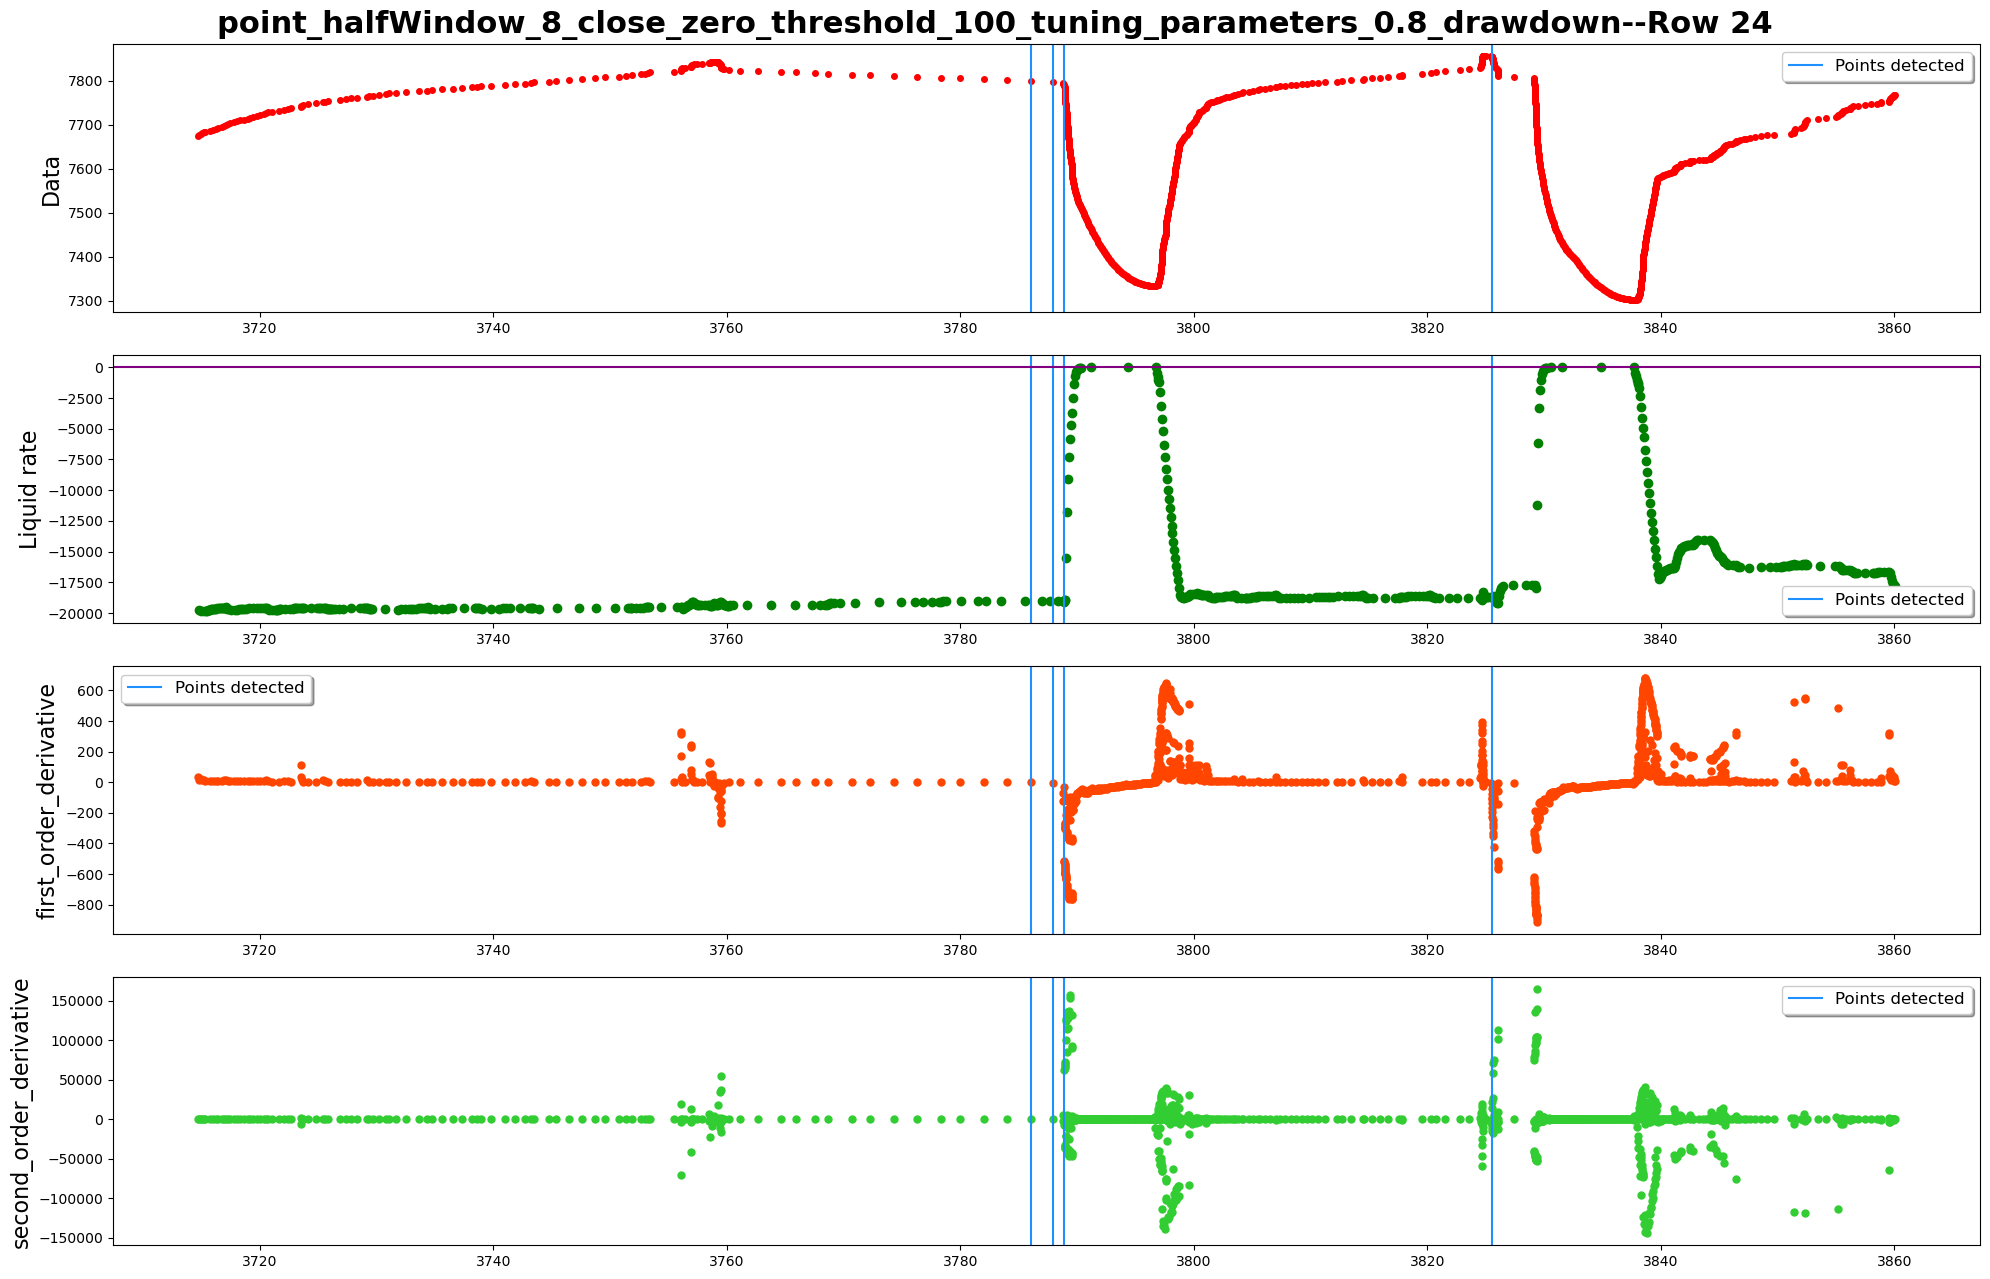

------row 25-----detected points:[28832]


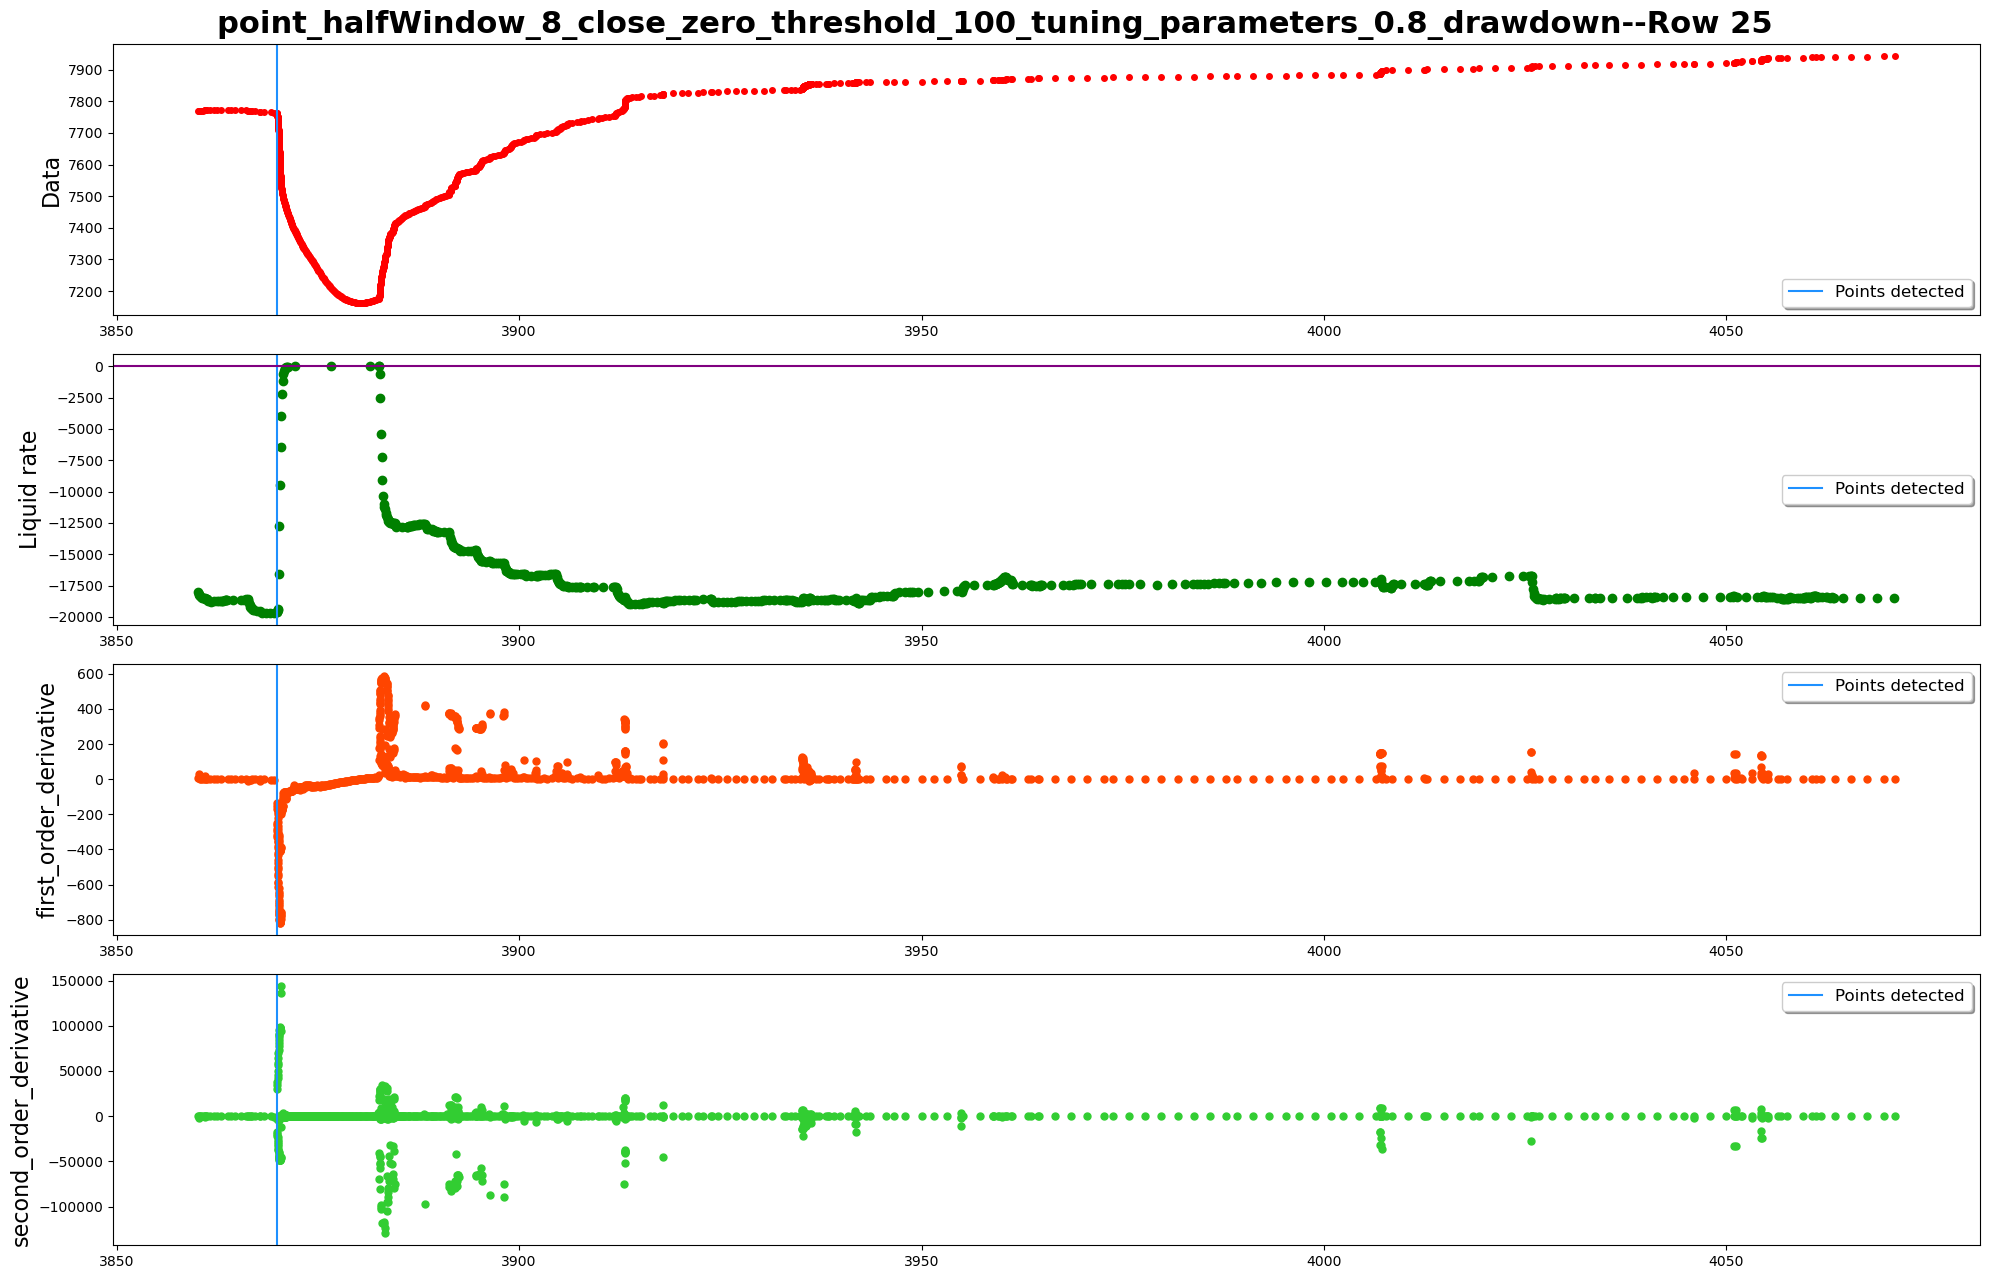

In [21]:

txt=f"buildup:{len(Max_FOD[0])}, drawdown:{len(Max_FOD[1])}"
pprint(txt)
#plot & save
plot_whole=True
plot_details=True
plot_statistics=False
points_toPlot=[Max_FOD[0],Max_FOD[1]]
names=["buildup","drawdown"]

for points,name in zip(points_toPlot,names):    
    filename_toSave_whole=f"../data_output/Derivative_method/detect_1/point_halfWindow_{point_halfWindow}_close_zero_threshold_{close_zero_threshold}_tuning_parameters_{tuning_parameters}_{name}_whole.pdf"
#     filename_toSave_whole=f"../data_output/Derivative_method/detect_2/point_halfWindow_{point_halfWindow}_deltaDerivative_tuning_{deltaDerivative_tuning}_{name}_whole.pdf"   
    os.makedirs(os.path.dirname(filename_toSave_whole), exist_ok=True)
    filename_toSave_details=f"../data_output/Derivative_method/detect_1/point_halfWindow_{point_halfWindow}_close_zero_threshold_{close_zero_threshold}_tuning_parameters_{tuning_parameters}_{name}_details.pdf"
#     filename_toSave_details=f"../data_output/Derivative_method/detect_2/point_halfWindow_{point_halfWindow}_deltaDerivative_tuning_{deltaDerivative_tuning}_{name}_details.pdf"
#     os.makedirs(os.path.dirname(filename_toSave_details), exist_ok=True)
    plot_name=f"point_halfWindow_{point_halfWindow}_close_zero_threshold_{close_zero_threshold}_tuning_parameters_{tuning_parameters}_{name}"
#     plot_name=f"point_halfWindow_{point_halfWindow}_deltaDerivative_tuning_{deltaDerivative_tuning}_{name}"
    PlotNSave(pressure_df,
      rate_df,
      points,
      [],
      data_inOneRow,
      plot_name,
              txt,
      filename_toSave_whole,
      filename_toSave_details,
      plot_statistics,
      plot_whole,
      plot_details,
      colum_names)